In [92]:
import yt
import unyt
# import yt_idv
import caesar
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# from matplotlib.patches import Rectangle

import sklearn
import pprint

import copy

In [2]:
def euclidean_distance(a, b):
    assert np.shape(a) == np.shape(b), f'Shapes of a and b are different'
    return(np.sqrt(np.sum((a-b)**2, axis=np.ndim(a)-1, keepdims=True)))

# Redshift 0 snapshot

## Load particle information from redshift 0 snapshot with yt

In [3]:
res_level = '0'
halo_id = '3224'
snap_num0 = '151'

In [4]:
snap_file0 = f'/home/b/babul/wcui/data/HYENAS/Level{res_level}/halo_{halo_id}/snap_halo_{halo_id}_{snap_num0}.hdf5'
snap0 = yt.load(snap_file0)

yt : [INFO     ] 2025-05-22 22:07:36,412 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:07:36,425 Calculating time from 1.000e+00 to be 4.375e+17 seconds
yt : [INFO     ] 2025-05-22 22:07:36,427 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:07:36,525 Parameters: current_time              = 4.3748565942961094e+17 s
yt : [INFO     ] 2025-05-22 22:07:36,526 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:07:36,526 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:07:36,527 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:07:36,527 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:07:36,528 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2025-05-22 22:07:36,528 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:07:36,529 

## Information for redshift 0 snapshot

In [5]:
age0 = snap0.current_time.in_units('Gyr')

In [6]:
age0

unyt_quantity(13.86308399, 'Gyr')

In [7]:
redshift0 = snap0.current_redshift

In [8]:
redshift0

np.float64(4.440892098500626e-16)

In [9]:
snap0.field_list

yt : [INFO     ] 2025-05-22 22:07:36,599 Allocating for 7.504e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2779.89it/s]


[('PartType0', 'AccKey'),
 ('PartType0', 'Coordinates'),
 ('PartType0', 'DelayTime'),
 ('PartType0', 'Density'),
 ('PartType0', 'Dust_Masses'),
 ('PartType0', 'Dust_Metallicity'),
 ('PartType0', 'ElectronAbundance'),
 ('PartType0', 'FractionH2'),
 ('PartType0', 'GrackleHI'),
 ('PartType0', 'GrackleHII'),
 ('PartType0', 'GrackleHM'),
 ('PartType0', 'GrackleHeI'),
 ('PartType0', 'GrackleHeII'),
 ('PartType0', 'GrackleHeIII'),
 ('PartType0', 'HaloID'),
 ('PartType0', 'ID_Generations'),
 ('PartType0', 'InternalEnergy'),
 ('PartType0', 'Masses'),
 ('PartType0', 'Metallicity_00'),
 ('PartType0', 'Metallicity_01'),
 ('PartType0', 'Metallicity_02'),
 ('PartType0', 'Metallicity_03'),
 ('PartType0', 'Metallicity_04'),
 ('PartType0', 'Metallicity_05'),
 ('PartType0', 'Metallicity_06'),
 ('PartType0', 'Metallicity_07'),
 ('PartType0', 'Metallicity_08'),
 ('PartType0', 'Metallicity_09'),
 ('PartType0', 'Metallicity_10'),
 ('PartType0', 'NWindLaunches'),
 ('PartType0', 'NeutralHydrogenAbundance'),
 

In [10]:
snap0.derived_field_list

[('PartType0', 'AccKey'),
 ('PartType0', 'C_metallicity'),
 ('PartType0', 'C_nuclei_density'),
 ('PartType0', 'C_nuclei_mass_density'),
 ('PartType0', 'Ca_metallicity'),
 ('PartType0', 'Ca_nuclei_density'),
 ('PartType0', 'Ca_nuclei_mass_density'),
 ('PartType0', 'Coordinates'),
 ('PartType0', 'DelayTime'),
 ('PartType0', 'Density'),
 ('PartType0', 'Dust_Masses'),
 ('PartType0', 'Dust_Metallicity'),
 ('PartType0', 'El_number_density'),
 ('PartType0', 'ElectronAbundance'),
 ('PartType0', 'Fe_metallicity'),
 ('PartType0', 'Fe_nuclei_density'),
 ('PartType0', 'Fe_nuclei_mass_density'),
 ('PartType0', 'FractionH2'),
 ('PartType0', 'GrackleHI'),
 ('PartType0', 'GrackleHII'),
 ('PartType0', 'GrackleHM'),
 ('PartType0', 'GrackleHeI'),
 ('PartType0', 'GrackleHeII'),
 ('PartType0', 'GrackleHeIII'),
 ('PartType0', 'H_nuclei_density'),
 ('PartType0', 'H_p0_density'),
 ('PartType0', 'H_p0_fraction'),
 ('PartType0', 'H_p0_mass'),
 ('PartType0', 'H_p0_number_density'),
 ('PartType0', 'H_p1_density')

In [11]:
snap0.domain_width.in_units('Mpc/h')

unyt_array([200., 200., 200.], 'Mpc/h')

In [12]:
snap0.particle_types

('PartType5',
 'PartType4',
 'PartType0',
 'PartType1',
 'PartType2',
 'all',
 'nbody')

In [13]:
snap0.particle_types_raw

('PartType5', 'PartType4', 'PartType0', 'PartType1', 'PartType2')

In [14]:
snap0.particle_type_counts

{'PartType0': np.int64(2243885),
 'PartType1': np.int64(2515456),
 'PartType2': np.int64(2581553),
 'PartType3': np.int64(0),
 'PartType4': np.int64(162809),
 'PartType5': np.int64(617)}

## Load caesar file of redshift 0 snapshot

In [15]:
caesar_file0 = f'/home/b/babul/wcui/data/HYENAS/Level{res_level}/halo_{halo_id}/Groups/Caesar_halo_{halo_id}_{snap_num0}.hdf5'
obj0 = caesar.load(caesar_file0)

yt : [INFO     ] 2025-05-22 22:07:37,829 Opening /home/b/babul/wcui/data/HYENAS/Level0/halo_3224/Groups/Caesar_halo_3224_151.hdf5
yt : [INFO     ] 2025-05-22 22:07:37,876 Found 1021 halos
yt : [INFO     ] 2025-05-22 22:07:37,882 Found 320 galaxies


## Find desired halo in redshift 0 snapshot

In [16]:
target_m500c = unyt.unyt_array(1e13, 'Msun')

In [17]:
target_m500c

unyt_array(1.e+13, 'Msun')

In [18]:
halo_minpotpos_z0 = unyt.unyt_array([halo.minpotpos.in_units('Mpc') for halo in obj0.halos])

In [19]:
halo_minpotpos_z0

unyt_array([[154.33456, 135.00674, 154.0364 ],
       [154.53651, 132.6801 , 156.80519],
       [154.82016, 147.4462 , 130.82118],
       ...,
       [153.29225, 145.83345, 134.18953],
       [156.49173, 146.28214, 132.89516],
       [144.64726, 147.07602, 150.83015]], shape=(1021, 3), dtype=float32, units='Mpc')

In [20]:
len(halo_minpotpos_z0)

1021

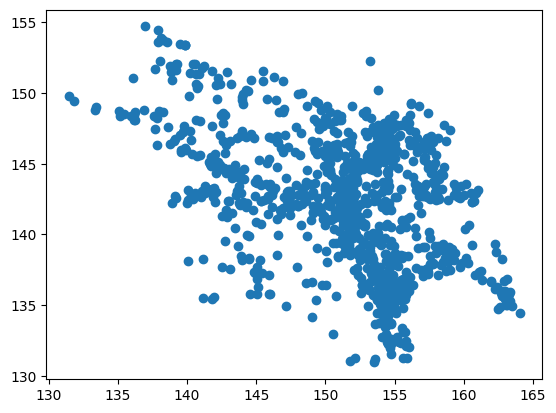

In [21]:
plt.scatter(halo_minpotpos_z0[:,0], halo_minpotpos_z0[:,1])

In [22]:
halo_m500c_z0 = unyt.unyt_array([halo.virial_quantities['m500c'] for halo in obj0.halos])

In [23]:
halo_m500c_z0

unyt_array([7.45645487e+12, 1.31975568e+13, 5.38415622e+12, ...,
       5.28957901e+09, 0.00000000e+00, 4.32845158e+09], shape=(1021,), units='Msun')

In [24]:
halo_contamination_z0 = unyt.unyt_array([halo.contamination for halo in obj0.halos])

In [25]:
halo_contamination_z0

unyt_array([0.1058417 , 0.64976125, 0.88685665, ..., 0.        , 0.        ,
       0.        ], shape=(1021,), units='(dimensionless)')

In [26]:
halo_nonzero_contamination_index_z0 = np.nonzero(np.array(halo_contamination_z0)!=0)[0]

In [27]:
halo_nonzero_contamination_index_z0

array([   0,    1,    2,    4,    5,    6,    8,    9,   10,   11,   12,
         13,   14,   15,   16,   17,   19,   21,   22,   23,   24,   25,
         26,   28,   31,   33,   36,   40,   42,   44,   47,   48,   51,
         52,   53,   56,   57,   60,   61,   63,   64,   65,   66,   67,
         68,   71,   72,   73,   76,   81,   83,   84,   85,   86,   90,
         91,   92,   93,   95,   96,   97,   98,   99,  100,  103,  106,
        112,  113,  115,  119,  121,  122,  123,  124,  132,  135,  139,
        141,  142,  146,  148,  149,  150,  154,  155,  157,  160,  163,
        164,  166,  170,  171,  172,  177,  178,  180,  182,  194,  195,
        196,  201,  202,  203,  206,  209,  210,  214,  217,  221,  225,
        227,  231,  236,  240,  241,  244,  245,  246,  254,  255,  264,
        270,  271,  274,  277,  278,  281,  285,  289,  293,  296,  297,
        299,  301,  302,  306,  312,  314,  316,  321,  331,  333,  343,
        350,  352,  357,  362,  368,  374,  375,  3

In [28]:
halo_contamination0_index_z0 = np.nonzero(np.array(halo_contamination_z0)==0)[0]
# halo_contamination0_index = np.array(halo_contamination)==0

In [29]:
halo_contamination0_index_z0

array([   3,    7,   18,   20,   27,   29,   30,   32,   34,   35,   37,
         38,   39,   41,   43,   45,   46,   49,   50,   54,   55,   58,
         59,   62,   69,   70,   74,   75,   77,   78,   79,   80,   82,
         87,   88,   89,   94,  101,  102,  104,  105,  107,  108,  109,
        110,  111,  114,  116,  117,  118,  120,  125,  126,  127,  128,
        129,  130,  131,  133,  134,  136,  137,  138,  140,  143,  144,
        145,  147,  151,  152,  153,  156,  158,  159,  161,  162,  165,
        167,  168,  169,  173,  174,  175,  176,  179,  181,  183,  184,
        185,  186,  187,  188,  189,  190,  191,  192,  193,  197,  198,
        199,  200,  204,  205,  207,  208,  211,  212,  213,  215,  216,
        218,  219,  220,  222,  223,  224,  226,  228,  229,  230,  232,
        233,  234,  235,  237,  238,  239,  242,  243,  247,  248,  249,
        250,  251,  252,  253,  256,  257,  258,  259,  260,  261,  262,
        263,  265,  266,  267,  268,  269,  272,  2

In [30]:
value_of_contamination0_z0 = min(np.log10(halo_contamination_z0)[np.array(halo_contamination_z0)>0])-1

/project/b/babul/aspadawe/pyenvs/visualize_with_yt_ondemand/lib/python3.13/site-packages/unyt/array.py:1832: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


/tmp/ipykernel_2157247/2924375891.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(np.array(halo_m500c_z0)[halo_contamination0_index_z0]),


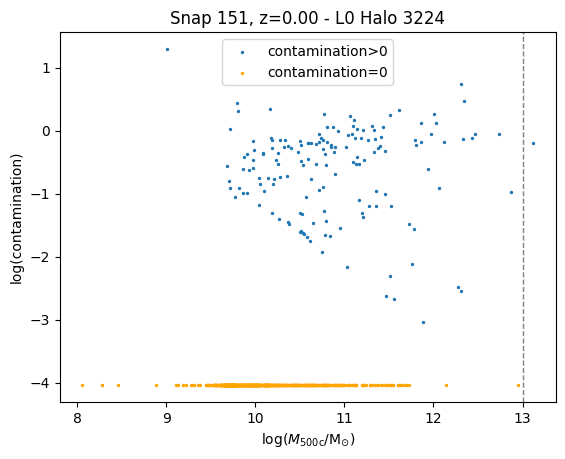

In [31]:
plt.scatter(np.log10(halo_m500c_z0), np.log10(halo_contamination_z0), s=2, label='contamination>0')
plt.scatter(np.log10(np.array(halo_m500c_z0)[halo_contamination0_index_z0]),
            np.full(len(halo_contamination0_index_z0), value_of_contamination0_z0),
            s=2, color='orange', label='contamination=0')
plt.axvline(np.log10(target_m500c), ls='--', lw=1, color='grey')
plt.title(f'Snap {snap_num0}, z={redshift0:.2f} - L{res_level} Halo {halo_id}')
plt.xlabel(r'$\log(M_{500\mathrm{c}}/\mathrm{M_{\odot}})$')
plt.ylabel('log(contamination)')
plt.legend()

In [32]:
print(f'Number of contaminated halos: {len(halo_nonzero_contamination_index_z0)}')

Number of contaminated halos: 267


In [33]:
print(f'Number of uncontaminated halos: {len(halo_contamination0_index_z0)}')

Number of uncontaminated halos: 754


In [34]:
unyt.unyt_array(halo_m500c_z0)

unyt_array([7.45645487e+12, 1.31975568e+13, 5.38415622e+12, ...,
       5.28957901e+09, 0.00000000e+00, 4.32845158e+09], shape=(1021,), units='Msun')

In [35]:
## Using only halos with 0 contamination, choose halo with mass closest to target mass
halo_m500c_contamination0_z0 = unyt.unyt_array(halo_m500c_z0)[halo_contamination0_index_z0]
# index_of_halo_with_contamination0_and_target_m500c = 
specific_halo_index_z0 = halo_contamination0_index_z0[np.argmin(np.abs(halo_m500c_contamination0_z0 - target_m500c))]

In [36]:
specific_halo_index_z0

np.int64(3)

In [38]:
specific_halo_z0 = obj0.halos[specific_halo_index_z0]

## Get central galaxy of target halo

In [39]:
specific_central_z0 = specific_halo_z0.central_galaxy

In [40]:
specific_central_index_z0 = specific_central_z0.GroupID

In [41]:
specific_central_index_z0

np.int64(0)

## Get halo properties of target halo at redshift 0

In [42]:
specific_halo_minpotpos_z0 = obj0.halos[specific_halo_index_z0].minpotpos.in_units('Mpc')

In [43]:
specific_halo_minpotpos_z0

unyt_array([151.6479 , 141.85269, 143.66356], dtype=float32, units='Mpc')

In [44]:
obj0.halos[specific_halo_index_z0].pos.in_units('Mpc')

unyt_array([151.92265, 142.11192, 143.70213], dtype=float32, units='Mpc')

In [45]:
obj0.halos[specific_halo_index_z0].virial_quantities['m200c']

unyt_quantity(1.20046821e+13, 'Msun')

In [46]:
np.log10(obj0.halos[specific_halo_index_z0].virial_quantities['m200c'])

array(13.07935066)

In [47]:
specific_halo_m500c_z0 = obj0.halos[specific_halo_index_z0].virial_quantities['m500c']

In [48]:
specific_halo_m500c_z0

unyt_quantity(8.9820066e+12, 'Msun')

In [49]:
np.log10(specific_halo_m500c_z0)

array(12.95337337)

In [50]:
specific_halo_contamination_z0 = obj0.halos[specific_halo_index_z0].contamination

In [51]:
specific_halo_contamination_z0

np.float64(0.0)

In [52]:
specific_halo_r500c_z0 = obj0.halos[specific_halo_index_z0].virial_quantities['r500c'].in_units('Mpc')

In [53]:
specific_halo_r500c_z0

unyt_quantity(0.322095, 'Mpc')

In [54]:
specific_halo_r200c_z0 = obj0.halos[specific_halo_index_z0].virial_quantities['r200c'].in_units('Mpc')

In [55]:
specific_halo_r200c_z0

unyt_quantity(0.48152631, 'Mpc')

/tmp/ipykernel_2157247/1779934424.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(np.array(halo_m500c_z0)[halo_contamination0_index_z0]),


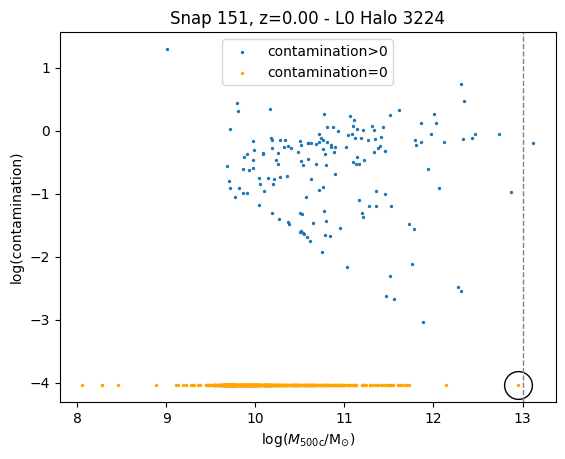

In [56]:
plt.scatter(np.log10(halo_m500c_z0), np.log10(halo_contamination_z0), s=2, label='contamination>0')
plt.scatter(np.log10(np.array(halo_m500c_z0)[halo_contamination0_index_z0]),
            np.full(len(halo_contamination0_index_z0), value_of_contamination0_z0),
            s=2, color='orange', label='contamination=0')
plt.plot(np.log10(specific_halo_m500c_z0),
         specific_halo_contamination_z0 if specific_halo_contamination_z0>0 else value_of_contamination0_z0,
         'o', ms=20, mec='black', mfc='none', mew=1)
plt.axvline(np.log10(target_m500c), ls='--', lw=1, color='grey')
plt.title(f'Snap {snap_num0}, z={redshift0:.2f} - L{res_level} Halo {halo_id}')
plt.xlabel(r'$\log(M_{500\mathrm{c}}/\mathrm{M_{\odot}})$')
plt.ylabel('log(contamination)')
plt.legend()

# All other snapshots

## Iterate through all snapshots, saving halo properties

In [57]:
snap_num_list = range(0,152)
# snap_num_list = range(149,152)

In [58]:
## Sphere for checking mass ratios of halos with target halo
sphere_radius_type = 'r500c'
sphere_radius_factor = 10

mass_ratio_type = 'm500c'
major_merger_mass_ratio = 5

In [59]:
prop_dict = {}
prop_names = ['snap_num',
              'age_halo', 'age_central', 'age_central_tracked',
              'z_halo', 'z_central', 'z_central_tracked',
              'halo_index', 'central_index', 'central_index_tracked',
              'contamination_halo',
              'minpotpos_halo', 'minpotpos_central', 'minpotpos_central_tracked',
              'num_major_mergers_halo',
              'bh_mdot_central', 'bh_fedd_central']

delta_values = ['2500', '500', '200']
for delta_value in delta_values:
    prop_names.append(f'm{delta_value}c_halo')
    prop_names.append(f'r{delta_value}c_halo')

virial_quantities = ['circular_velocity', 'spin_param', 'temperature']
for quant in virial_quantities:
    prop_names.append(f'{quant}_halo')

sfr_types = ['', '_100']
for sfr_type in sfr_types:
    prop_names.append(f'sfr{sfr_type}_halo')
    prop_names.append(f'sfr{sfr_type}_central')

halo_mass_types = ['gas', 'stellar', 'dm', 'dust', 'H2']
for halo_mass_type in halo_mass_types:
    prop_names.append(f'{halo_mass_type}_mass_halo')

central_mass_types = ['gas', 'stellar', 'dm', 'bh', 'dust', 'HI', 'H2']
central_mass_apertures = ['', '_30kpc']
for central_mass_type in central_mass_types:
    for aperture in central_mass_apertures:
        if central_mass_type in ['stellar', 'dust'] and aperture=='_30kpc': continue
        prop_names.append(f'{central_mass_type}{aperture}_mass_central')

halo_radii_types = ['gas', 'stellar', 'dm', 'baryon', 'total']
halo_radii_XX = ['half_mass', 'r20', 'r80']
for halo_radii_type in halo_radii_types:
    for XX in halo_radii_XX:
        prop_names.append(f'{halo_radii_type}_{XX}_radius_halo')

central_radii_types = ['gas', 'stellar', 'dm', 'baryon', 'total']
central_radii_XX = ['half_mass', 'r20', 'r80']
for central_radii_type in central_radii_types:
    for XX in central_radii_XX:
        prop_names.append(f'{central_radii_type}_{XX}_radius_central')

halo_metallicity_types = ['mass_weighted', 'sfr_weighted', 'stellar', 'mass_weighted_cgm', 'temp_weighted_cgm']
for halo_metal_type in halo_metallicity_types:
    prop_names.append(f'{halo_metal_type}_metallicity_halo')

central_metallicity_types = ['mass_weighted', 'sfr_weighted', 'stellar']
for central_metal_type in central_metallicity_types:
    prop_names.append(f'{central_metal_type}_metallicity_central')

halo_velocity_dispersion_types = ['gas', 'stellar', 'dm', 'baryon', 'total']
for halo_vel_disp_type in halo_velocity_dispersion_types:
    prop_names.append(f'{halo_vel_disp_type}_velocity_dispersion_halo')

central_velocity_dispersion_types = ['gas', 'stellar', 'dm', 'baryon', 'total']
for central_vel_disp_type in central_velocity_dispersion_types:
    prop_names.append(f'{central_vel_disp_type}_velocity_dispersion_central')

halo_rotation_types = ['gas', 'stellar', 'dm', 'baryon', 'total']
halo_rotation_XX = ['L', 'ALPHA', 'BETA', 'BoverT', 'kappa_rot']
for rot_type in halo_rotation_types:
    for rot_XX in halo_rotation_XX:
        prop_names.append(f'{rot_type}_{rot_XX}_rotation_halo')

central_rotation_types = ['gas', 'stellar', 'dm', 'baryon', 'total']
central_rotation_XX = ['L', 'ALPHA', 'BETA', 'BoverT', 'kappa_rot']
for rot_type in central_rotation_types:
    for rot_XX in central_rotation_XX:
        prop_names.append(f'{rot_type}_{rot_XX}_rotation_central')

halo_age_types = ['mass_weighted', 'metal_weighted']
for age_type in halo_age_types:
    prop_names.append(f'{age_type}_stellar_age_halo')

central_age_types = ['mass_weighted', 'metal_weighted']
for age_type in central_age_types:
    prop_names.append(f'{age_type}_stellar_age_central')

halo_temperature_types = ['mass_weighted', 'mass_weighted_cgm']#, 'temp_weighted_cgm']
for temp_type in halo_temperature_types:
    prop_names.append(f'{temp_type}_temperature_halo')

central_temperature_types = ['mass_weighted', 'mass_weighted_cgm']#, 'temp_weighted_cgm']
for temp_type in central_temperature_types:
    prop_names.append(f'{temp_type}_temperature_central')

halo_local_density_types = ['300', '1000', '3000']
for dens_type in halo_local_density_types:
    prop_names.append(f'local_mass_density_{dens_type}kpccm_halo')
    prop_names.append(f'local_number_density_{dens_type}kpccm_halo')

# prop_printable_names = ['contamination', ]
for prop_name in prop_names:
    prop_dict[prop_name] = []

In [60]:
for snap_num in snap_num_list:
    print(f'Snapshot {snap_num}')

    ## Load particle information in snapshot with yt
    # snap_file = f'/scratch/b/babul/aspadawe/snapshots/Hyenasc_L{res_level}_zooms/halo_{halo_id}/snap_halo_{halo_id}_{snap_num}.hdf5'
    # snap_file = '/scratch/b/babul/aspadawe/snapshots/HyenasC/L0/halo_3224_v3/snapshot_085.hdf5'
    # snap_file = '/scratch/b/babul/fjenning/xray_bubbles/PAPER_2_SIMBA_C_RECAL/Chyenas_dmsplit_Level1_zoom_252/snaps/Chyenas_snapshot_736.hdf5'
    snap_file = f'/home/b/babul/wcui/data/HYENAS/Level{res_level}/halo_{halo_id}/snap_halo_{halo_id}_{snap_num:03}.hdf5'
    try:
        snap = yt.load(snap_file)
    except Exception as e:
        print(e)
        print('No snapshot\n')
        continue

    ## Load caesar file
    # caesar_file = f'/scratch/b/babul/aspadawe/snapshots/Hyenasc_L{res_level}_zooms/halo_{halo_id}/Groups/Caesar_halo_{halo_id}_{snap_num}.hdf5'
    caesar_file = f'/home/b/babul/wcui/data/HYENAS/Level{res_level}/halo_{halo_id}/Groups/Caesar_halo_{halo_id}_{snap_num:03}.hdf5'
    # caesar_file = f'/home/b/babul/aspadawe/scripts/caesar_files/test.hdf5'
    try:
        obj = caesar.load(caesar_file)
    except Exception as e:
        print(e)
        print()
        continue

    ## Link halos in snapshots with caesar progen
    caesar.progen.check_if_progen_is_present(caesar_file, 'progen_halo_dm')
    progens = caesar.progen.progen_finder(obj_current=obj0, obj_target=obj, caesar_file=caesar_file,
                                          snap_dir=f'/home/b/babul/wcui/data/HYENAS/Level{res_level}/halo_{halo_id}',
                                          data_type='halo', part_type='dm', recompute=True,
                                          save=False, n_most=1, min_in_common=0.1, nproc=1,
                                          match_frac=True, reverse_match=False)

    specific_halo_index = progens[0][specific_halo_index_z0][0]
    specific_halo = obj.halos[specific_halo_index]
    specific_central = specific_halo.central_galaxy
    print(f'Target halo index: {specific_halo_index}')
    print(f'Target halo central galaxy: {specific_central}')
    if specific_central is not None:
        specific_central_index = specific_central.GroupID
        print(f'Target halo central galaxy index: {specific_central_index}')
    # print()

    ## Link galaxies in snapshots with caesar progen
    caesar.progen.check_if_progen_is_present(caesar_file, 'progen_galaxy_star')
    try:
        gal_progens = caesar.progen.progen_finder(obj_current=obj0, obj_target=obj, caesar_file=caesar_file,
                                                  snap_dir=f'/home/b/babul/wcui/data/HYENAS/Level{res_level}/halo_{halo_id}',
                                                  data_type='galaxy', part_type='star', recompute=True,
                                                  save=False, n_most=1, min_in_common=0.1, nproc=1,
                                                  match_frac=True, reverse_match=False)
    
        specific_central_index_tracked = gal_progens[0][specific_central_index_z0][0]
        specific_central_tracked = obj.galaxies[specific_central_index_tracked]
    except:
        specific_central_index_tracked = -1
        specific_central_tracked = None
    print(f'Target halo tracked central galaxy index: {specific_central_index_tracked}')
    print(f'Target halo tracked central galaxy: {specific_central_tracked}')

    
    ## Information for snapshot
    prop_dict['snap_num'].append(snap_num)
    prop_dict['age_halo'].append(snap.current_time.in_units('Gyr'))
    prop_dict['z_halo'].append(snap.current_redshift)

    ## Get properties of target halo
    prop_dict['halo_index'].append(specific_halo_index)
    prop_dict['contamination_halo'].append(specific_halo.contamination)
    prop_dict['minpotpos_halo'].append(specific_halo.minpotpos.in_units('Mpccm'))

    for delta_value in delta_values:
        prop_dict[f'm{delta_value}c_halo'].append(specific_halo.virial_quantities[f'm{delta_value}c'])
        prop_dict[f'r{delta_value}c_halo'].append(specific_halo.virial_quantities[f'r{delta_value}c'].in_units('kpccm'))
    # m500c = obj.halos[specific_halo_index].virial_quantities['m500c']
    # m200c = obj.halos[specific_halo_index].virial_quantities['m200c']
    # r500c = obj.halos[specific_halo_index].virial_quantities['r500c'].in_units('Mpc')
    # r200c = obj.halos[specific_halo_index].virial_quantities['r200c'].in_units('Mpc')

    for quant in virial_quantities:
        prop_dict[f'{quant}_halo'].append(specific_halo.virial_quantities[quant])
    
    prop_dict['sfr_halo'].append(specific_halo.sfr)
    prop_dict['sfr_100_halo'].append(specific_halo.sfr_100)

    for mass_type in halo_mass_types:
        prop_dict[f'{mass_type}_mass_halo'].append(specific_halo.masses[mass_type])
    # gas_mass_halo = obj.halos[specific_halo_index].masses['gas']
    # stellar_mass_halo = obj.halos[specific_halo_index].masses['stellar']
    # dm_mass_halo = obj.halos[specific_halo_index].masses['dm']
    # dust_mass_halo = obj.halos[specific_halo_index].masses['dust']
    # # bh_mass_halo = obj.halos[specific_halo_index].masses['bh']
    # # HI_mass_halo = obj.halos[specific_halo_index].masses['HI']
    # H2_mass_halo = obj.halos[specific_halo_index].masses['H2']

    # gas_mass_30kpccm_halo = obj.halos[specific_halo_index].masses['gas_30kpc']
    # stellar_mass_30kpccm_halo = obj.halos[specific_halo_index].masses['stellar_30kpc']
    # dm_mass_30kpccm_halo = obj.halos[specific_halo_index].masses['dm_30kpc']
    # dust_mass_30kpccm_halo = obj.halos[specific_halo_index].masses['dust_30kpc']
    # bh_mass_30kpccm_halo = obj.halos[specific_halo_index].masses['bh_30kpc']
    # HI_mass_30kpccm_halo = obj.halos[specific_halo_index].masses['HI_30kpc']
    # H2_mass_30kpccm_halo = obj.halos[specific_halo_index].masses['H2_30kpc']
    
    for radii_type in halo_radii_types:
        for XX in halo_radii_XX:
            prop_dict[f'{radii_type}_{XX}_radius_halo'].append(specific_halo.radii[f'{radii_type}_{XX}'])
    # gas_half_mass_radius_halo = obj.halos[specific_halo_index].radii['gas']

    for metal_type in halo_metallicity_types:
        prop_dict[f'{metal_type}_metallicity_halo'].append(specific_halo.metallicities[metal_type])

    for vel_disp_type in halo_velocity_dispersion_types:
        prop_dict[f'{vel_disp_type}_velocity_dispersion_halo'].append(specific_halo.velocity_dispersions[vel_disp_type])

    for rot_type in halo_rotation_types:
        for rot_XX in halo_rotation_XX:
            prop_dict[f'{rot_type}_{rot_XX}_rotation_halo'].append(specific_halo.rotation[f'{rot_type}_{rot_XX}'])

    for age_type in halo_age_types:
        prop_dict[f'{age_type}_stellar_age_halo'].append(specific_halo.ages[age_type])

    for temp_type in halo_temperature_types:
        prop_dict[f'{temp_type}_temperature_halo'].append(specific_halo.temperatures[temp_type])

    for dens_type in halo_local_density_types:
        prop_dict[f'local_mass_density_{dens_type}kpccm_halo'].append(specific_halo.local_mass_density[dens_type])
        prop_dict[f'local_number_density_{dens_type}kpccm_halo'].append(specific_halo.local_number_density[dens_type])

    
    ## Central galaxy properties
    if specific_central is not None:
        prop_dict['z_central'].append(snap.current_redshift)
        prop_dict['age_central'].append(snap.current_time.in_units('Gyr'))

        prop_dict['central_index'].append(specific_central_index)

        prop_dict['minpotpos_central'].append(specific_central.minpotpos.in_units('Mpccm'))
        
        prop_dict['sfr_central'].append(specific_central.sfr)
        prop_dict['sfr_100_central'].append(specific_central.sfr_100)
        
        prop_dict['bh_mdot_central'].append(specific_central.bhmdot)
        prop_dict['bh_fedd_central'].append(specific_central.bh_fedd)

        for mass_type in central_mass_types:
            for aperture in central_mass_apertures:
                if mass_type in ['stellar', 'dust'] and aperture=='_30kpc': continue
                prop_dict[f'{mass_type}{aperture}_mass_central'].append(specific_central.masses[f'{mass_type}{aperture}'])

        for radii_type in central_radii_types:
            for XX in central_radii_XX:
                prop_dict[f'{radii_type}_{XX}_radius_central'].append(specific_central.radii[f'{radii_type}_{XX}'])
    
        for metal_type in central_metallicity_types:
            prop_dict[f'{metal_type}_metallicity_central'].append(specific_central.metallicities[metal_type])
    
        for vel_disp_type in central_velocity_dispersion_types:
            prop_dict[f'{vel_disp_type}_velocity_dispersion_central'].append(specific_central.velocity_dispersions[vel_disp_type])
    
        for rot_type in central_rotation_types:
            for rot_XX in central_rotation_XX:
                prop_dict[f'{rot_type}_{rot_XX}_rotation_central'].append(specific_central.rotation[f'{rot_type}_{rot_XX}'])
    
        for age_type in central_age_types:
            prop_dict[f'{age_type}_stellar_age_central'].append(specific_central.ages[age_type])
    
        for temp_type in central_temperature_types:
            prop_dict[f'{temp_type}_temperature_central'].append(specific_central.temperatures[temp_type])
    else:
        print('No central galaxy')

    if specific_central_tracked is not None:
        prop_dict['z_central_tracked'].append(snap.current_redshift)
        prop_dict['age_central_tracked'].append(snap.current_time.in_units('Gyr'))
        
        prop_dict['central_index_tracked'].append(specific_central_index_tracked)
        
        prop_dict['minpotpos_central_tracked'].append(specific_central_tracked.minpotpos.in_units('Mpccm'))
    else:
        print('No tracked central galaxy')
    # try:
    #     prop_dict['sfr_central'].append(specific_central.sfr)
    #     prop_dict['sfr_100_central'].append(specific_central.sfr_100)
        
    #     prop_dict['bh_mdot_central'].append(specific_central.bhmdot)
    #     prop_dict['bh_fedd_central'].append(specific_central.bh_fedd)
    # except Exception as e:
    #     print(Exception)
    #     print('No central galaxy')

    
    ############# Check for nearby halos that qualify as major mergers ###########################
    ## Make sphere around target halo
    sphere_radius = sphere_radius_factor*specific_halo.virial_quantities[sphere_radius_type]
    sphere = snap.sphere(specific_halo.minpotpos, sphere_radius)

    ## Find all halos whose centres are within sphere
    halo_minpotpos = unyt.unyt_array([_halo.minpotpos.in_units('Mpc') for _halo in obj.halos])
    distance_from_target_halo = unyt.unyt_array(np.zeros(len(halo_minpotpos)), halo_minpotpos.units)
    for ii in range(len(halo_minpotpos)):
        _minpotpos = halo_minpotpos[ii]
        distance_from_target_halo[ii] = euclidean_distance(_minpotpos, specific_halo.minpotpos.in_units('Mpc'))
    halo_within_sphere_index = np.nonzero(distance_from_target_halo <= sphere_radius)[0]
    halo_within_sphere_index = np.setdiff1d(halo_within_sphere_index, specific_halo_index) # Remove id of target halo

    ## Check for major merger mass ratio
    specific_halo_m500c = specific_halo.virial_quantities[mass_ratio_type]
    halo_m500c = unyt.unyt_array([halo.virial_quantities[mass_ratio_type] for halo in obj.halos])
    halos_within_sphere_m500c = halo_m500c[halo_within_sphere_index]
    halo_m500c_ratio = []
    for halo_within_sphere_m500c in halos_within_sphere_m500c:
        if specific_halo_m500c >= halo_within_sphere_m500c:
            halo_m500c_ratio.append(specific_halo_m500c/halo_within_sphere_m500c)
        else:
            halo_m500c_ratio.append(halo_within_sphere_m500c/specific_halo_m500c)
    halo_m500c_ratio = np.array(halo_m500c_ratio)
    major_merger_indexes = np.where(halo_m500c_ratio <= major_merger_mass_ratio)[0]
    num_major_mergers = unyt.unyt_array(len(major_merger_indexes), '')

    prop_dict['num_major_mergers_halo'].append(num_major_mergers)

    
    ## Add properties to dictionary
    # prop_dict[snap_num] = {
    #     'contamination':contamination,
    #     'minpotpos':minpotpos,
    #     'm500c':m500c,
    #     'm200c':m200c,
    #     'r500c':r500c,
    #     'r200c':r200c,
    # }
    
    # prop_dict['snap_num'].append(snap_num)
    # prop_dict['age'].append(age)
    # prop_dict['z'].append(redshift)
    # prop_dict['contamination'].append(contamination)
    # prop_dict['minpotpos'].append(minpotpos)
    # prop_dict['m500c'].append(m500c)
    # prop_dict['m200c'].append(m200c)
    # prop_dict['r500c'].append(r500c)
    # prop_dict['r200c'].append(r200c)

    # for prop_name in prop_names:
    #     prop_dict[prop_name].append()

    print()

yt : [INFO     ] 2025-05-22 22:09:45,922 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:09:45,932 Calculating time from 1.000e-02 to be 5.523e+14 seconds
yt : [INFO     ] 2025-05-22 22:09:45,933 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:09:46,023 Parameters: current_time              = 552318270036239.0 s
yt : [INFO     ] 2025-05-22 22:09:46,023 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:09:46,024 Parameters: domain_left_edge          = [0. 0. 0.]


Snapshot 0


yt : [INFO     ] 2025-05-22 22:09:46,025 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:09:46,026 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:09:46,027 Parameters: current_redshift          = 99.00000023293738
yt : [INFO     ] 2025-05-22 22:09:46,027 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:09:46,028 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:09:46,028 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:09:46,029 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:09:46,173 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:09:46,181 Calculating time from 4.819e-02 to be 5.843e+15 seconds
yt : [INFO     ] 2025-05-22 22:09:46,183 Assuming length units are in kpc/h (comoving)


[Errno 2] Unable to synchronously open file (unable to open file: name = '/home/b/babul/wcui/data/HYENAS/Level0/halo_3224/Groups/Caesar_halo_3224_000.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

Snapshot 1


yt : [INFO     ] 2025-05-22 22:09:46,270 Parameters: current_time              = 5843332823158994.0 s
yt : [INFO     ] 2025-05-22 22:09:46,271 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:09:46,271 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:09:46,272 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:09:46,272 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:09:46,273 Parameters: current_redshift          = 19.749471077908044
yt : [INFO     ] 2025-05-22 22:09:46,273 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:09:46,274 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:09:46,274 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:09:46,275 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:09:46,433 ComovingIntegrationOn does not exist, fall

[Errno 2] Unable to synchronously open file (unable to open file: name = '/home/b/babul/wcui/data/HYENAS/Level0/halo_3224/Groups/Caesar_halo_3224_001.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

Snapshot 2


yt : [INFO     ] 2025-05-22 22:09:46,529 Parameters: current_time              = 6216909357021337.0 s
yt : [INFO     ] 2025-05-22 22:09:46,529 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:09:46,530 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:09:46,530 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:09:46,531 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:09:46,532 Parameters: current_redshift          = 18.909610477251775
yt : [INFO     ] 2025-05-22 22:09:46,532 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:09:46,532 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:09:46,533 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:09:46,533 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:09:46,535 Opening /home/b/babul/wcui/data/HYENAS/Lev

"Unable to synchronously open object (object 'halo_data' doesn't exist)"

Snapshot 3


yt : [INFO     ] 2025-05-22 22:09:46,835 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:09:46,844 Calculating time from 5.442e-02 to be 7.011e+15 seconds
yt : [INFO     ] 2025-05-22 22:09:46,845 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:09:46,930 Parameters: current_time              = 7010947874183372.0 s
yt : [INFO     ] 2025-05-22 22:09:46,931 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:09:46,931 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:09:46,932 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:09:46,932 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:09:46,933 Parameters: current_redshift          = 17.37627259944165
yt : [INFO     ] 2025-05-22 22:09:46,933 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:09:46,934 Paramete

"Unable to synchronously open object (object 'halo_data' doesn't exist)"

Snapshot 4
"Unable to synchronously open object (object 'halo_data' doesn't exist)"

Snapshot 5


yt : [INFO     ] 2025-05-22 22:09:47,035 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:09:47,044 Calculating time from 5.658e-02 to be 7.432e+15 seconds
yt : [INFO     ] 2025-05-22 22:09:47,045 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:09:47,132 Parameters: current_time              = 7432037082871881.0 s
yt : [INFO     ] 2025-05-22 22:09:47,133 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:09:47,133 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:09:47,134 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:09:47,134 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:09:47,135 Parameters: current_redshift          = 16.675339457457085
yt : [INFO     ] 2025-05-22 22:09:47,135 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:09:47,136 Paramet

"Unable to synchronously open object (object 'halo_data' doesn't exist)"

Snapshot 6


yt : [INFO     ] 2025-05-22 22:09:47,388 Parameters: current_time              = 7869657748427234.0 s
yt : [INFO     ] 2025-05-22 22:09:47,389 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:09:47,389 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:09:47,390 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:09:47,391 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:09:47,391 Parameters: current_redshift          = 16.01374723643373
yt : [INFO     ] 2025-05-22 22:09:47,392 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:09:47,392 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:09:47,393 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:09:47,393 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:09:47,395 Opening /home/b/babul/wcui/data/HYENAS/Leve

"Unable to synchronously open object (object 'halo_data' doesn't exist)"

Snapshot 7


yt : [INFO     ] 2025-05-22 22:09:47,618 Parameters: current_time              = 8324126902340825.0 s
yt : [INFO     ] 2025-05-22 22:09:47,619 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:09:47,619 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:09:47,620 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:09:47,620 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:09:47,621 Parameters: current_redshift          = 15.388606645618658
yt : [INFO     ] 2025-05-22 22:09:47,621 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:09:47,622 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:09:47,622 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:09:47,623 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:09:47,625 Opening /home/b/babul/wcui/data/HYENAS/Lev

"Unable to synchronously open object (object 'halo_data' doesn't exist)"

Snapshot 8


yt : [INFO     ] 2025-05-22 22:09:47,963 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:09:47,972 Calculating time from 6.563e-02 to be 9.285e+15 seconds
yt : [INFO     ] 2025-05-22 22:09:47,973 Assuming length units are in kpc/h (comoving)


"Unable to synchronously open object (object 'halo_data' doesn't exist)"

Snapshot 9


yt : [INFO     ] 2025-05-22 22:09:48,058 Parameters: current_time              = 9284664303949876.0 s
yt : [INFO     ] 2025-05-22 22:09:48,059 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:09:48,060 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:09:48,060 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:09:48,062 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:09:48,062 Parameters: current_redshift          = 14.237630987071062
yt : [INFO     ] 2025-05-22 22:09:48,062 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:09:48,063 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:09:48,063 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:09:48,064 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:09:48,066 Opening /home/b/babul/wcui/data/HYENAS/Lev

"Unable to synchronously open object (object 'halo_data' doesn't exist)"

Snapshot 10


yt : [INFO     ] 2025-05-22 22:09:48,295 Parameters: current_time              = 9791357839165172.0 s
yt : [INFO     ] 2025-05-22 22:09:48,296 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:09:48,296 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:09:48,297 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:09:48,297 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:09:48,298 Parameters: current_redshift          = 13.707180051845798
yt : [INFO     ] 2025-05-22 22:09:48,298 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:09:48,299 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:09:48,299 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:09:48,299 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:09:48,302 Opening /home/b/babul/wcui/data/HYENAS/Lev

"Unable to synchronously open object (object 'halo_data' doesn't exist)"

Snapshot 11
"Unable to synchronously open object (object 'halo_data' doesn't exist)"

Snapshot 12


yt : [INFO     ] 2025-05-22 22:09:48,636 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:09:48,645 Calculating time from 7.285e-02 to be 1.086e+16 seconds
yt : [INFO     ] 2025-05-22 22:09:48,646 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:09:48,733 Parameters: current_time              = 1.0859377630906222e+16 s
yt : [INFO     ] 2025-05-22 22:09:48,733 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:09:48,734 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:09:48,734 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:09:48,735 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:09:48,735 Parameters: current_redshift          = 12.72608230357968
yt : [INFO     ] 2025-05-22 22:09:48,736 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:09:48,736 Para

Target halo index: -1
Target halo central galaxy: None
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: None
No central galaxy
No tracked central galaxy


yt : [INFO     ] 2025-05-22 22:09:50,273 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2957.28it/s]
yt : [INFO     ] 2025-05-22 22:09:51,371 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:09:51,381 Calculating time from 7.535e-02 to be 1.142e+16 seconds
yt : [INFO     ] 2025-05-22 22:09:51,381 Assuming length units are in kpc/h (comoving)



Snapshot 13


yt : [INFO     ] 2025-05-22 22:09:51,467 Parameters: current_time              = 1.1421334511090116e+16 s
yt : [INFO     ] 2025-05-22 22:09:51,468 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:09:51,468 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:09:51,469 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:09:51,470 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:09:51,470 Parameters: current_redshift          = 12.271928585280284
yt : [INFO     ] 2025-05-22 22:09:51,471 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:09:51,471 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:09:51,471 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:09:51,472 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:09:51,474 Opening /home/b/babul/wcui/data/HYENAS

"Unable to synchronously open object (object 'halo_data' doesn't exist)"

Snapshot 14


yt : [INFO     ] 2025-05-22 22:09:51,742 Parameters: current_time              = 1.2002342486778024e+16 s
yt : [INFO     ] 2025-05-22 22:09:51,742 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:09:51,743 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:09:51,743 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:09:51,744 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:09:51,745 Parameters: current_redshift          = 11.839937401272726
yt : [INFO     ] 2025-05-22 22:09:51,745 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:09:51,745 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:09:51,746 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:09:51,746 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:09:51,764 Opening /home/b/babul/wcui/data/HYENAS

Target halo index: -1
Target halo central galaxy: None
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: None
No central galaxy
No tracked central galaxy


Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3039.13it/s]
yt : [INFO     ] 2025-05-22 22:09:53,466 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:09:53,475 Calculating time from 8.046e-02 to be 1.260e+16 seconds
yt : [INFO     ] 2025-05-22 22:09:53,476 Assuming length units are in kpc/h (comoving)



Snapshot 15


yt : [INFO     ] 2025-05-22 22:09:53,562 Parameters: current_time              = 1.2602715837434478e+16 s
yt : [INFO     ] 2025-05-22 22:09:53,563 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:09:53,564 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:09:53,564 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:09:53,566 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:09:53,566 Parameters: current_redshift          = 11.428690426983227
yt : [INFO     ] 2025-05-22 22:09:53,567 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:09:53,567 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:09:53,568 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:09:53,569 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:09:53,586 Opening /home/b/babul/wcui/data/HYENAS

Target halo index: 3
Target halo central galaxy: None
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: None
No central galaxy
No tracked central galaxy


yt : [INFO     ] 2025-05-22 22:09:54,082 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2784.51it/s]
yt : [INFO     ] 2025-05-22 22:09:55,199 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:09:55,208 Calculating time from 8.308e-02 to be 1.322e+16 seconds
yt : [INFO     ] 2025-05-22 22:09:55,209 Assuming length units are in kpc/h (comoving)



Snapshot 16


yt : [INFO     ] 2025-05-22 22:09:55,295 Parameters: current_time              = 1.3222529605725718e+16 s
yt : [INFO     ] 2025-05-22 22:09:55,295 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:09:55,296 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:09:55,297 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:09:55,297 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:09:55,298 Parameters: current_redshift          = 11.037025926460794
yt : [INFO     ] 2025-05-22 22:09:55,298 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:09:55,299 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:09:55,299 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:09:55,299 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:09:55,320 Opening /home/b/babul/wcui/data/HYENAS

Target halo index: -1
Target halo central galaxy: None
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: None
No central galaxy
No tracked central galaxy


yt : [INFO     ] 2025-05-22 22:09:55,884 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3125.18it/s]
yt : [INFO     ] 2025-05-22 22:09:56,985 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:09:56,994 Calculating time from 8.574e-02 to be 1.386e+16 seconds
yt : [INFO     ] 2025-05-22 22:09:56,995 Assuming length units are in kpc/h (comoving)



Snapshot 17


yt : [INFO     ] 2025-05-22 22:09:57,082 Parameters: current_time              = 1.3862570465104512e+16 s
yt : [INFO     ] 2025-05-22 22:09:57,082 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:09:57,083 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:09:57,084 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:09:57,084 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:09:57,085 Parameters: current_redshift          = 10.663439860191094
yt : [INFO     ] 2025-05-22 22:09:57,085 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:09:57,086 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:09:57,086 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:09:57,086 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:09:57,126 Opening /home/b/babul/wcui/data/HYENAS

Target halo index: 2
Target halo central galaxy: None
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: None
No central galaxy
No tracked central galaxy


Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2882.68it/s]
yt : [INFO     ] 2025-05-22 22:09:58,644 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:09:58,653 Calculating time from 8.844e-02 to be 1.452e+16 seconds
yt : [INFO     ] 2025-05-22 22:09:58,654 Assuming length units are in kpc/h (comoving)



Snapshot 18


yt : [INFO     ] 2025-05-22 22:09:58,740 Parameters: current_time              = 1.4522670153464322e+16 s
yt : [INFO     ] 2025-05-22 22:09:58,741 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:09:58,742 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:09:58,742 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:09:58,743 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:09:58,744 Parameters: current_redshift          = 10.307100963531022
yt : [INFO     ] 2025-05-22 22:09:58,744 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:09:58,746 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:09:58,746 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:09:58,747 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:09:58,775 Opening /home/b/babul/wcui/data/HYENAS

Target halo index: -1
Target halo central galaxy: None
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: None
No central galaxy
No tracked central galaxy


yt : [INFO     ] 2025-05-22 22:09:59,254 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2923.27it/s]
yt : [INFO     ] 2025-05-22 22:10:00,681 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:00,690 Calculating time from 9.118e-02 to be 1.520e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:00,691 Assuming length units are in kpc/h (comoving)



Snapshot 19


yt : [INFO     ] 2025-05-22 22:10:00,779 Parameters: current_time              = 1.5203629335143074e+16 s
yt : [INFO     ] 2025-05-22 22:10:00,779 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:00,780 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:00,781 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:00,781 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:00,782 Parameters: current_redshift          = 9.966716126735145
yt : [INFO     ] 2025-05-22 22:10:00,783 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:00,784 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:10:00,784 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:10:00,785 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:10:00,806 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 0
Target halo central galaxy: None
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: None
No central galaxy
No tracked central galaxy


Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2998.72it/s]
yt : [INFO     ] 2025-05-22 22:10:02,304 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:02,313 Calculating time from 9.397e-02 to be 1.591e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:02,314 Assuming length units are in kpc/h (comoving)



Snapshot 20


yt : [INFO     ] 2025-05-22 22:10:02,400 Parameters: current_time              = 1.590526350110506e+16 s
yt : [INFO     ] 2025-05-22 22:10:02,401 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:02,401 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:02,402 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:02,403 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:02,403 Parameters: current_redshift          = 9.641580913634277
yt : [INFO     ] 2025-05-22 22:10:02,403 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:02,404 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:10:02,404 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:10:02,405 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:10:02,429 Opening /home/b/babul/wcui/data/HYENAS/L

Target halo index: 7
Target halo central galaxy: None
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: None
No central galaxy
No tracked central galaxy


yt : [INFO     ] 2025-05-22 22:10:02,903 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3098.86it/s]



Snapshot 21


yt : [INFO     ] 2025-05-22 22:10:04,051 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:04,060 Calculating time from 9.680e-02 to be 1.663e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:04,061 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:10:04,147 Parameters: current_time              = 1.6628386485130034e+16 s
yt : [INFO     ] 2025-05-22 22:10:04,147 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:04,149 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:04,149 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:04,150 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:04,150 Parameters: current_redshift          = 9.330578533125887
yt : [INFO     ] 2025-05-22 22:10:04,151 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:04,152 Para

Target halo index: 14
Target halo central galaxy: None
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: None
No central galaxy
No tracked central galaxy


yt : [INFO     ] 2025-05-22 22:10:04,808 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2021.45it/s]



Snapshot 22


yt : [INFO     ] 2025-05-22 22:10:06,003 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:06,012 Calculating time from 9.967e-02 to be 1.737e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:06,014 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:10:06,099 Parameters: current_time              = 1.7372797243590968e+16 s
yt : [INFO     ] 2025-05-22 22:10:06,100 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:06,101 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:06,101 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:06,102 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:06,102 Parameters: current_redshift          = 9.033109311534076
yt : [INFO     ] 2025-05-22 22:10:06,103 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:06,103 Para

Target halo index: 14
Target halo central galaxy: None
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148aa2b24c90>
No central galaxy


yt : [INFO     ] 2025-05-22 22:10:06,749 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2810.25it/s]
yt : [INFO     ] 2025-05-22 22:10:08,180 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:08,189 Calculating time from 1.026e-01 to be 1.814e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:08,190 Assuming length units are in kpc/h (comoving)



Snapshot 23


yt : [INFO     ] 2025-05-22 22:10:08,276 Parameters: current_time              = 1.8139323850765876e+16 s
yt : [INFO     ] 2025-05-22 22:10:08,276 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:08,277 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:08,278 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:08,279 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:08,280 Parameters: current_redshift          = 8.748203898386265
yt : [INFO     ] 2025-05-22 22:10:08,280 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:08,281 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:10:08,282 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:10:08,282 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:10:08,310 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 14
Target halo central galaxy: None
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148aa2b272a0>
No central galaxy


yt : [INFO     ] 2025-05-22 22:10:08,926 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3077.48it/s]
yt : [INFO     ] 2025-05-22 22:10:10,074 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:10,083 Calculating time from 1.055e-01 to be 1.893e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:10,084 Assuming length units are in kpc/h (comoving)



Snapshot 24


yt : [INFO     ] 2025-05-22 22:10:10,170 Parameters: current_time              = 1.892801660389732e+16 s
yt : [INFO     ] 2025-05-22 22:10:10,170 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:10,171 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:10,172 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:10,173 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:10,173 Parameters: current_redshift          = 8.47526013425001
yt : [INFO     ] 2025-05-22 22:10:10,173 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:10,174 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:10:10,174 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:10:10,175 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:10:10,204 Opening /home/b/babul/wcui/data/HYENAS/Le

Target halo index: 17
Target halo central galaxy: None
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148aa2b25550>
No central galaxy


yt : [INFO     ] 2025-05-22 22:10:10,791 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3060.64it/s]
yt : [INFO     ] 2025-05-22 22:10:11,951 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:11,960 Calculating time from 1.085e-01 to be 1.974e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:11,961 Assuming length units are in kpc/h (comoving)



Snapshot 25


yt : [INFO     ] 2025-05-22 22:10:12,049 Parameters: current_time              = 1.9739183190998844e+16 s
yt : [INFO     ] 2025-05-22 22:10:12,050 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:12,050 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:12,051 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:12,051 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:12,052 Parameters: current_redshift          = 8.213617727292156
yt : [INFO     ] 2025-05-22 22:10:12,052 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:12,053 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:10:12,053 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:10:12,054 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:10:12,094 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 14
Target halo central galaxy: None
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148aa2b279a0>
No central galaxy


yt : [INFO     ] 2025-05-22 22:10:12,609 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3037.81it/s]
yt : [INFO     ] 2025-05-22 22:10:14,033 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:14,042 Calculating time from 1.116e-01 to be 2.057e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:14,043 Assuming length units are in kpc/h (comoving)



Snapshot 26


yt : [INFO     ] 2025-05-22 22:10:14,129 Parameters: current_time              = 2.0573129361782136e+16 s
yt : [INFO     ] 2025-05-22 22:10:14,130 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:14,130 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:14,131 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:14,132 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:14,132 Parameters: current_redshift          = 7.962661596710548
yt : [INFO     ] 2025-05-22 22:10:14,133 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:14,133 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:10:14,133 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:10:14,134 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:10:14,165 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 14
Target halo central galaxy: None
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148aa2b257f0>
No central galaxy


yt : [INFO     ] 2025-05-22 22:10:14,882 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2984.84it/s]
yt : [INFO     ] 2025-05-22 22:10:15,981 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:15,989 Calculating time from 1.147e-01 to be 2.143e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:15,990 Assuming length units are in kpc/h (comoving)



Snapshot 27


yt : [INFO     ] 2025-05-22 22:10:16,077 Parameters: current_time              = 2.1430440825189464e+16 s
yt : [INFO     ] 2025-05-22 22:10:16,077 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:16,078 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:16,079 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:16,080 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:16,080 Parameters: current_redshift          = 7.721741567935869
yt : [INFO     ] 2025-05-22 22:10:16,081 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:16,081 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:10:16,082 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:10:16,082 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:10:16,118 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 16
Target halo central galaxy: None
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9ff78600>
No central galaxy


yt : [INFO     ] 2025-05-22 22:10:16,666 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2909.28it/s]
yt : [INFO     ] 2025-05-22 22:10:17,844 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:17,858 Calculating time from 1.178e-01 to be 2.231e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:17,859 Assuming length units are in kpc/h (comoving)



Snapshot 28


yt : [INFO     ] 2025-05-22 22:10:17,950 Parameters: current_time              = 2.2311148643494492e+16 s
yt : [INFO     ] 2025-05-22 22:10:17,950 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:17,951 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:17,951 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:17,952 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:17,952 Parameters: current_redshift          = 7.490405845230528
yt : [INFO     ] 2025-05-22 22:10:17,952 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:17,953 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:10:17,953 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:10:17,953 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:10:17,984 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 9
Target halo central galaxy: None
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9ff79a90>
No central galaxy


yt : [INFO     ] 2025-05-22 22:10:18,565 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3114.27it/s]
yt : [INFO     ] 2025-05-22 22:10:19,745 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:19,753 Calculating time from 1.209e-01 to be 2.322e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:19,754 Assuming length units are in kpc/h (comoving)



Snapshot 29


yt : [INFO     ] 2025-05-22 22:10:19,841 Parameters: current_time              = 2.3215555528379252e+16 s
yt : [INFO     ] 2025-05-22 22:10:19,842 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:19,842 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:19,843 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:19,844 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:19,844 Parameters: current_redshift          = 7.268152746123462
yt : [INFO     ] 2025-05-22 22:10:19,845 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:19,845 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:10:19,847 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:10:19,848 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:10:19,886 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 11
Target halo central galaxy: None
Target halo tracked central galaxy index: 8
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9ff795c0>
No central galaxy


Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2994.86it/s]
yt : [INFO     ] 2025-05-22 22:10:21,856 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:21,866 Calculating time from 1.242e-01 to be 2.414e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:21,867 Assuming length units are in kpc/h (comoving)



Snapshot 30


yt : [INFO     ] 2025-05-22 22:10:21,954 Parameters: current_time              = 2.4144254078848e+16 s
yt : [INFO     ] 2025-05-22 22:10:21,955 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:21,955 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:21,956 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:21,957 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:21,957 Parameters: current_redshift          = 7.054448121870065
yt : [INFO     ] 2025-05-22 22:10:21,957 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:21,958 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:10:21,958 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:10:21,959 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:10:22,008 Opening /home/b/babul/wcui/data/HYENAS/Lev

Target halo index: 10
Target halo central galaxy: None
Target halo tracked central galaxy index: 7
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9ff7b1c0>
No central galaxy


yt : [INFO     ] 2025-05-22 22:10:22,705 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2899.62it/s]



Snapshot 31


yt : [INFO     ] 2025-05-22 22:10:23,959 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:23,967 Calculating time from 1.274e-01 to be 2.510e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:23,968 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:10:24,055 Parameters: current_time              = 2.5097260941874052e+16 s
yt : [INFO     ] 2025-05-22 22:10:24,055 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:24,056 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:24,057 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:24,057 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:24,058 Parameters: current_redshift          = 6.8489239131059865
yt : [INFO     ] 2025-05-22 22:10:24,058 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:24,059 Par

Target halo index: 8
Target halo central galaxy: None
Target halo tracked central galaxy index: 15
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9ff7bee0>
No central galaxy


yt : [INFO     ] 2025-05-22 22:10:24,683 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2851.13it/s]
yt : [INFO     ] 2025-05-22 22:10:25,877 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:25,886 Calculating time from 1.307e-01 to be 2.608e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:25,887 Assuming length units are in kpc/h (comoving)



Snapshot 32


yt : [INFO     ] 2025-05-22 22:10:25,973 Parameters: current_time              = 2.6075172237749228e+16 s
yt : [INFO     ] 2025-05-22 22:10:25,974 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:25,974 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:25,975 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:25,975 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:25,975 Parameters: current_redshift          = 6.651109485146017
yt : [INFO     ] 2025-05-22 22:10:25,976 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:25,976 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:10:25,977 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:10:25,977 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:10:26,003 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 12
Target halo central galaxy: None
Target halo tracked central galaxy index: 14
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148aa272cad0>
No central galaxy


yt : [INFO     ] 2025-05-22 22:10:26,585 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2733.69it/s]



Snapshot 33


yt : [INFO     ] 2025-05-22 22:10:28,181 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:28,190 Calculating time from 1.340e-01 to be 2.708e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:28,191 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:10:28,277 Parameters: current_time              = 2.7077994670220268e+16 s
yt : [INFO     ] 2025-05-22 22:10:28,278 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:28,279 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:28,280 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:28,280 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:28,281 Parameters: current_redshift          = 6.4606822325180735
yt : [INFO     ] 2025-05-22 22:10:28,281 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:28,283 Par

Target halo index: 7
Target halo central galaxy: None
Target halo tracked central galaxy index: 16
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148aa272d630>
No central galaxy


yt : [INFO     ] 2025-05-22 22:10:28,955 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3047.30it/s]
yt : [INFO     ] 2025-05-22 22:10:30,143 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:30,152 Calculating time from 1.374e-01 to be 2.811e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:30,153 Assuming length units are in kpc/h (comoving)



Snapshot 34


yt : [INFO     ] 2025-05-22 22:10:30,239 Parameters: current_time              = 2.8106328531044944e+16 s
yt : [INFO     ] 2025-05-22 22:10:30,240 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:30,241 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:30,241 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:30,242 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:30,243 Parameters: current_redshift          = 6.277225963534808
yt : [INFO     ] 2025-05-22 22:10:30,244 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:30,244 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:10:30,245 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:10:30,245 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:10:30,273 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 5
Target halo central galaxy: None
Target halo tracked central galaxy index: 16
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148aa272ec80>
No central galaxy


yt : [INFO     ] 2025-05-22 22:10:30,942 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3230.86it/s]
yt : [INFO     ] 2025-05-22 22:10:32,156 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:32,165 Calculating time from 1.408e-01 to be 2.916e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:32,166 Assuming length units are in kpc/h (comoving)



Snapshot 35


yt : [INFO     ] 2025-05-22 22:10:32,253 Parameters: current_time              = 2.9160168725613596e+16 s
yt : [INFO     ] 2025-05-22 22:10:32,253 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:32,254 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:32,254 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:32,255 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:32,255 Parameters: current_redshift          = 6.1004573002973075
yt : [INFO     ] 2025-05-22 22:10:32,256 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:32,256 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:10:32,257 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:10:32,257 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:10:32,287 Opening /home/b/babul/wcui/data/HYENAS

Target halo index: 3
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148aa272fa10>
Target halo central galaxy index: 20
Target halo tracked central galaxy index: 16
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148aa272d160>


yt : [INFO     ] 2025-05-22 22:10:33,074 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3436.55it/s]
yt : [INFO     ] 2025-05-22 22:10:34,539 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:34,548 Calculating time from 1.443e-01 to be 3.024e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:34,549 Assuming length units are in kpc/h (comoving)



Snapshot 36


yt : [INFO     ] 2025-05-22 22:10:34,638 Parameters: current_time              = 3.0240433311189256e+16 s
yt : [INFO     ] 2025-05-22 22:10:34,638 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:34,639 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:34,640 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:34,640 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:34,641 Parameters: current_redshift          = 5.929958964935739
yt : [INFO     ] 2025-05-22 22:10:34,641 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:34,641 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:10:34,642 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:10:34,642 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:10:34,680 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 3
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148aa272cde0>
Target halo central galaxy index: 27
Target halo tracked central galaxy index: 22
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148aa2610bb0>


yt : [INFO     ] 2025-05-22 22:10:35,407 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3105.97it/s]
yt : [INFO     ] 2025-05-22 22:10:36,628 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:36,637 Calculating time from 1.478e-01 to be 3.135e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:36,638 Assuming length units are in kpc/h (comoving)



Snapshot 37


yt : [INFO     ] 2025-05-22 22:10:36,724 Parameters: current_time              = 3.134679977974547e+16 s
yt : [INFO     ] 2025-05-22 22:10:36,725 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:36,726 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:36,726 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:36,727 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:36,727 Parameters: current_redshift          = 5.76553367856664
yt : [INFO     ] 2025-05-22 22:10:36,728 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:36,728 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:10:36,729 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:10:36,729 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:10:36,770 Opening /home/b/babul/wcui/data/HYENAS/Le

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148aa2611d30>
Target halo central galaxy index: 18
Target halo tracked central galaxy index: 18
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148aa2611d30>


yt : [INFO     ] 2025-05-22 22:10:37,464 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2940.89it/s]
yt : [INFO     ] 2025-05-22 22:10:38,660 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:38,669 Calculating time from 1.514e-01 to be 3.248e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:38,670 Assuming length units are in kpc/h (comoving)



Snapshot 38


yt : [INFO     ] 2025-05-22 22:10:38,757 Parameters: current_time              = 3.2480196066148244e+16 s
yt : [INFO     ] 2025-05-22 22:10:38,758 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:38,759 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:38,759 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:38,760 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:38,760 Parameters: current_redshift          = 5.606809021481197
yt : [INFO     ] 2025-05-22 22:10:38,761 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:38,761 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:10:38,762 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:10:38,762 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:10:38,799 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148aa2613e00>
Target halo central galaxy index: 17
Target halo tracked central galaxy index: 17
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148aa2613e00>


yt : [INFO     ] 2025-05-22 22:10:39,468 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3137.34it/s]
yt : [INFO     ] 2025-05-22 22:10:40,745 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:40,754 Calculating time from 1.550e-01 to be 3.364e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:40,755 Assuming length units are in kpc/h (comoving)



Snapshot 39


yt : [INFO     ] 2025-05-22 22:10:40,855 Parameters: current_time              = 3.3640280497878324e+16 s
yt : [INFO     ] 2025-05-22 22:10:40,856 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:40,856 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:40,857 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:40,858 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:40,858 Parameters: current_redshift          = 5.453611450549308
yt : [INFO     ] 2025-05-22 22:10:40,858 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:40,859 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:10:40,859 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:10:40,860 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:10:40,899 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9f3f5c50>
Target halo central galaxy index: 14
Target halo tracked central galaxy index: 14
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9f3f5c50>


yt : [INFO     ] 2025-05-22 22:10:41,587 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3185.22it/s]
yt : [INFO     ] 2025-05-22 22:10:43,109 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:43,118 Calculating time from 1.586e-01 to be 3.483e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:43,119 Assuming length units are in kpc/h (comoving)



Snapshot 40


yt : [INFO     ] 2025-05-22 22:10:43,208 Parameters: current_time              = 3.4827991089255524e+16 s
yt : [INFO     ] 2025-05-22 22:10:43,208 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:43,209 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:43,209 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:43,210 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:43,210 Parameters: current_redshift          = 5.305607602342714
yt : [INFO     ] 2025-05-22 22:10:43,211 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:43,211 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:10:43,212 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:10:43,212 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:10:43,257 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9ff7b770>
Target halo central galaxy index: 12
Target halo tracked central galaxy index: 12
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9ff7b770>


yt : [INFO     ] 2025-05-22 22:10:44,027 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3125.41it/s]



Snapshot 41


yt : [INFO     ] 2025-05-22 22:10:45,379 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:45,388 Calculating time from 1.623e-01 to be 3.604e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:45,389 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:10:45,476 Parameters: current_time              = 3.604296594678276e+16 s
yt : [INFO     ] 2025-05-22 22:10:45,477 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:45,478 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:45,478 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:45,479 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:45,479 Parameters: current_redshift          = 5.1626445146541595
yt : [INFO     ] 2025-05-22 22:10:45,480 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:45,480 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9f3f7690>
Target halo central galaxy index: 8
Target halo tracked central galaxy index: 8
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9f3f7690>


yt : [INFO     ] 2025-05-22 22:10:46,172 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3219.45it/s]
yt : [INFO     ] 2025-05-22 22:10:47,332 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:47,341 Calculating time from 1.660e-01 to be 3.729e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:47,342 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:10:47,429 Parameters: current_time              = 3.728648813340649e+16 s
yt : [INFO     ] 2025-05-22 22:10:47,429 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:47,430 Parameters: domain_left_edge          = [0. 0. 0.]



Snapshot 42


yt : [INFO     ] 2025-05-22 22:10:47,432 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:47,432 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:47,433 Parameters: current_redshift          = 5.0243867515502965
yt : [INFO     ] 2025-05-22 22:10:47,434 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:47,434 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:10:47,435 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:10:47,436 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:10:47,474 Opening /home/b/babul/wcui/data/HYENAS/Level0/halo_3224/Groups/Caesar_halo_3224_042.hdf5
yt : [INFO     ] 2025-05-22 22:10:47,485 Found 668 halos
yt : [INFO     ] 2025-05-22 22:10:47,490 Found 46 galaxies
yt : [INFO     ] 2025-05-22 22:10:47,710 Progen doing 1021 groups (nproc=1), RAM=0.4609 GB
yt : [INFO     ] 2025-05-22 2

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9f6492b0>
Target halo central galaxy index: 2
Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9f6492b0>


yt : [INFO     ] 2025-05-22 22:10:48,262 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3142.51it/s]



Snapshot 43


yt : [INFO     ] 2025-05-22 22:10:49,813 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:49,822 Calculating time from 1.698e-01 to be 3.856e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:49,823 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:10:49,909 Parameters: current_time              = 3.855784682418584e+16 s
yt : [INFO     ] 2025-05-22 22:10:49,910 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:49,910 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:49,911 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:49,912 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:49,912 Parameters: current_redshift          = 4.890738624996892
yt : [INFO     ] 2025-05-22 22:10:49,912 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:49,913 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148ad03bdef0>
Target halo central galaxy index: 2
Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148ad03bdef0>


yt : [INFO     ] 2025-05-22 22:10:50,761 Allocating for 7.612e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3068.25it/s]
/project/b/babul/aspadawe/pyenvs/visualize_with_yt_ondemand/lib/python3.13/site-packages/unyt/array.py:1972: RuntimeWarning: divide by zero encountered in divide
  out_arr = func(



Snapshot 44


yt : [INFO     ] 2025-05-22 22:10:52,064 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:52,073 Calculating time from 1.736e-01 to be 3.986e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:52,074 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:10:52,160 Parameters: current_time              = 3.9858341761438936e+16 s
yt : [INFO     ] 2025-05-22 22:10:52,161 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:52,161 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:52,162 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:52,163 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:52,163 Parameters: current_redshift          = 4.761397524829645
yt : [INFO     ] 2025-05-22 22:10:52,164 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:52,164 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9f64bc40>
Target halo central galaxy index: 2
Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9f64bc40>


yt : [INFO     ] 2025-05-22 22:10:52,948 Allocating for 7.611e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3197.37it/s]
yt : [INFO     ] 2025-05-22 22:10:54,190 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:54,199 Calculating time from 1.774e-01 to be 4.119e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:54,200 Assuming length units are in kpc/h (comoving)



Snapshot 45


yt : [INFO     ] 2025-05-22 22:10:54,287 Parameters: current_time              = 4.118757950250362e+16 s
yt : [INFO     ] 2025-05-22 22:10:54,288 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:54,289 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:54,289 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:54,290 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:54,290 Parameters: current_redshift          = 4.63624787644692
yt : [INFO     ] 2025-05-22 22:10:54,291 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:54,291 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:10:54,292 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:10:54,292 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:10:54,326 Opening /home/b/babul/wcui/data/HYENAS/Le

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148aa2576c10>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148aa2576c10>


yt : [INFO     ] 2025-05-22 22:10:55,272 Allocating for 7.611e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3096.57it/s]
yt : [INFO     ] 2025-05-22 22:10:56,810 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:56,820 Calculating time from 1.813e-01 to be 4.255e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:56,821 Assuming length units are in kpc/h (comoving)



Snapshot 46


yt : [INFO     ] 2025-05-22 22:10:56,923 Parameters: current_time              = 4.254618551300811e+16 s
yt : [INFO     ] 2025-05-22 22:10:56,924 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:56,924 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:56,925 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:56,926 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:56,926 Parameters: current_redshift          = 4.515080997869515
yt : [INFO     ] 2025-05-22 22:10:56,926 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:56,927 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:10:56,927 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:10:56,928 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:10:56,961 Opening /home/b/babul/wcui/data/HYENAS/L

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148aa2613150>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148aa2613150>


yt : [INFO     ] 2025-05-22 22:10:57,705 Allocating for 7.611e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3097.94it/s]



Snapshot 47


yt : [INFO     ] 2025-05-22 22:10:59,086 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:10:59,095 Calculating time from 1.853e-01 to be 4.393e+16 seconds
yt : [INFO     ] 2025-05-22 22:10:59,096 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:10:59,183 Parameters: current_time              = 4.393444115423187e+16 s
yt : [INFO     ] 2025-05-22 22:10:59,183 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:10:59,184 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:10:59,185 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:10:59,185 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:10:59,186 Parameters: current_redshift          = 4.397731875354307
yt : [INFO     ] 2025-05-22 22:10:59,186 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:10:59,187 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9da16200>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9da16200>


yt : [INFO     ] 2025-05-22 22:10:59,986 Allocating for 7.611e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2938.42it/s]



Snapshot 48


yt : [INFO     ] 2025-05-22 22:11:01,401 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:11:01,410 Calculating time from 1.892e-01 to be 4.535e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:01,411 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:11:01,497 Parameters: current_time              = 4.535262398750615e+16 s
yt : [INFO     ] 2025-05-22 22:11:01,498 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:01,499 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:01,500 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:01,501 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:01,501 Parameters: current_redshift          = 4.284043825816761
yt : [INFO     ] 2025-05-22 22:11:01,502 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:11:01,503 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9d741780>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9d741780>


yt : [INFO     ] 2025-05-22 22:11:02,263 Allocating for 7.611e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3030.57it/s]
yt : [INFO     ] 2025-05-22 22:11:03,871 ComovingIntegrationOn does not exist, falling back to OmegaLambda



Snapshot 49


yt : [INFO     ] 2025-05-22 22:11:03,881 Calculating time from 1.933e-01 to be 4.680e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:03,882 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:11:03,968 Parameters: current_time              = 4.6801370597419496e+16 s
yt : [INFO     ] 2025-05-22 22:11:03,969 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:03,969 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:03,970 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:03,970 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:03,971 Parameters: current_redshift          = 4.173841101831268
yt : [INFO     ] 2025-05-22 22:11:03,971 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:11:03,971 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:11:03,972 Parameters: omega_radiatio

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148aa8a3f380>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148aa8a3f380>


yt : [INFO     ] 2025-05-22 22:11:04,839 Allocating for 7.611e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3045.53it/s]



Snapshot 50


yt : [INFO     ] 2025-05-22 22:11:06,125 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:11:06,133 Calculating time from 1.974e-01 to be 4.828e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:06,134 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:11:06,221 Parameters: current_time              = 4.828059552860518e+16 s
yt : [INFO     ] 2025-05-22 22:11:06,221 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:06,222 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:06,223 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:06,224 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:06,224 Parameters: current_redshift          = 4.0670112742696745
yt : [INFO     ] 2025-05-22 22:11:06,225 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:11:06,226 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148aa2991a20>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148aa2991a20>


yt : [INFO     ] 2025-05-22 22:11:07,248 Allocating for 7.611e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2820.27it/s]
yt : [INFO     ] 2025-05-22 22:11:08,417 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:11:08,426 Calculating time from 2.015e-01 to be 4.979e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:08,427 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:11:08,514 Parameters: current_time              = 4.979093303113057e+16 s
yt : [INFO     ] 2025-05-22 22:11:08,514 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:08,515 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:08,516 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:08,517 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:08,517 Parameters: current_redshift          =


Snapshot 51


yt : [INFO     ] 2025-05-22 22:11:08,554 Opening /home/b/babul/wcui/data/HYENAS/Level0/halo_3224/Groups/Caesar_halo_3224_051.hdf5
yt : [INFO     ] 2025-05-22 22:11:08,565 Found 981 halos
yt : [INFO     ] 2025-05-22 22:11:08,570 Found 85 galaxies
yt : [INFO     ] 2025-05-22 22:11:08,816 Progen doing 1021 groups (nproc=1), RAM=0.5025 GB
yt : [INFO     ] 2025-05-22 22:11:09,112 Progen doing 320 groups (nproc=1), RAM=0.5055 GB


Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9e191390>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9e191390>


yt : [INFO     ] 2025-05-22 22:11:09,382 Allocating for 7.611e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3124.71it/s]



Snapshot 52


yt : [INFO     ] 2025-05-22 22:11:11,011 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:11:11,021 Calculating time from 2.056e-01 to be 5.133e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:11,022 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:11:11,109 Parameters: current_time              = 5.1332652399365944e+16 s
yt : [INFO     ] 2025-05-22 22:11:11,109 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:11,110 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:11,110 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:11,111 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:11,112 Parameters: current_redshift          = 3.862867192859354
yt : [INFO     ] 2025-05-22 22:11:11,112 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:11:11,114 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9d743070>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9d743070>


yt : [INFO     ] 2025-05-22 22:11:11,985 Allocating for 7.61e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3053.96it/s]
yt : [INFO     ] 2025-05-22 22:11:13,245 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:11:13,254 Calculating time from 2.098e-01 to be 5.291e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:13,255 Assuming length units are in kpc/h (comoving)



Snapshot 53


yt : [INFO     ] 2025-05-22 22:11:13,343 Parameters: current_time              = 5.290602139880935e+16 s
yt : [INFO     ] 2025-05-22 22:11:13,343 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:13,344 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:13,344 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:13,345 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:13,346 Parameters: current_redshift          = 3.7653085683574075
yt : [INFO     ] 2025-05-22 22:11:13,346 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:11:13,346 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:11:13,347 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:11:13,347 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:11:13,395 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148aa241ad60>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148aa241ad60>


yt : [INFO     ] 2025-05-22 22:11:14,262 Allocating for 7.61e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3110.12it/s]
yt : [INFO     ] 2025-05-22 22:11:15,537 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:11:15,546 Calculating time from 2.141e-01 to be 5.451e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:15,547 Assuming length units are in kpc/h (comoving)



Snapshot 54


yt : [INFO     ] 2025-05-22 22:11:15,633 Parameters: current_time              = 5.451129886334167e+16 s
yt : [INFO     ] 2025-05-22 22:11:15,634 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:15,634 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:15,635 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:15,636 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:15,636 Parameters: current_redshift          = 3.6706055679015366
yt : [INFO     ] 2025-05-22 22:11:15,636 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:11:15,637 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:11:15,637 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:11:15,638 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:11:15,695 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9cf1a200>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9cf1a200>


yt : [INFO     ] 2025-05-22 22:11:16,467 Allocating for 7.61e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2865.16it/s]
yt : [INFO     ] 2025-05-22 22:11:18,072 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:11:18,082 Calculating time from 2.184e-01 to be 5.615e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:18,083 Assuming length units are in kpc/h (comoving)



Snapshot 55


yt : [INFO     ] 2025-05-22 22:11:18,170 Parameters: current_time              = 5.614912295105537e+16 s
yt : [INFO     ] 2025-05-22 22:11:18,170 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:18,171 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:18,171 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:18,172 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:18,172 Parameters: current_redshift          = 3.578628821423006
yt : [INFO     ] 2025-05-22 22:11:18,173 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:11:18,173 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:11:18,174 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:11:18,174 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:11:18,209 Opening /home/b/babul/wcui/data/HYENAS/L

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9cf19470>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9cf19470>


yt : [INFO     ] 2025-05-22 22:11:19,064 Allocating for 7.609e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2858.91it/s]



Snapshot 56


yt : [INFO     ] 2025-05-22 22:11:20,418 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:11:20,427 Calculating time from 2.228e-01 to be 5.782e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:20,428 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:11:20,515 Parameters: current_time              = 5.7819753320170424e+16 s
yt : [INFO     ] 2025-05-22 22:11:20,515 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:20,516 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:20,517 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:20,517 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:20,518 Parameters: current_redshift          = 3.489277386788431
yt : [INFO     ] 2025-05-22 22:11:20,518 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:11:20,519 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9c403ee0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9c403ee0>


yt : [INFO     ] 2025-05-22 22:11:21,362 Allocating for 7.609e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2867.31it/s]
yt : [INFO     ] 2025-05-22 22:11:23,090 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:11:23,099 Calculating time from 2.271e-01 to be 5.952e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:23,100 Assuming length units are in kpc/h (comoving)



Snapshot 57


yt : [INFO     ] 2025-05-22 22:11:23,198 Parameters: current_time              = 5.952305323629529e+16 s
yt : [INFO     ] 2025-05-22 22:11:23,198 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:23,199 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:23,200 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:23,201 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:23,201 Parameters: current_redshift          = 3.4024742309496725
yt : [INFO     ] 2025-05-22 22:11:23,202 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:11:23,202 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:11:23,203 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:11:23,204 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:11:23,233 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9e1931c0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9e1931c0>


yt : [INFO     ] 2025-05-22 22:11:24,176 Allocating for 7.609e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2935.54it/s]



Snapshot 58


yt : [INFO     ] 2025-05-22 22:11:25,655 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:11:25,664 Calculating time from 2.316e-01 to be 6.126e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:25,665 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:11:25,763 Parameters: current_time              = 6.126004621743833e+16 s
yt : [INFO     ] 2025-05-22 22:11:25,763 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:25,764 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:25,765 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:25,766 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:25,766 Parameters: current_redshift          = 3.318087627204706
yt : [INFO     ] 2025-05-22 22:11:25,767 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:11:25,767 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9f50ee40>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9f50ee40>


yt : [INFO     ] 2025-05-22 22:11:26,728 Allocating for 7.609e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2832.27it/s]
yt : [INFO     ] 2025-05-22 22:11:27,979 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:11:27,988 Calculating time from 2.361e-01 to be 6.303e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:27,989 Assuming length units are in kpc/h (comoving)



Snapshot 59


yt : [INFO     ] 2025-05-22 22:11:28,076 Parameters: current_time              = 6.303098191932434e+16 s
yt : [INFO     ] 2025-05-22 22:11:28,077 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:28,077 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:28,078 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:28,078 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:28,079 Parameters: current_redshift          = 3.2360316972445267
yt : [INFO     ] 2025-05-22 22:11:28,079 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:11:28,080 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:11:28,080 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:11:28,080 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:11:28,119 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9e4eeba0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9e4eeba0>


yt : [INFO     ] 2025-05-22 22:11:29,072 Allocating for 7.608e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3033.64it/s]



Snapshot 60


yt : [INFO     ] 2025-05-22 22:11:30,843 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:11:30,857 Calculating time from 2.406e-01 to be 6.484e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:30,858 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:11:30,949 Parameters: current_time              = 6.483570341364946e+16 s
yt : [INFO     ] 2025-05-22 22:11:30,950 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:30,950 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:30,951 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:30,951 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:30,952 Parameters: current_redshift          = 3.1562414489147272
yt : [INFO     ] 2025-05-22 22:11:30,952 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:11:30,952 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9c9c3460>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9c9c3460>


yt : [INFO     ] 2025-05-22 22:11:31,941 Allocating for 7.608e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2929.60it/s]
yt : [INFO     ] 2025-05-22 22:11:33,218 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:11:33,228 Calculating time from 2.452e-01 to be 6.667e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:33,229 Assuming length units are in kpc/h (comoving)



Snapshot 61


yt : [INFO     ] 2025-05-22 22:11:33,316 Parameters: current_time              = 6.6674840411096104e+16 s
yt : [INFO     ] 2025-05-22 22:11:33,317 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:33,318 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:33,319 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:33,320 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:33,320 Parameters: current_redshift          = 3.078619481882667
yt : [INFO     ] 2025-05-22 22:11:33,321 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:11:33,322 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:11:33,322 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:11:33,324 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:11:33,357 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9c2e3310>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9c2e3310>


yt : [INFO     ] 2025-05-22 22:11:34,283 Allocating for 7.607e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3101.61it/s]
yt : [INFO     ] 2025-05-22 22:11:35,586 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:11:35,595 Calculating time from 2.498e-01 to be 6.855e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:35,596 Assuming length units are in kpc/h (comoving)



Snapshot 62


yt : [INFO     ] 2025-05-22 22:11:35,694 Parameters: current_time              = 6.85490265439127e+16 s
yt : [INFO     ] 2025-05-22 22:11:35,694 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:35,695 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:35,695 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:35,696 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:35,697 Parameters: current_redshift          = 3.003074395272611
yt : [INFO     ] 2025-05-22 22:11:35,697 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:11:35,698 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:11:35,699 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:11:35,700 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:11:35,735 Opening /home/b/babul/wcui/data/HYENAS/Le

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9f273620>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9f273620>


yt : [INFO     ] 2025-05-22 22:11:36,687 Allocating for 7.607e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2100.72it/s]



Snapshot 63


yt : [INFO     ] 2025-05-22 22:11:38,437 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:11:38,446 Calculating time from 2.545e-01 to be 7.046e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:38,447 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:11:38,534 Parameters: current_time              = 7.045849380027991e+16 s
yt : [INFO     ] 2025-05-22 22:11:38,535 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:38,535 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:38,536 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:38,536 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:38,537 Parameters: current_redshift          = 2.929535574106451
yt : [INFO     ] 2025-05-22 22:11:38,537 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:11:38,538 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9b68a7b0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9b68a7b0>


yt : [INFO     ] 2025-05-22 22:11:39,447 Allocating for 7.607e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2906.86it/s]



Snapshot 64


yt : [INFO     ] 2025-05-22 22:11:40,906 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:11:40,915 Calculating time from 2.592e-01 to be 7.240e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:40,916 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:11:41,004 Parameters: current_time              = 7.240346153489138e+16 s
yt : [INFO     ] 2025-05-22 22:11:41,005 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:41,005 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:41,006 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:41,007 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:41,007 Parameters: current_redshift          = 2.8579353951297617
yt : [INFO     ] 2025-05-22 22:11:41,007 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:11:41,008 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9d86fcb0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9d86fcb0>


yt : [INFO     ] 2025-05-22 22:11:41,930 Allocating for 7.607e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3085.86it/s]
yt : [INFO     ] 2025-05-22 22:11:43,274 ComovingIntegrationOn does not exist, falling back to OmegaLambda



Snapshot 65


yt : [INFO     ] 2025-05-22 22:11:43,284 Calculating time from 2.640e-01 to be 7.438e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:43,285 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:11:43,373 Parameters: current_time              = 7.438414236279142e+16 s
yt : [INFO     ] 2025-05-22 22:11:43,373 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:43,374 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:43,375 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:43,375 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:43,376 Parameters: current_redshift          = 2.7882088508774516
yt : [INFO     ] 2025-05-22 22:11:43,377 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:11:43,378 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:11:43,379 Parameters: omega_radiatio

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9a2d0280>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9a2d0280>


yt : [INFO     ] 2025-05-22 22:11:44,422 Allocating for 7.606e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3104.36it/s]
yt : [INFO     ] 2025-05-22 22:11:46,113 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:11:46,121 Calculating time from 2.688e-01 to be 7.640e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:46,122 Assuming length units are in kpc/h (comoving)



Snapshot 66


yt : [INFO     ] 2025-05-22 22:11:46,210 Parameters: current_time              = 7.640116138057715e+16 s
yt : [INFO     ] 2025-05-22 22:11:46,210 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:46,211 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:46,212 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:46,212 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:46,213 Parameters: current_redshift          = 2.7202796236155753
yt : [INFO     ] 2025-05-22 22:11:46,213 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:11:46,214 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:11:46,214 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:11:46,214 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:11:46,246 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9e4ee890>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9e4ee890>


yt : [INFO     ] 2025-05-22 22:11:47,232 Allocating for 7.606e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2819.51it/s]
yt : [INFO     ] 2025-05-22 22:11:48,539 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:11:48,548 Calculating time from 2.737e-01 to be 7.846e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:48,549 Assuming length units are in kpc/h (comoving)



Snapshot 67


yt : [INFO     ] 2025-05-22 22:11:48,636 Parameters: current_time              = 7.845514244232426e+16 s
yt : [INFO     ] 2025-05-22 22:11:48,637 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:48,637 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:48,638 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:48,638 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:48,639 Parameters: current_redshift          = 2.6540759749231855
yt : [INFO     ] 2025-05-22 22:11:48,639 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:11:48,640 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:11:48,641 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:11:48,641 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:11:48,683 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9ff9da20>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9ff9da20>


yt : [INFO     ] 2025-05-22 22:11:49,759 Allocating for 7.606e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3093.83it/s]



Snapshot 68


yt : [INFO     ] 2025-05-22 22:11:51,131 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:11:51,140 Calculating time from 2.786e-01 to be 8.055e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:51,141 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:11:51,229 Parameters: current_time              = 8.054586510348798e+16 s
yt : [INFO     ] 2025-05-22 22:11:51,229 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:51,230 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:51,231 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:51,231 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:51,232 Parameters: current_redshift          = 2.589555836058499
yt : [INFO     ] 2025-05-22 22:11:51,232 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:11:51,232 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9a9fea50>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9a9fea50>


yt : [INFO     ] 2025-05-22 22:11:52,189 Allocating for 7.605e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3168.62it/s]
yt : [INFO     ] 2025-05-22 22:11:53,875 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:11:53,884 Calculating time from 2.836e-01 to be 8.267e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:53,885 Assuming length units are in kpc/h (comoving)



Snapshot 69


yt : [INFO     ] 2025-05-22 22:11:53,973 Parameters: current_time              = 8.267436906618418e+16 s
yt : [INFO     ] 2025-05-22 22:11:53,973 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:53,974 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:53,974 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:53,975 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:53,975 Parameters: current_redshift          = 2.5266402423632908
yt : [INFO     ] 2025-05-22 22:11:53,976 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:11:53,976 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:11:53,977 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:11:53,977 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:11:54,006 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9ff9c830>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9ff9c830>


yt : [INFO     ] 2025-05-22 22:11:54,868 Allocating for 7.605e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2889.83it/s]
yt : [INFO     ] 2025-05-22 22:11:56,148 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:11:56,157 Calculating time from 2.886e-01 to be 8.484e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:56,158 Assuming length units are in kpc/h (comoving)



Snapshot 70


yt : [INFO     ] 2025-05-22 22:11:56,246 Parameters: current_time              = 8.48404114656577e+16 s
yt : [INFO     ] 2025-05-22 22:11:56,246 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:56,247 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:56,248 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:56,248 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:56,249 Parameters: current_redshift          = 2.4652916677596406
yt : [INFO     ] 2025-05-22 22:11:56,249 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:11:56,250 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:11:56,250 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:11:56,251 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:11:56,289 Opening /home/b/babul/wcui/data/HYENAS/L

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a98dcfd20>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a98dcfd20>


yt : [INFO     ] 2025-05-22 22:11:57,133 Allocating for 7.605e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2967.74it/s]



Snapshot 71


yt : [INFO     ] 2025-05-22 22:11:58,541 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:11:58,550 Calculating time from 2.936e-01 to be 8.704e+16 seconds
yt : [INFO     ] 2025-05-22 22:11:58,551 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:11:58,662 Parameters: current_time              = 8.704460011436094e+16 s
yt : [INFO     ] 2025-05-22 22:11:58,663 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:11:58,664 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:11:58,664 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:11:58,665 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:11:58,665 Parameters: current_redshift          = 2.405449428375538
yt : [INFO     ] 2025-05-22 22:11:58,666 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:11:58,666 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9d1ba350>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9d1ba350>


yt : [INFO     ] 2025-05-22 22:11:59,713 Allocating for 7.604e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3195.17it/s]



Snapshot 72


yt : [INFO     ] 2025-05-22 22:12:01,047 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:12:01,056 Calculating time from 2.988e-01 to be 8.929e+16 seconds
yt : [INFO     ] 2025-05-22 22:12:01,057 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:12:01,143 Parameters: current_time              = 8.92871010578206e+16 s
yt : [INFO     ] 2025-05-22 22:12:01,144 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:12:01,144 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:12:01,145 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:12:01,146 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:12:01,147 Parameters: current_redshift          = 2.3470674933580957
yt : [INFO     ] 2025-05-22 22:12:01,147 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:12:01,148 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9a56b4d0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9a56b4d0>


yt : [INFO     ] 2025-05-22 22:12:02,022 Allocating for 7.604e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3004.95it/s]



Snapshot 73


yt : [INFO     ] 2025-05-22 22:12:03,872 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:12:03,880 Calculating time from 3.039e-01 to be 9.157e+16 seconds
yt : [INFO     ] 2025-05-22 22:12:03,881 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:12:03,968 Parameters: current_time              = 9.15689539063033e+16 s
yt : [INFO     ] 2025-05-22 22:12:03,968 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:12:03,969 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:12:03,969 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:12:03,970 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:12:03,970 Parameters: current_redshift          = 2.290079769986765
yt : [INFO     ] 2025-05-22 22:12:03,971 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:12:03,971 Parame

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9a56af90>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9a56af90>


yt : [INFO     ] 2025-05-22 22:12:04,955 Allocating for 7.603e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2889.44it/s]
yt : [INFO     ] 2025-05-22 22:12:06,269 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:12:06,278 Calculating time from 3.092e-01 to be 9.389e+16 seconds
yt : [INFO     ] 2025-05-22 22:12:06,279 Assuming length units are in kpc/h (comoving)



Snapshot 74


yt : [INFO     ] 2025-05-22 22:12:06,366 Parameters: current_time              = 9.389031744634454e+16 s
yt : [INFO     ] 2025-05-22 22:12:06,366 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:12:06,367 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:12:06,368 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:12:06,368 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:12:06,369 Parameters: current_redshift          = 2.234445582484371
yt : [INFO     ] 2025-05-22 22:12:06,370 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:12:06,371 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:12:06,372 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:12:06,372 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:12:06,405 Opening /home/b/babul/wcui/data/HYENAS/L

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9ac66970>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9ac66970>


yt : [INFO     ] 2025-05-22 22:12:07,324 Allocating for 7.603e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3109.66it/s]
yt : [INFO     ] 2025-05-22 22:12:08,666 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:12:08,674 Calculating time from 3.145e-01 to be 9.625e+16 seconds
yt : [INFO     ] 2025-05-22 22:12:08,675 Assuming length units are in kpc/h (comoving)



Snapshot 75


yt : [INFO     ] 2025-05-22 22:12:08,762 Parameters: current_time              = 9.62508916680895e+16 s
yt : [INFO     ] 2025-05-22 22:12:08,763 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:12:08,764 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:12:08,764 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:12:08,765 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:12:08,766 Parameters: current_redshift          = 2.180135607936541
yt : [INFO     ] 2025-05-22 22:12:08,766 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:12:08,767 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:12:08,767 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:12:08,769 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:12:08,812 Opening /home/b/babul/wcui/data/HYENAS/Le

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9b5e1010>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9b5e1010>


yt : [INFO     ] 2025-05-22 22:12:09,740 Allocating for 7.602e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3204.20it/s]
yt : [INFO     ] 2025-05-22 22:12:11,042 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:12:11,051 Calculating time from 3.198e-01 to be 9.865e+16 seconds
yt : [INFO     ] 2025-05-22 22:12:11,052 Assuming length units are in kpc/h (comoving)



Snapshot 76


yt : [INFO     ] 2025-05-22 22:12:11,138 Parameters: current_time              = 9.86521519077975e+16 s
yt : [INFO     ] 2025-05-22 22:12:11,139 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:12:11,139 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:12:11,140 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:12:11,141 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:12:11,141 Parameters: current_redshift          = 2.1270814647628615
yt : [INFO     ] 2025-05-22 22:12:11,142 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:12:11,142 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:12:11,142 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:12:11,143 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:12:11,184 Opening /home/b/babul/wcui/data/HYENAS/L

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a98aef9a0>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a98aef9a0>


yt : [INFO     ] 2025-05-22 22:12:12,203 Allocating for 7.602e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3157.65it/s]



Snapshot 77


yt : [INFO     ] 2025-05-22 22:12:14,104 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:12:14,113 Calculating time from 3.252e-01 to be 1.011e+17 seconds
yt : [INFO     ] 2025-05-22 22:12:14,114 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:12:14,200 Parameters: current_time              = 1.0109377900500253e+17 s
yt : [INFO     ] 2025-05-22 22:12:14,201 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:12:14,202 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:12:14,202 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:12:14,203 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:12:14,203 Parameters: current_redshift          = 2.0752577131518755
yt : [INFO     ] 2025-05-22 22:12:14,204 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:12:14,204 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9d260210>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9d260210>


yt : [INFO     ] 2025-05-22 22:12:15,209 Allocating for 7.601e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2900.83it/s]



Snapshot 78


yt : [INFO     ] 2025-05-22 22:12:16,590 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:12:16,599 Calculating time from 3.306e-01 to be 1.036e+17 seconds
yt : [INFO     ] 2025-05-22 22:12:16,600 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:12:16,687 Parameters: current_time              = 1.0357634221669797e+17 s
yt : [INFO     ] 2025-05-22 22:12:16,687 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:12:16,688 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:12:16,689 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:12:16,690 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:12:16,691 Parameters: current_redshift          = 2.0246204127063745
yt : [INFO     ] 2025-05-22 22:12:16,691 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:12:16,692 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9cb5ba80>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9cb5ba80>


yt : [INFO     ] 2025-05-22 22:12:17,606 Allocating for 7.6e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2876.95it/s]
yt : [INFO     ] 2025-05-22 22:12:18,812 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:12:18,821 Calculating time from 3.361e-01 to be 1.061e+17 seconds
yt : [INFO     ] 2025-05-22 22:12:18,822 Assuming length units are in kpc/h (comoving)



Snapshot 79


yt : [INFO     ] 2025-05-22 22:12:18,927 Parameters: current_time              = 1.0610040414555789e+17 s
yt : [INFO     ] 2025-05-22 22:12:18,927 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:12:18,928 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:12:18,928 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:12:18,929 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:12:18,929 Parameters: current_redshift          = 1.9751279484805568
yt : [INFO     ] 2025-05-22 22:12:18,930 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:12:18,930 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:12:18,930 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:12:18,931 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:12:18,983 Opening /home/b/babul/wcui/data/HYENAS

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9940e660>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9940e660>


yt : [INFO     ] 2025-05-22 22:12:19,926 Allocating for 7.6e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3306.77it/s]



Snapshot 80


yt : [INFO     ] 2025-05-22 22:12:21,800 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:12:21,809 Calculating time from 3.417e-01 to be 1.087e+17 seconds
yt : [INFO     ] 2025-05-22 22:12:21,810 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:12:21,897 Parameters: current_time              = 1.0866606231062189e+17 s
yt : [INFO     ] 2025-05-22 22:12:21,898 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:12:21,898 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:12:21,899 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:12:21,900 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:12:21,900 Parameters: current_redshift          = 1.9267493356954457
yt : [INFO     ] 2025-05-22 22:12:21,900 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:12:21,901 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9940e040>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9940e040>


yt : [INFO     ] 2025-05-22 22:12:22,908 Allocating for 7.599e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2948.75it/s]



Snapshot 81


yt : [INFO     ] 2025-05-22 22:12:24,314 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:12:24,323 Calculating time from 3.473e-01 to be 1.113e+17 seconds
yt : [INFO     ] 2025-05-22 22:12:24,324 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:12:24,412 Parameters: current_time              = 1.1127432626636245e+17 s
yt : [INFO     ] 2025-05-22 22:12:24,412 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:12:24,413 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:12:24,413 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:12:24,414 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:12:24,414 Parameters: current_redshift          = 1.8794379544598794
yt : [INFO     ] 2025-05-22 22:12:24,415 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:12:24,415 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a99413ee0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a99413ee0>


yt : [INFO     ] 2025-05-22 22:12:25,515 Allocating for 7.599e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2876.36it/s]



Snapshot 82


yt : [INFO     ] 2025-05-22 22:12:26,929 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:12:26,938 Calculating time from 3.530e-01 to be 1.139e+17 seconds
yt : [INFO     ] 2025-05-22 22:12:26,939 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:12:27,028 Parameters: current_time              = 1.1392527460133213e+17 s
yt : [INFO     ] 2025-05-22 22:12:27,028 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:12:27,029 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:12:27,029 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:12:27,030 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:12:27,030 Parameters: current_redshift          = 1.8331661834657118
yt : [INFO     ] 2025-05-22 22:12:27,031 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:12:27,031 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a97acf1c0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a97acf1c0>


yt : [INFO     ] 2025-05-22 22:12:27,949 Allocating for 7.598e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3212.80it/s]
yt : [INFO     ] 2025-05-22 22:12:29,270 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:12:29,279 Calculating time from 3.587e-01 to be 1.166e+17 seconds
yt : [INFO     ] 2025-05-22 22:12:29,280 Assuming length units are in kpc/h (comoving)



Snapshot 83


yt : [INFO     ] 2025-05-22 22:12:29,367 Parameters: current_time              = 1.1661896449200805e+17 s
yt : [INFO     ] 2025-05-22 22:12:29,367 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:12:29,369 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:12:29,369 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:12:29,370 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:12:29,371 Parameters: current_redshift          = 1.787907178194553
yt : [INFO     ] 2025-05-22 22:12:29,371 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:12:29,372 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:12:29,373 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:12:29,374 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:12:29,417 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a98eaa2e0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a98eaa2e0>


yt : [INFO     ] 2025-05-22 22:12:30,499 Allocating for 7.597e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3158.12it/s]
yt : [INFO     ] 2025-05-22 22:12:31,801 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:12:31,810 Calculating time from 3.645e-01 to be 1.194e+17 seconds
yt : [INFO     ] 2025-05-22 22:12:31,811 Assuming length units are in kpc/h (comoving)



Snapshot 84


yt : [INFO     ] 2025-05-22 22:12:31,899 Parameters: current_time              = 1.1935638386921146e+17 s
yt : [INFO     ] 2025-05-22 22:12:31,899 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:12:31,900 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:12:31,900 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:12:31,901 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:12:31,901 Parameters: current_redshift          = 1.7436197230562778
yt : [INFO     ] 2025-05-22 22:12:31,901 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:12:31,902 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:12:31,902 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:12:31,902 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:12:31,937 Opening /home/b/babul/wcui/data/HYENAS

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a95df99b0>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-05-22 22:12:33,131 Progen doing 320 groups (nproc=1), RAM=0.8508 GB


Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a95df99b0>


yt : [INFO     ] 2025-05-22 22:12:33,413 Allocating for 7.597e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2773.83it/s]
yt : [INFO     ] 2025-05-22 22:12:34,746 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:12:34,755 Calculating time from 3.703e-01 to be 1.221e+17 seconds
yt : [INFO     ] 2025-05-22 22:12:34,756 Assuming length units are in kpc/h (comoving)



Snapshot 85


yt : [INFO     ] 2025-05-22 22:12:34,858 Parameters: current_time              = 1.2213804527798934e+17 s
yt : [INFO     ] 2025-05-22 22:12:34,859 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:12:34,860 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:12:34,860 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:12:34,861 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:12:34,861 Parameters: current_redshift          = 1.7002724807281129
yt : [INFO     ] 2025-05-22 22:12:34,862 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:12:34,862 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:12:34,862 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:12:34,863 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:12:34,898 Opening /home/b/babul/wcui/data/HYENAS

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a97dbd160>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a97dbd160>


yt : [INFO     ] 2025-05-22 22:12:35,894 Allocating for 7.596e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2932.05it/s]
yt : [INFO     ] 2025-05-22 22:12:37,197 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:12:37,205 Calculating time from 3.762e-01 to be 1.250e+17 seconds
yt : [INFO     ] 2025-05-22 22:12:37,206 Assuming length units are in kpc/h (comoving)



Snapshot 86


yt : [INFO     ] 2025-05-22 22:12:37,293 Parameters: current_time              = 1.2496445338100246e+17 s
yt : [INFO     ] 2025-05-22 22:12:37,294 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:12:37,294 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:12:37,295 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:12:37,296 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:12:37,296 Parameters: current_redshift          = 1.657835567329967
yt : [INFO     ] 2025-05-22 22:12:37,297 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:12:37,298 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:12:37,298 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:12:37,299 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:12:37,338 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a991e33f0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a991e33f0>


yt : [INFO     ] 2025-05-22 22:12:38,317 Allocating for 7.595e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2953.11it/s]
yt : [INFO     ] 2025-05-22 22:12:39,616 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:12:39,625 Calculating time from 3.822e-01 to be 1.278e+17 seconds
yt : [INFO     ] 2025-05-22 22:12:39,626 Assuming length units are in kpc/h (comoving)



Snapshot 87


yt : [INFO     ] 2025-05-22 22:12:39,713 Parameters: current_time              = 1.2783513147353832e+17 s
yt : [INFO     ] 2025-05-22 22:12:39,714 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:12:39,714 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:12:39,715 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:12:39,715 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:12:39,716 Parameters: current_redshift          = 1.6162942858913811
yt : [INFO     ] 2025-05-22 22:12:39,716 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:12:39,718 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:12:39,718 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:12:39,718 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:12:39,763 Opening /home/b/babul/wcui/data/HYENAS

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a95d5b070>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a95d5b070>


yt : [INFO     ] 2025-05-22 22:12:40,707 Allocating for 7.595e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3154.80it/s]



Snapshot 88


yt : [INFO     ] 2025-05-22 22:12:42,111 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:12:42,120 Calculating time from 3.883e-01 to be 1.308e+17 seconds
yt : [INFO     ] 2025-05-22 22:12:42,121 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:12:42,207 Parameters: current_time              = 1.3075199603798213e+17 s
yt : [INFO     ] 2025-05-22 22:12:42,208 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:12:42,208 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:12:42,209 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:12:42,210 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:12:42,210 Parameters: current_redshift          = 1.5756003332080692
yt : [INFO     ] 2025-05-22 22:12:42,212 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:12:42,212 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a958e6c80>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a958e6c80>


yt : [INFO     ] 2025-05-22 22:12:43,377 Allocating for 7.594e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3118.67it/s]



Snapshot 89


yt : [INFO     ] 2025-05-22 22:12:45,310 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:12:45,319 Calculating time from 3.944e-01 to be 1.337e+17 seconds
yt : [INFO     ] 2025-05-22 22:12:45,320 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:12:45,407 Parameters: current_time              = 1.3371406252976402e+17 s
yt : [INFO     ] 2025-05-22 22:12:45,407 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:12:45,408 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:12:45,409 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:12:45,410 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:12:45,410 Parameters: current_redshift          = 1.5357477243572224
yt : [INFO     ] 2025-05-22 22:12:45,411 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:12:45,411 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a95d5bcb0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a95d5bcb0>


yt : [INFO     ] 2025-05-22 22:12:46,359 Allocating for 7.593e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2746.76it/s]
yt : [INFO     ] 2025-05-22 22:12:47,637 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:12:47,646 Calculating time from 4.005e-01 to be 1.367e+17 seconds
yt : [INFO     ] 2025-05-22 22:12:47,647 Assuming length units are in kpc/h (comoving)



Snapshot 90


yt : [INFO     ] 2025-05-22 22:12:47,735 Parameters: current_time              = 1.3672323220435099e+17 s
yt : [INFO     ] 2025-05-22 22:12:47,735 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:12:47,736 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:12:47,737 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:12:47,741 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:12:47,741 Parameters: current_redshift          = 1.4966919055836132
yt : [INFO     ] 2025-05-22 22:12:47,742 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:12:47,744 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:12:47,744 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:12:47,744 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:12:47,802 Opening /home/b/babul/wcui/data/HYENAS

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a97a0a350>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a97a0a350>


yt : [INFO     ] 2025-05-22 22:12:48,833 Allocating for 7.592e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2937.60it/s]



Snapshot 91


yt : [INFO     ] 2025-05-22 22:12:50,185 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:12:50,194 Calculating time from 4.068e-01 to be 1.398e+17 seconds
yt : [INFO     ] 2025-05-22 22:12:50,195 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:12:50,282 Parameters: current_time              = 1.3977896711058416e+17 s
yt : [INFO     ] 2025-05-22 22:12:50,283 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:12:50,283 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:12:50,284 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:12:50,285 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:12:50,286 Parameters: current_redshift          = 1.4584219393397784
yt : [INFO     ] 2025-05-22 22:12:50,286 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:12:50,287 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a97ef5470>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a97ef5470>


yt : [INFO     ] 2025-05-22 22:12:51,315 Allocating for 7.591e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2979.76it/s]



Snapshot 92


yt : [INFO     ] 2025-05-22 22:12:52,681 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:12:52,690 Calculating time from 4.131e-01 to be 1.429e+17 seconds
yt : [INFO     ] 2025-05-22 22:12:52,691 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:12:52,778 Parameters: current_time              = 1.4288216710838494e+17 s
yt : [INFO     ] 2025-05-22 22:12:52,779 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:12:52,779 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:12:52,780 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:12:52,781 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:12:52,782 Parameters: current_redshift          = 1.4209089308345537
yt : [INFO     ] 2025-05-22 22:12:52,783 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:12:52,783 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a95c39400>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a95c39400>


yt : [INFO     ] 2025-05-22 22:12:53,903 Allocating for 7.59e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3123.32it/s]
yt : [INFO     ] 2025-05-22 22:12:55,187 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:12:55,195 Calculating time from 4.194e-01 to be 1.460e+17 seconds
yt : [INFO     ] 2025-05-22 22:12:55,196 Assuming length units are in kpc/h (comoving)



Snapshot 93


yt : [INFO     ] 2025-05-22 22:12:55,284 Parameters: current_time              = 1.4603324033121312e+17 s
yt : [INFO     ] 2025-05-22 22:12:55,284 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:12:55,285 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:12:55,286 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:12:55,287 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:12:55,288 Parameters: current_redshift          = 1.3841312355308073
yt : [INFO     ] 2025-05-22 22:12:55,288 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:12:55,289 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:12:55,289 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:12:55,290 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:12:55,331 Opening /home/b/babul/wcui/data/HYENAS

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a93e69da0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a93e69da0>


yt : [INFO     ] 2025-05-22 22:12:56,233 Allocating for 7.589e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3156.94it/s]
yt : [INFO     ] 2025-05-22 22:12:58,123 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:12:58,132 Calculating time from 4.259e-01 to be 1.492e+17 seconds
yt : [INFO     ] 2025-05-22 22:12:58,133 Assuming length units are in kpc/h (comoving)



Snapshot 94


yt : [INFO     ] 2025-05-22 22:12:58,220 Parameters: current_time              = 1.492330630255977e+17 s
yt : [INFO     ] 2025-05-22 22:12:58,220 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:12:58,221 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:12:58,222 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:12:58,222 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:12:58,223 Parameters: current_redshift          = 1.34806274543205
yt : [INFO     ] 2025-05-22 22:12:58,223 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:12:58,225 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:12:58,225 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:12:58,226 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:12:58,259 Opening /home/b/babul/wcui/data/HYENAS/Le

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a97ef4ec0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a97ef4ec0>


yt : [INFO     ] 2025-05-22 22:12:59,191 Allocating for 7.588e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2806.12it/s]



Snapshot 95


yt : [INFO     ] 2025-05-22 22:13:00,561 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:13:00,570 Calculating time from 4.324e-01 to be 1.525e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:00,571 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:13:00,657 Parameters: current_time              = 1.5248150707254022e+17 s
yt : [INFO     ] 2025-05-22 22:13:00,658 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:00,659 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:00,659 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:00,661 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:00,661 Parameters: current_redshift          = 1.3126894983593127
yt : [INFO     ] 2025-05-22 22:13:00,662 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:00,663 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a95e35550>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a95e35550>


yt : [INFO     ] 2025-05-22 22:13:01,645 Allocating for 7.587e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2818.56it/s]



Snapshot 96


yt : [INFO     ] 2025-05-22 22:13:03,003 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:13:03,012 Calculating time from 4.390e-01 to be 1.558e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:03,013 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:13:03,099 Parameters: current_time              = 1.5577991566126003e+17 s
yt : [INFO     ] 2025-05-22 22:13:03,099 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:03,100 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:03,101 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:03,102 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:03,102 Parameters: current_redshift          = 1.2779821645252123
yt : [INFO     ] 2025-05-22 22:13:03,103 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:03,103 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9b0a1940>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9b0a1940>


yt : [INFO     ] 2025-05-22 22:13:04,157 Allocating for 7.586e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3132.42it/s]
yt : [INFO     ] 2025-05-22 22:13:05,443 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:13:05,452 Calculating time from 4.456e-01 to be 1.591e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:05,453 Assuming length units are in kpc/h (comoving)



Snapshot 97


yt : [INFO     ] 2025-05-22 22:13:05,540 Parameters: current_time              = 1.5912861969726643e+17 s
yt : [INFO     ] 2025-05-22 22:13:05,541 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:05,541 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:05,542 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:05,543 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:05,543 Parameters: current_redshift          = 1.243923473176514
yt : [INFO     ] 2025-05-22 22:13:05,545 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:05,545 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:13:05,546 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:13:05,547 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:13:05,602 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a96b85c50>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a96b85c50>


yt : [INFO     ] 2025-05-22 22:13:06,486 Allocating for 7.585e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3141.09it/s]
yt : [INFO     ] 2025-05-22 22:13:07,789 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:13:07,798 Calculating time from 4.524e-01 to be 1.625e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:07,799 Assuming length units are in kpc/h (comoving)



Snapshot 98


yt : [INFO     ] 2025-05-22 22:13:07,886 Parameters: current_time              = 1.6252742504073286e+17 s
yt : [INFO     ] 2025-05-22 22:13:07,886 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:07,887 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:07,888 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:07,888 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:07,889 Parameters: current_redshift          = 1.2105016721923811
yt : [INFO     ] 2025-05-22 22:13:07,889 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:07,890 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:13:07,890 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:13:07,890 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:13:07,934 Opening /home/b/babul/wcui/data/HYENAS

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9475a2e0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9475a2e0>


yt : [INFO     ] 2025-05-22 22:13:08,944 Allocating for 7.584e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3184.26it/s]



Snapshot 99


yt : [INFO     ] 2025-05-22 22:13:10,948 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:13:10,957 Calculating time from 4.592e-01 to be 1.660e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:10,958 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:13:11,045 Parameters: current_time              = 1.6597813127766528e+17 s
yt : [INFO     ] 2025-05-22 22:13:11,045 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:11,046 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:11,047 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:11,047 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:11,048 Parameters: current_redshift          = 1.177686130861932
yt : [INFO     ] 2025-05-22 22:13:11,048 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:11,049 Para

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9b0a0910>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9b0a0910>


yt : [INFO     ] 2025-05-22 22:13:12,104 Allocating for 7.583e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2860.47it/s]
yt : [INFO     ] 2025-05-22 22:13:13,433 ComovingIntegrationOn does not exist, falling back to OmegaLambda



Snapshot 100


yt : [INFO     ] 2025-05-22 22:13:13,443 Calculating time from 4.661e-01 to be 1.695e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:13,444 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:13:13,530 Parameters: current_time              = 1.694799870056887e+17 s
yt : [INFO     ] 2025-05-22 22:13:13,531 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:13,532 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:13,532 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:13,533 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:13,534 Parameters: current_redshift          = 1.145471554829339
yt : [INFO     ] 2025-05-22 22:13:13,534 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:13,536 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:13:13,536 Parameters: omega_radiation

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a99fe5b00>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a99fe5b00>


yt : [INFO     ] 2025-05-22 22:13:14,826 Allocating for 7.581e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2868.10it/s]



Snapshot 101


yt : [INFO     ] 2025-05-22 22:13:16,220 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:13:16,229 Calculating time from 4.731e-01 to be 1.730e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:16,230 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:13:16,317 Parameters: current_time              = 1.7303475156914166e+17 s
yt : [INFO     ] 2025-05-22 22:13:16,317 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:16,318 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:16,319 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:16,320 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:16,320 Parameters: current_redshift          = 1.1138297478353474
yt : [INFO     ] 2025-05-22 22:13:16,321 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:16,322 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a929822e0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a929822e0>


yt : [INFO     ] 2025-05-22 22:13:17,241 Allocating for 7.581e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3181.36it/s]
yt : [INFO     ] 2025-05-22 22:13:18,547 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:13:18,556 Calculating time from 4.801e-01 to be 1.766e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:18,557 Assuming length units are in kpc/h (comoving)



Snapshot 102


yt : [INFO     ] 2025-05-22 22:13:18,645 Parameters: current_time              = 1.7664264768245283e+17 s
yt : [INFO     ] 2025-05-22 22:13:18,645 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:18,646 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:18,646 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:18,647 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:18,648 Parameters: current_redshift          = 1.082747561002427
yt : [INFO     ] 2025-05-22 22:13:18,648 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:18,648 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:13:18,649 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:13:18,649 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:13:18,692 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a92b6e820>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a92b6e820>


yt : [INFO     ] 2025-05-22 22:13:19,626 Allocating for 7.579e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2937.39it/s]



Snapshot 103


yt : [INFO     ] 2025-05-22 22:13:21,046 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:13:21,056 Calculating time from 4.873e-01 to be 1.803e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:21,056 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:13:21,143 Parameters: current_time              = 1.8030436830965837e+17 s
yt : [INFO     ] 2025-05-22 22:13:21,144 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:21,144 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:21,145 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:21,145 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:21,146 Parameters: current_redshift          = 1.0522081859440409
yt : [INFO     ] 2025-05-22 22:13:21,146 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:21,147 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9273b2a0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9273b2a0>


yt : [INFO     ] 2025-05-22 22:13:22,064 Allocating for 7.578e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3173.90it/s]
yt : [INFO     ] 2025-05-22 22:13:24,109 ComovingIntegrationOn does not exist, falling back to OmegaLambda



Snapshot 104


yt : [INFO     ] 2025-05-22 22:13:24,117 Calculating time from 4.945e-01 to be 1.840e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:24,119 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:13:24,206 Parameters: current_time              = 1.840200773738191e+17 s
yt : [INFO     ] 2025-05-22 22:13:24,206 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:24,207 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:24,207 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:24,208 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:24,208 Parameters: current_redshift          = 1.0221997149755864
yt : [INFO     ] 2025-05-22 22:13:24,209 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:24,209 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:13:24,210 Parameters: omega_radiatio

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a90f2f0e0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a90f2f0e0>


yt : [INFO     ] 2025-05-22 22:13:25,275 Allocating for 7.577e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2736.55it/s]
yt : [INFO     ] 2025-05-22 22:13:26,577 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:13:26,586 Calculating time from 5.018e-01 to be 1.878e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:26,587 Assuming length units are in kpc/h (comoving)



Snapshot 105


yt : [INFO     ] 2025-05-22 22:13:26,674 Parameters: current_time              = 1.8779144697846768e+17 s
yt : [INFO     ] 2025-05-22 22:13:26,674 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:26,675 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:26,676 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:26,677 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:26,677 Parameters: current_redshift          = 0.9926987587503426
yt : [INFO     ] 2025-05-22 22:13:26,678 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:26,678 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:13:26,680 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:13:26,680 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:13:26,724 Opening /home/b/babul/wcui/data/HYENAS

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9979ba80>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9979ba80>


yt : [INFO     ] 2025-05-22 22:13:27,695 Allocating for 7.576e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2869.27it/s]



Snapshot 106


yt : [INFO     ] 2025-05-22 22:13:29,112 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:13:29,121 Calculating time from 5.092e-01 to be 1.916e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:29,122 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:13:29,209 Parameters: current_time              = 1.916180648301231e+17 s
yt : [INFO     ] 2025-05-22 22:13:29,209 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:29,210 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:29,210 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:29,211 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:29,211 Parameters: current_redshift          = 0.9636990642730099
yt : [INFO     ] 2025-05-22 22:13:29,212 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:29,212 Para

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a91183ee0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a91183ee0>


yt : [INFO     ] 2025-05-22 22:13:30,157 Allocating for 7.575e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3152.66it/s]
yt : [INFO     ] 2025-05-22 22:13:31,455 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:13:31,464 Calculating time from 5.167e-01 to be 1.955e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:31,465 Assuming length units are in kpc/h (comoving)



Snapshot 107


yt : [INFO     ] 2025-05-22 22:13:31,552 Parameters: current_time              = 1.9550154972416368e+17 s
yt : [INFO     ] 2025-05-22 22:13:31,552 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:31,553 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:31,554 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:31,555 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:31,556 Parameters: current_redshift          = 0.9351792371069156
yt : [INFO     ] 2025-05-22 22:13:31,556 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:31,557 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:13:31,557 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:13:31,558 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:13:31,588 Opening /home/b/babul/wcui/data/HYENAS

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a96ffd710>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a96ffd710>


yt : [INFO     ] 2025-05-22 22:13:32,570 Allocating for 7.574e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2936.16it/s]
yt : [INFO     ] 2025-05-22 22:13:33,847 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:13:33,856 Calculating time from 5.243e-01 to be 1.994e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:33,857 Assuming length units are in kpc/h (comoving)



Snapshot 108


yt : [INFO     ] 2025-05-22 22:13:33,944 Parameters: current_time              = 1.9944141765567142e+17 s
yt : [INFO     ] 2025-05-22 22:13:33,945 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:33,945 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:33,946 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:33,946 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:33,947 Parameters: current_redshift          = 0.9071340283349829
yt : [INFO     ] 2025-05-22 22:13:33,947 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:33,948 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:13:33,948 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:13:33,948 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:13:33,988 Opening /home/b/babul/wcui/data/HYENAS

Target halo index: 3
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a925026d0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a925026d0>


yt : [INFO     ] 2025-05-22 22:13:34,850 Allocating for 7.572e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3377.33it/s]
yt : [INFO     ] 2025-05-22 22:13:36,144 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:13:36,153 Calculating time from 5.320e-01 to be 2.034e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:36,154 Assuming length units are in kpc/h (comoving)



Snapshot 109


yt : [INFO     ] 2025-05-22 22:13:36,241 Parameters: current_time              = 2.034397476860179e+17 s
yt : [INFO     ] 2025-05-22 22:13:36,242 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:36,242 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:36,243 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:36,244 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:36,244 Parameters: current_redshift          = 0.8795402787336928
yt : [INFO     ] 2025-05-22 22:13:36,245 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:36,245 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:13:36,246 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:13:36,246 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:13:36,289 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 3
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8ff578c0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8ff578c0>


yt : [INFO     ] 2025-05-22 22:13:37,339 Allocating for 7.571e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3073.88it/s]
yt : [INFO     ] 2025-05-22 22:13:39,424 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:13:39,433 Calculating time from 5.398e-01 to be 2.075e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:39,434 Assuming length units are in kpc/h (comoving)



Snapshot 110


yt : [INFO     ] 2025-05-22 22:13:39,522 Parameters: current_time              = 2.074965061956108e+17 s
yt : [INFO     ] 2025-05-22 22:13:39,523 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:39,523 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:39,524 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:39,525 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:39,525 Parameters: current_redshift          = 0.8523904297003797
yt : [INFO     ] 2025-05-22 22:13:39,526 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:39,526 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:13:39,526 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:13:39,527 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:13:39,570 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a92b6d940>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a92b6d940>


yt : [INFO     ] 2025-05-22 22:13:40,514 Allocating for 7.57e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2878.53it/s]
yt : [INFO     ] 2025-05-22 22:13:41,818 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:13:41,827 Calculating time from 5.477e-01 to be 2.116e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:41,828 Assuming length units are in kpc/h (comoving)



Snapshot 111


yt : [INFO     ] 2025-05-22 22:13:41,916 Parameters: current_time              = 2.1161265945844307e+17 s
yt : [INFO     ] 2025-05-22 22:13:41,917 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:41,917 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:41,918 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:41,918 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:41,919 Parameters: current_redshift          = 0.8256704044321022
yt : [INFO     ] 2025-05-22 22:13:41,919 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:41,920 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:13:41,920 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:13:41,920 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:13:41,963 Opening /home/b/babul/wcui/data/HYENAS

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a925344b0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a925344b0>


yt : [INFO     ] 2025-05-22 22:13:42,924 Allocating for 7.568e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2921.43it/s]
yt : [INFO     ] 2025-05-22 22:13:44,234 ComovingIntegrationOn does not exist, falling back to OmegaLambda



Snapshot 112


yt : [INFO     ] 2025-05-22 22:13:44,244 Calculating time from 5.558e-01 to be 2.158e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:44,245 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:13:44,332 Parameters: current_time              = 2.157891422626373e+17 s
yt : [INFO     ] 2025-05-22 22:13:44,333 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:44,334 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:44,334 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:44,335 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:44,336 Parameters: current_redshift          = 0.7993669870512239
yt : [INFO     ] 2025-05-22 22:13:44,337 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:44,338 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:13:44,339 Parameters: omega_radiatio

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a92565f60>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a92565f60>


yt : [INFO     ] 2025-05-22 22:13:45,340 Allocating for 7.567e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2786.91it/s]



Snapshot 113


yt : [INFO     ] 2025-05-22 22:13:46,717 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:13:46,726 Calculating time from 5.639e-01 to be 2.200e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:46,727 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:13:46,814 Parameters: current_time              = 2.2002683808115114e+17 s
yt : [INFO     ] 2025-05-22 22:13:46,815 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:46,816 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:46,816 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:46,817 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:46,817 Parameters: current_redshift          = 0.7734678713447483
yt : [INFO     ] 2025-05-22 22:13:46,818 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:46,819 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9197f380>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9197f380>


yt : [INFO     ] 2025-05-22 22:13:47,834 Allocating for 7.566e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3030.79it/s]



Snapshot 114


yt : [INFO     ] 2025-05-22 22:13:49,186 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:13:49,195 Calculating time from 5.721e-01 to be 2.243e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:49,196 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:13:49,283 Parameters: current_time              = 2.2432607794587568e+17 s
yt : [INFO     ] 2025-05-22 22:13:49,283 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:49,284 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:49,285 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:49,286 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:49,286 Parameters: current_redshift          = 0.7479645079387789
yt : [INFO     ] 2025-05-22 22:13:49,288 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:49,288 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a922f3d20>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a922f3d20>


yt : [INFO     ] 2025-05-22 22:13:50,371 Allocating for 7.565e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3126.34it/s]



Snapshot 115


yt : [INFO     ] 2025-05-22 22:13:51,710 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:13:51,719 Calculating time from 5.804e-01 to be 2.287e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:51,720 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:13:51,806 Parameters: current_time              = 2.2868766169847744e+17 s
yt : [INFO     ] 2025-05-22 22:13:51,807 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:51,808 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:51,808 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:51,809 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:51,809 Parameters: current_redshift          = 0.72284580923341
yt : [INFO     ] 2025-05-22 22:13:51,810 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:51,810 Param

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8f9be040>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8f9be040>


yt : [INFO     ] 2025-05-22 22:13:52,739 Allocating for 7.563e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3153.85it/s]



Snapshot 116


yt : [INFO     ] 2025-05-22 22:13:54,117 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:13:54,126 Calculating time from 5.889e-01 to be 2.331e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:54,126 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:13:54,213 Parameters: current_time              = 2.3311339127641046e+17 s
yt : [INFO     ] 2025-05-22 22:13:54,213 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:54,214 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:54,215 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:54,215 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:54,216 Parameters: current_redshift          = 0.6980955996881277
yt : [INFO     ] 2025-05-22 22:13:54,216 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:54,217 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8de677e0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8de677e0>


yt : [INFO     ] 2025-05-22 22:13:55,154 Allocating for 7.562e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3052.85it/s]



Snapshot 117


yt : [INFO     ] 2025-05-22 22:13:57,396 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:13:57,405 Calculating time from 5.975e-01 to be 2.376e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:57,406 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:13:57,492 Parameters: current_time              = 2.3760345182061894e+17 s
yt : [INFO     ] 2025-05-22 22:13:57,493 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:57,494 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:57,495 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:57,495 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:57,496 Parameters: current_redshift          = 0.6737074038435555
yt : [INFO     ] 2025-05-22 22:13:57,497 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:57,497 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8d02fee0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8d02fee0>


yt : [INFO     ] 2025-05-22 22:13:58,440 Allocating for 7.561e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2838.21it/s]
yt : [INFO     ] 2025-05-22 22:13:59,709 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:13:59,718 Calculating time from 6.062e-01 to be 2.422e+17 seconds
yt : [INFO     ] 2025-05-22 22:13:59,719 Assuming length units are in kpc/h (comoving)



Snapshot 118


yt : [INFO     ] 2025-05-22 22:13:59,806 Parameters: current_time              = 2.4215849424267293e+17 s
yt : [INFO     ] 2025-05-22 22:13:59,807 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:13:59,807 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:13:59,808 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:13:59,809 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:13:59,809 Parameters: current_redshift          = 0.6496723067115553
yt : [INFO     ] 2025-05-22 22:13:59,810 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:13:59,811 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:13:59,812 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:13:59,813 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:13:59,852 Opening /home/b/babul/wcui/data/HYENAS

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a950496a0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a950496a0>


yt : [INFO     ] 2025-05-22 22:14:00,807 Allocating for 7.56e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2942.55it/s]
yt : [INFO     ] 2025-05-22 22:14:02,111 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:14:02,120 Calculating time from 6.150e-01 to be 2.468e+17 seconds
yt : [INFO     ] 2025-05-22 22:14:02,121 Assuming length units are in kpc/h (comoving)



Snapshot 119


yt : [INFO     ] 2025-05-22 22:14:02,208 Parameters: current_time              = 2.4678016964356842e+17 s
yt : [INFO     ] 2025-05-22 22:14:02,209 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:14:02,209 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:14:02,210 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:14:02,211 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:14:02,211 Parameters: current_redshift          = 0.6259766105218598
yt : [INFO     ] 2025-05-22 22:14:02,211 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:14:02,212 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:14:02,212 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:14:02,213 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:14:02,258 Opening /home/b/babul/wcui/data/HYENAS

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a909a7230>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a909a7230>


yt : [INFO     ] 2025-05-22 22:14:03,268 Allocating for 7.558e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3043.32it/s]



Snapshot 120


yt : [INFO     ] 2025-05-22 22:14:04,606 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:14:04,615 Calculating time from 6.240e-01 to be 2.515e+17 seconds
yt : [INFO     ] 2025-05-22 22:14:04,616 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:14:04,702 Parameters: current_time              = 2.5146901841929e+17 s
yt : [INFO     ] 2025-05-22 22:14:04,703 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:14:04,703 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:14:04,704 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:14:04,704 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:14:04,705 Parameters: current_redshift          = 0.6026129035521897
yt : [INFO     ] 2025-05-22 22:14:04,705 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:14:04,706 Parame

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a91c43e70>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a91c43e70>


yt : [INFO     ] 2025-05-22 22:14:05,590 Allocating for 7.557e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3130.08it/s]



Snapshot 121


yt : [INFO     ] 2025-05-22 22:14:06,991 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:14:07,000 Calculating time from 6.331e-01 to be 2.562e+17 seconds
yt : [INFO     ] 2025-05-22 22:14:07,001 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:14:07,088 Parameters: current_time              = 2.5622656589246067e+17 s
yt : [INFO     ] 2025-05-22 22:14:07,088 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:14:07,089 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:14:07,089 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:14:07,090 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:14:07,091 Parameters: current_redshift          = 0.5795692337788922
yt : [INFO     ] 2025-05-22 22:14:07,091 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:14:07,091 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8d565cc0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8d565cc0>


yt : [INFO     ] 2025-05-22 22:14:08,172 Allocating for 7.555e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3111.50it/s]



Snapshot 122


yt : [INFO     ] 2025-05-22 22:14:09,532 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:14:09,541 Calculating time from 6.423e-01 to be 2.611e+17 seconds
yt : [INFO     ] 2025-05-22 22:14:09,542 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:14:09,628 Parameters: current_time              = 2.61053238149574e+17 s
yt : [INFO     ] 2025-05-22 22:14:09,629 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:14:09,629 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:14:09,630 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:14:09,630 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:14:09,631 Parameters: current_redshift          = 0.5568394361219393
yt : [INFO     ] 2025-05-22 22:14:09,631 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:14:09,632 Param

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8d8c7770>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8d8c7770>


yt : [INFO     ] 2025-05-22 22:14:10,555 Allocating for 7.554e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3137.81it/s]



Snapshot 123


yt : [INFO     ] 2025-05-22 22:14:12,752 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:14:12,761 Calculating time from 6.517e-01 to be 2.660e+17 seconds
yt : [INFO     ] 2025-05-22 22:14:12,762 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:14:12,849 Parameters: current_time              = 2.65950426528247e+17 s
yt : [INFO     ] 2025-05-22 22:14:12,850 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:14:12,850 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:14:12,851 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:14:12,851 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:14:12,851 Parameters: current_redshift          = 0.5344130618633627
yt : [INFO     ] 2025-05-22 22:14:12,852 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:14:12,852 Param

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8de66ac0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8de66ac0>


yt : [INFO     ] 2025-05-22 22:14:13,759 Allocating for 7.552e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2846.10it/s]



Snapshot 124


yt : [INFO     ] 2025-05-22 22:14:15,071 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:14:15,080 Calculating time from 6.613e-01 to be 2.709e+17 seconds
yt : [INFO     ] 2025-05-22 22:14:15,081 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:14:15,168 Parameters: current_time              = 2.7091946169311997e+17 s
yt : [INFO     ] 2025-05-22 22:14:15,169 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:14:15,170 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:14:15,171 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:14:15,171 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:14:15,172 Parameters: current_redshift          = 0.5122804853667127
yt : [INFO     ] 2025-05-22 22:14:15,172 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:14:15,173 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8d071be0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8d071be0>


yt : [INFO     ] 2025-05-22 22:14:16,175 Allocating for 7.551e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2851.52it/s]
yt : [INFO     ] 2025-05-22 22:14:17,473 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:14:17,482 Calculating time from 6.709e-01 to be 2.760e+17 seconds
yt : [INFO     ] 2025-05-22 22:14:17,483 Assuming length units are in kpc/h (comoving)



Snapshot 125


yt : [INFO     ] 2025-05-22 22:14:17,570 Parameters: current_time              = 2.759610723355083e+17 s
yt : [INFO     ] 2025-05-22 22:14:17,570 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:14:17,571 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:14:17,572 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:14:17,572 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:14:17,574 Parameters: current_redshift          = 0.4904351460029006
yt : [INFO     ] 2025-05-22 22:14:17,574 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:14:17,575 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:14:17,575 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:14:17,576 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:14:17,623 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a99eefc40>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a99eefc40>


yt : [INFO     ] 2025-05-22 22:14:18,691 Allocating for 7.549e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2869.08it/s]
yt : [INFO     ] 2025-05-22 22:14:20,009 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:14:20,018 Calculating time from 6.808e-01 to be 2.811e+17 seconds
yt : [INFO     ] 2025-05-22 22:14:20,019 Assuming length units are in kpc/h (comoving)



Snapshot 126


yt : [INFO     ] 2025-05-22 22:14:20,105 Parameters: current_time              = 2.810764373951112e+17 s
yt : [INFO     ] 2025-05-22 22:14:20,106 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:14:20,107 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:14:20,107 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:14:20,108 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:14:20,109 Parameters: current_redshift          = 0.4688687954662514
yt : [INFO     ] 2025-05-22 22:14:20,109 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:14:20,111 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:14:20,111 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:14:20,112 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:14:20,158 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a905e19b0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a905e19b0>


yt : [INFO     ] 2025-05-22 22:14:21,148 Allocating for 7.547e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3057.52it/s]
yt : [INFO     ] 2025-05-22 22:14:22,418 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:14:22,426 Calculating time from 6.908e-01 to be 2.863e+17 seconds
yt : [INFO     ] 2025-05-22 22:14:22,427 Assuming length units are in kpc/h (comoving)



Snapshot 127


yt : [INFO     ] 2025-05-22 22:14:22,519 Parameters: current_time              = 2.86267158959824e+17 s
yt : [INFO     ] 2025-05-22 22:14:22,520 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:14:22,521 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:14:22,521 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:14:22,522 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:14:22,522 Parameters: current_redshift          = 0.4475718529020922
yt : [INFO     ] 2025-05-22 22:14:22,523 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:14:22,523 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:14:22,523 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:14:22,524 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:14:22,571 Opening /home/b/babul/wcui/data/HYENAS/L

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8fd73620>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8fd73620>


yt : [INFO     ] 2025-05-22 22:14:23,461 Allocating for 7.546e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3071.18it/s]



Snapshot 128


yt : [INFO     ] 2025-05-22 22:14:24,829 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:14:24,838 Calculating time from 7.010e-01 to be 2.915e+17 seconds
yt : [INFO     ] 2025-05-22 22:14:24,839 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:14:24,927 Parameters: current_time              = 2.915342514209981e+17 s
yt : [INFO     ] 2025-05-22 22:14:24,927 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:14:24,928 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:14:24,928 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:14:24,929 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:14:24,929 Parameters: current_redshift          = 0.4265375941729961
yt : [INFO     ] 2025-05-22 22:14:24,929 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:14:24,930 Para

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8eefd470>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8eefd470>


yt : [INFO     ] 2025-05-22 22:14:26,071 Allocating for 7.544e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3061.76it/s]
yt : [INFO     ] 2025-05-22 22:14:27,330 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:14:27,339 Calculating time from 7.114e-01 to be 2.969e+17 seconds
yt : [INFO     ] 2025-05-22 22:14:27,340 Assuming length units are in kpc/h (comoving)



Snapshot 129


yt : [INFO     ] 2025-05-22 22:14:27,427 Parameters: current_time              = 2.968791388457765e+17 s
yt : [INFO     ] 2025-05-22 22:14:27,427 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:14:27,428 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:14:27,429 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:14:27,430 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:14:27,431 Parameters: current_redshift          = 0.4057579856290421
yt : [INFO     ] 2025-05-22 22:14:27,431 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:14:27,432 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:14:27,433 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:14:27,433 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:14:27,473 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8b8178c0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8b8178c0>


yt : [INFO     ] 2025-05-22 22:14:28,502 Allocating for 7.542e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3096.34it/s]



Snapshot 130


yt : [INFO     ] 2025-05-22 22:14:29,836 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:14:29,846 Calculating time from 7.219e-01 to be 3.023e+17 seconds
yt : [INFO     ] 2025-05-22 22:14:29,847 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:14:29,933 Parameters: current_time              = 3.023031558852208e+17 s
yt : [INFO     ] 2025-05-22 22:14:29,934 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:14:29,934 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:14:29,935 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:14:29,935 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:14:29,936 Parameters: current_redshift          = 0.38522574268715637
yt : [INFO     ] 2025-05-22 22:14:29,936 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:14:29,936 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8a9c9160>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8a9c9160>


yt : [INFO     ] 2025-05-22 22:14:31,833 Allocating for 7.541e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2934.72it/s]



Snapshot 131


yt : [INFO     ] 2025-05-22 22:14:33,233 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:14:33,242 Calculating time from 7.326e-01 to be 3.078e+17 seconds
yt : [INFO     ] 2025-05-22 22:14:33,243 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:14:33,329 Parameters: current_time              = 3.078075362193085e+17 s
yt : [INFO     ] 2025-05-22 22:14:33,330 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:14:33,331 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:14:33,331 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:14:33,333 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:14:33,333 Parameters: current_redshift          = 0.36493430396725124
yt : [INFO     ] 2025-05-22 22:14:33,334 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:14:33,334 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8fd72f20>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8fd72f20>


yt : [INFO     ] 2025-05-22 22:14:34,372 Allocating for 7.539e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2795.64it/s]
yt : [INFO     ] 2025-05-22 22:14:35,646 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:14:35,655 Calculating time from 7.436e-01 to be 3.134e+17 seconds
yt : [INFO     ] 2025-05-22 22:14:35,656 Assuming length units are in kpc/h (comoving)



Snapshot 132


yt : [INFO     ] 2025-05-22 22:14:35,744 Parameters: current_time              = 3.133939199100318e+17 s
yt : [INFO     ] 2025-05-22 22:14:35,745 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:14:35,745 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:14:35,746 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:14:35,746 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:14:35,747 Parameters: current_redshift          = 0.3448759660295668
yt : [INFO     ] 2025-05-22 22:14:35,747 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:14:35,748 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:14:35,748 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:14:35,749 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:14:35,785 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a909c34d0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a909c34d0>


yt : [INFO     ] 2025-05-22 22:14:36,675 Allocating for 7.538e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2890.63it/s]
yt : [INFO     ] 2025-05-22 22:14:37,955 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:14:37,964 Calculating time from 7.547e-01 to be 3.191e+17 seconds
yt : [INFO     ] 2025-05-22 22:14:37,965 Assuming length units are in kpc/h (comoving)



Snapshot 133


yt : [INFO     ] 2025-05-22 22:14:38,053 Parameters: current_time              = 3.190638301027465e+17 s
yt : [INFO     ] 2025-05-22 22:14:38,054 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:14:38,054 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:14:38,055 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:14:38,055 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:14:38,056 Parameters: current_redshift          = 0.325043860417187
yt : [INFO     ] 2025-05-22 22:14:38,056 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:14:38,057 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:14:38,057 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:14:38,058 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:14:38,096 Opening /home/b/babul/wcui/data/HYENAS/L

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8ed21400>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8ed21400>


yt : [INFO     ] 2025-05-22 22:14:39,072 Allocating for 7.536e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3079.74it/s]



Snapshot 134


yt : [INFO     ] 2025-05-22 22:14:40,493 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:14:40,503 Calculating time from 7.660e-01 to be 3.248e+17 seconds
yt : [INFO     ] 2025-05-22 22:14:40,504 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:14:40,591 Parameters: current_time              = 3.248186636754935e+17 s
yt : [INFO     ] 2025-05-22 22:14:40,591 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:14:40,592 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:14:40,592 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:14:40,593 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:14:40,593 Parameters: current_redshift          = 0.30543190772844064
yt : [INFO     ] 2025-05-22 22:14:40,594 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:14:40,595 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8db66d60>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8db66d60>


yt : [INFO     ] 2025-05-22 22:14:41,605 Allocating for 7.534e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3118.67it/s]



Snapshot 135


yt : [INFO     ] 2025-05-22 22:14:43,036 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:14:43,045 Calculating time from 7.776e-01 to be 3.307e+17 seconds
yt : [INFO     ] 2025-05-22 22:14:43,046 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:14:43,132 Parameters: current_time              = 3.306602105375535e+17 s
yt : [INFO     ] 2025-05-22 22:14:43,133 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:14:43,133 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:14:43,134 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:14:43,135 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:14:43,135 Parameters: current_redshift          = 0.2860330406058891
yt : [INFO     ] 2025-05-22 22:14:43,136 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:14:43,137 Para

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a91950c90>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a91950c90>


yt : [INFO     ] 2025-05-22 22:14:44,113 Allocating for 7.533e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3081.10it/s]



Snapshot 136


yt : [INFO     ] 2025-05-22 22:14:45,518 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:14:45,527 Calculating time from 7.894e-01 to be 3.366e+17 seconds
yt : [INFO     ] 2025-05-22 22:14:45,528 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:14:45,615 Parameters: current_time              = 3.365896126526096e+17 s
yt : [INFO     ] 2025-05-22 22:14:45,615 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:14:45,616 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:14:45,617 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:14:45,618 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:14:45,618 Parameters: current_redshift          = 0.266842677597781
yt : [INFO     ] 2025-05-22 22:14:45,619 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:14:45,620 Param

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8be875b0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8be875b0>


yt : [INFO     ] 2025-05-22 22:14:46,606 Allocating for 7.531e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3044.42it/s]
yt : [INFO     ] 2025-05-22 22:14:47,890 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:14:47,899 Calculating time from 8.014e-01 to be 3.426e+17 seconds
yt : [INFO     ] 2025-05-22 22:14:47,899 Assuming length units are in kpc/h (comoving)



Snapshot 137


yt : [INFO     ] 2025-05-22 22:14:47,986 Parameters: current_time              = 3.42609387263104e+17 s
yt : [INFO     ] 2025-05-22 22:14:47,987 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:14:47,987 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:14:47,988 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:14:47,988 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:14:47,989 Parameters: current_redshift          = 0.2478521361246715
yt : [INFO     ] 2025-05-22 22:14:47,989 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:14:47,989 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:14:47,990 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:14:47,991 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:14:48,029 Opening /home/b/babul/wcui/data/HYENAS/L

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8b1147c0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8b1147c0>


yt : [INFO     ] 2025-05-22 22:14:48,987 Allocating for 7.53e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3020.53it/s]



Snapshot 138


yt : [INFO     ] 2025-05-22 22:14:51,349 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:14:51,358 Calculating time from 8.136e-01 to be 3.487e+17 seconds
yt : [INFO     ] 2025-05-22 22:14:51,359 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:14:51,445 Parameters: current_time              = 3.487208867769282e+17 s
yt : [INFO     ] 2025-05-22 22:14:51,446 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:14:51,447 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:14:51,447 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:14:51,448 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:14:51,449 Parameters: current_redshift          = 0.22905687621821502
yt : [INFO     ] 2025-05-22 22:14:51,449 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:14:51,450 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8b114440>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8b114440>


yt : [INFO     ] 2025-05-22 22:14:52,350 Allocating for 7.528e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2641.75it/s]
yt : [INFO     ] 2025-05-22 22:14:53,640 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:14:53,649 Calculating time from 8.261e-01 to be 3.549e+17 seconds
yt : [INFO     ] 2025-05-22 22:14:53,651 Assuming length units are in kpc/h (comoving)



Snapshot 139


yt : [INFO     ] 2025-05-22 22:14:53,738 Parameters: current_time              = 3.549258160500651e+17 s
yt : [INFO     ] 2025-05-22 22:14:53,739 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:14:53,739 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:14:53,740 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:14:53,741 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:14:53,741 Parameters: current_redshift          = 0.2104515284671069
yt : [INFO     ] 2025-05-22 22:14:53,741 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:14:53,742 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:14:53,742 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:14:53,743 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:14:53,783 Opening /home/b/babul/wcui/data/HYENAS/

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a9f3b27b0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a9f3b27b0>


yt : [INFO     ] 2025-05-22 22:14:54,779 Allocating for 7.526e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2810.63it/s]



Snapshot 140


yt : [INFO     ] 2025-05-22 22:14:56,186 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:14:56,195 Calculating time from 8.389e-01 to be 3.612e+17 seconds
yt : [INFO     ] 2025-05-22 22:14:56,196 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:14:56,283 Parameters: current_time              = 3.612266986093983e+17 s
yt : [INFO     ] 2025-05-22 22:14:56,283 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:14:56,284 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:14:56,284 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:14:56,285 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:14:56,286 Parameters: current_redshift          = 0.19202866820626086
yt : [INFO     ] 2025-05-22 22:14:56,286 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:14:56,286 Par

Target halo index: 3
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a928b84b0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a928b84b0>


yt : [INFO     ] 2025-05-22 22:14:57,191 Allocating for 7.524e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2885.26it/s]



Snapshot 141


yt : [INFO     ] 2025-05-22 22:14:58,528 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:14:58,537 Calculating time from 8.519e-01 to be 3.676e+17 seconds
yt : [INFO     ] 2025-05-22 22:14:58,538 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:14:58,624 Parameters: current_time              = 3.6762488627708096e+17 s
yt : [INFO     ] 2025-05-22 22:14:58,625 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:14:58,626 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:14:58,626 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:14:58,627 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:14:58,628 Parameters: current_redshift          = 0.17378469644285754
yt : [INFO     ] 2025-05-22 22:14:58,628 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:14:58,629 Pa

Target halo index: 3
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8baa2a50>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8baa2a50>


yt : [INFO     ] 2025-05-22 22:14:59,704 Allocating for 7.523e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3051.29it/s]



Snapshot 142


yt : [INFO     ] 2025-05-22 22:15:01,055 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:15:01,064 Calculating time from 8.653e-01 to be 3.741e+17 seconds
yt : [INFO     ] 2025-05-22 22:15:01,066 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:15:01,152 Parameters: current_time              = 3.7412302218479136e+17 s
yt : [INFO     ] 2025-05-22 22:15:01,153 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:15:01,153 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:15:01,154 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:15:01,154 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:15:01,155 Parameters: current_redshift          = 0.15571263689308368
yt : [INFO     ] 2025-05-22 22:15:01,155 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:15:01,156 Pa

Target halo index: 3
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8a617d20>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8a617d20>


yt : [INFO     ] 2025-05-22 22:15:02,104 Allocating for 7.521e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3069.15it/s]



Snapshot 143


yt : [INFO     ] 2025-05-22 22:15:03,522 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:15:03,531 Calculating time from 8.789e-01 to be 3.807e+17 seconds
yt : [INFO     ] 2025-05-22 22:15:03,532 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:15:03,619 Parameters: current_time              = 3.80723055660548e+17 s
yt : [INFO     ] 2025-05-22 22:15:03,619 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:15:03,620 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:15:03,621 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:15:03,621 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:15:03,622 Parameters: current_redshift          = 0.1378078834409786
yt : [INFO     ] 2025-05-22 22:15:03,622 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:15:03,622 Param

Target halo index: 3
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8c3cdd30>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8c3cdd30>


yt : [INFO     ] 2025-05-22 22:15:04,662 Allocating for 7.519e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3055.96it/s]



Snapshot 144


yt : [INFO     ] 2025-05-22 22:15:05,980 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:15:05,989 Calculating time from 8.928e-01 to be 3.874e+17 seconds
yt : [INFO     ] 2025-05-22 22:15:05,989 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:15:06,076 Parameters: current_time              = 3.874276870537024e+17 s
yt : [INFO     ] 2025-05-22 22:15:06,077 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:15:06,077 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:15:06,078 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:15:06,079 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:15:06,079 Parameters: current_redshift          = 0.12006416622643767
yt : [INFO     ] 2025-05-22 22:15:06,080 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:15:06,080 Par

Target halo index: 3
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8987b310>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8987b310>


yt : [INFO     ] 2025-05-22 22:15:07,035 Allocating for 7.517e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2823.50it/s]



Snapshot 145


yt : [INFO     ] 2025-05-22 22:15:08,417 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:15:08,425 Calculating time from 9.070e-01 to be 3.942e+17 seconds
yt : [INFO     ] 2025-05-22 22:15:08,427 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:15:08,513 Parameters: current_time              = 3.942384335975035e+17 s
yt : [INFO     ] 2025-05-22 22:15:08,513 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:15:08,514 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:15:08,515 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:15:08,515 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:15:08,516 Parameters: current_redshift          = 0.10247870810667736
yt : [INFO     ] 2025-05-22 22:15:08,516 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:15:08,516 Par

Target halo index: 3
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a86e94de0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a86e94de0>


yt : [INFO     ] 2025-05-22 22:15:09,533 Allocating for 7.515e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3049.96it/s]
yt : [INFO     ] 2025-05-22 22:15:10,829 ComovingIntegrationOn does not exist, falling back to OmegaLambda



Snapshot 146


yt : [INFO     ] 2025-05-22 22:15:10,838 Calculating time from 9.216e-01 to be 4.012e+17 seconds
yt : [INFO     ] 2025-05-22 22:15:10,840 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:15:10,926 Parameters: current_time              = 4.0115801338865043e+17 s
yt : [INFO     ] 2025-05-22 22:15:10,927 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:15:10,927 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:15:10,928 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:15:10,928 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:15:10,929 Parameters: current_redshift          = 0.08504589889716829
yt : [INFO     ] 2025-05-22 22:15:10,929 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:15:10,929 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:15:10,930 Parameters: omega_radiat

Target halo index: 3
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8c3ccc20>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8c3ccc20>


yt : [INFO     ] 2025-05-22 22:15:13,062 Allocating for 7.513e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2843.79it/s]



Snapshot 147


yt : [INFO     ] 2025-05-22 22:15:14,423 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:15:14,432 Calculating time from 9.365e-01 to be 4.082e+17 seconds
yt : [INFO     ] 2025-05-22 22:15:14,433 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:15:14,520 Parameters: current_time              = 4.081893551495042e+17 s
yt : [INFO     ] 2025-05-22 22:15:14,520 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:15:14,521 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:15:14,522 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:15:14,522 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:15:14,523 Parameters: current_redshift          = 0.06776005601760904
yt : [INFO     ] 2025-05-22 22:15:14,523 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:15:14,524 Par

Target halo index: 3
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8cb12510>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8cb12510>


yt : [INFO     ] 2025-05-22 22:15:15,593 Allocating for 7.511e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2769.61it/s]
yt : [INFO     ] 2025-05-22 22:15:16,822 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:15:16,831 Calculating time from 9.518e-01 to be 4.153e+17 seconds
yt : [INFO     ] 2025-05-22 22:15:16,832 Assuming length units are in kpc/h (comoving)



Snapshot 148


yt : [INFO     ] 2025-05-22 22:15:16,919 Parameters: current_time              = 4.153346455286068e+17 s
yt : [INFO     ] 2025-05-22 22:15:16,919 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:15:16,920 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:15:16,920 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:15:16,921 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:15:16,921 Parameters: current_redshift          = 0.050617719795168936
yt : [INFO     ] 2025-05-22 22:15:16,922 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:15:16,922 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:15:16,923 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:15:16,923 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:15:16,963 Opening /home/b/babul/wcui/data/HYENA

Target halo index: 3
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8fa2ba10>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8fa2ba10>


yt : [INFO     ] 2025-05-22 22:15:17,949 Allocating for 7.509e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2811.20it/s]
yt : [INFO     ] 2025-05-22 22:15:19,228 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:15:19,237 Calculating time from 9.675e-01 to be 4.226e+17 seconds
yt : [INFO     ] 2025-05-22 22:15:19,238 Assuming length units are in kpc/h (comoving)



Snapshot 149


yt : [INFO     ] 2025-05-22 22:15:19,326 Parameters: current_time              = 4.2259765710587424e+17 s
yt : [INFO     ] 2025-05-22 22:15:19,326 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:15:19,327 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:15:19,328 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:15:19,329 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:15:19,330 Parameters: current_redshift          = 0.033612031534076214
yt : [INFO     ] 2025-05-22 22:15:19,330 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:15:19,331 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:15:19,332 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:15:19,333 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:15:19,370 Opening /home/b/babul/wcui/data/HYEN

Target halo index: 4
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a886d5160>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a886d5160>


yt : [INFO     ] 2025-05-22 22:15:20,352 Allocating for 7.508e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2835.33it/s]



Snapshot 150


yt : [INFO     ] 2025-05-22 22:15:21,705 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:15:21,714 Calculating time from 9.835e-01 to be 4.300e+17 seconds
yt : [INFO     ] 2025-05-22 22:15:21,715 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-05-22 22:15:21,802 Parameters: current_time              = 4.29979978026016e+17 s
yt : [INFO     ] 2025-05-22 22:15:21,802 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:15:21,803 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:15:21,804 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:15:21,804 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:15:21,805 Parameters: current_redshift          = 0.01674167288897066
yt : [INFO     ] 2025-05-22 22:15:21,805 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:15:21,806 Para

Target halo index: 3
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8f3d2b30>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8f3d2b30>


yt : [INFO     ] 2025-05-22 22:15:22,782 Allocating for 7.506e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 2951.86it/s]
yt : [INFO     ] 2025-05-22 22:15:24,061 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-05-22 22:15:24,069 Calculating time from 1.000e+00 to be 4.375e+17 seconds
yt : [INFO     ] 2025-05-22 22:15:24,070 Assuming length units are in kpc/h (comoving)



Snapshot 151


yt : [INFO     ] 2025-05-22 22:15:24,157 Parameters: current_time              = 4.3748565942961094e+17 s
yt : [INFO     ] 2025-05-22 22:15:24,157 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-05-22 22:15:24,158 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-22 22:15:24,159 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-05-22 22:15:24,159 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-05-22 22:15:24,160 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2025-05-22 22:15:24,160 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-05-22 22:15:24,161 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-05-22 22:15:24,161 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-05-22 22:15:24,161 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-05-22 22:15:24,202 Opening /home/b/babul/wcui/data/HYE

Target halo index: 3
Target halo central galaxy: <caesar.loader.Galaxy object at 0x148a8e1ebf50>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x148a8e1ebf50>


yt : [INFO     ] 2025-05-22 22:15:24,972 Allocating for 7.504e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3070.95it/s]


In [61]:
prop_dict.keys()

dict_keys(['snap_num', 'age_halo', 'age_central', 'age_central_tracked', 'z_halo', 'z_central', 'z_central_tracked', 'halo_index', 'central_index', 'central_index_tracked', 'contamination_halo', 'minpotpos_halo', 'minpotpos_central', 'minpotpos_central_tracked', 'num_major_mergers_halo', 'bh_mdot_central', 'bh_fedd_central', 'm2500c_halo', 'r2500c_halo', 'm500c_halo', 'r500c_halo', 'm200c_halo', 'r200c_halo', 'circular_velocity_halo', 'spin_param_halo', 'temperature_halo', 'sfr_halo', 'sfr_central', 'sfr_100_halo', 'sfr_100_central', 'gas_mass_halo', 'stellar_mass_halo', 'dm_mass_halo', 'dust_mass_halo', 'H2_mass_halo', 'gas_mass_central', 'gas_30kpc_mass_central', 'stellar_mass_central', 'dm_mass_central', 'dm_30kpc_mass_central', 'bh_mass_central', 'bh_30kpc_mass_central', 'dust_mass_central', 'HI_mass_central', 'HI_30kpc_mass_central', 'H2_mass_central', 'H2_30kpc_mass_central', 'gas_half_mass_radius_halo', 'gas_r20_radius_halo', 'gas_r80_radius_halo', 'stellar_half_mass_radius_halo

In [62]:
pprint.pprint(prop_dict)

{'H2_30kpc_mass_central': [unyt_quantity(1.00002647e+09, 'Msun'),
                           unyt_quantity(9.66856262e+08, 'Msun'),
                           unyt_quantity(1.11123119e+09, 'Msun'),
                           unyt_quantity(1.40879652e+09, 'Msun'),
                           unyt_quantity(1.55287098e+09, 'Msun'),
                           unyt_quantity(1.72694992e+09, 'Msun'),
                           unyt_quantity(1.85650578e+09, 'Msun'),
                           unyt_quantity(6.3203813e+09, 'Msun'),
                           unyt_quantity(6.32401494e+09, 'Msun'),
                           unyt_quantity(5.86044262e+09, 'Msun'),
                           unyt_quantity(9.73219595e+09, 'Msun'),
                           unyt_quantity(1.0939196e+10, 'Msun'),
                           unyt_quantity(1.65959052e+10, 'Msun'),
                           unyt_quantity(1.77658945e+10, 'Msun'),
                           unyt_quantity(1.55066437e+10, 'Msun'),
            

In [63]:
prop_dict['gas_mass_central']

[unyt_quantity(1.19395725e+09, 'Msun'),
 unyt_quantity(1.47480973e+09, 'Msun'),
 unyt_quantity(2.43062016e+09, 'Msun'),
 unyt_quantity(3.09940915e+09, 'Msun'),
 unyt_quantity(2.77477786e+09, 'Msun'),
 unyt_quantity(2.75190938e+09, 'Msun'),
 unyt_quantity(3.34715648e+09, 'Msun'),
 unyt_quantity(1.18936914e+10, 'Msun'),
 unyt_quantity(8.61517414e+09, 'Msun'),
 unyt_quantity(9.40841165e+09, 'Msun'),
 unyt_quantity(1.62085059e+10, 'Msun'),
 unyt_quantity(1.72423188e+10, 'Msun'),
 unyt_quantity(2.56360714e+10, 'Msun'),
 unyt_quantity(2.72113766e+10, 'Msun'),
 unyt_quantity(2.38830592e+10, 'Msun'),
 unyt_quantity(1.77439171e+10, 'Msun'),
 unyt_quantity(1.98691922e+10, 'Msun'),
 unyt_quantity(2.12377047e+10, 'Msun'),
 unyt_quantity(2.63282463e+10, 'Msun'),
 unyt_quantity(2.0413739e+10, 'Msun'),
 unyt_quantity(1.69385544e+10, 'Msun'),
 unyt_quantity(2.08879452e+10, 'Msun'),
 unyt_quantity(1.69247734e+10, 'Msun'),
 unyt_quantity(1.68668436e+10, 'Msun'),
 unyt_quantity(1.62438922e+10, 'Msun'),
 

In [64]:
prop_dict['mass_weighted_temperature_halo']

[unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),
 unyt_quantity(0., 'K'),


## Plot halo properties over time

In [65]:
len(prop_dict['m500c'])

KeyError: 'm500c'

In [66]:
np.array(prop_dict['z'])==10.663439860191094

KeyError: 'z'

In [67]:
log_props = ['m2500c_halo', 'm500c_halo', 'm200c_halo',
             'r2500c_halo', 'r500c_halo', 'r200c_halo',
             'bh_mdot_central', 'bh_fedd_central',
             'sfr_halo', 'sfr_central', 'sfr_100_halo', 'sfr_100_central',
             'temperature_halo', 'mass_weighted_temperature_halo', 'mass_weighted_cgm_temperature_halo',
             'mass_weighted_temperature_central', 'mass_weighted_cgm_temperature_central',
             'gas_mass_halo', 'stellar_mass_halo', 'dm_mass_halo', 'dust_mass_halo', 'H2_mass_halo',
             'gas_mass_central', 'stellar_mass_central', 'dm_mass_central', 'bh_mass_central', 'dust_mass_central', 'HI_mass_central', 'H2_mass_central',
             'gas_30kpc_mass_central', 'stellar_30kpc_mass_central', 'dm_30kpc_mass_central', 'bh_30kpc_mass_central', 'dust_30kpc_mass_central', 'HI_30kpc_mass_central', 'H2_30kpc_mass_central',
             'gas_half_mass_radius_halo', 'stellar_half_mass_radius_halo', 'dm_half_mass_radius_halo', 'bh_half_mass_radius_halo', 'baryon_half_mass_radius_halo', 'total_half_mass_radius_halo', 
             'gas_half_mass_radius_central', 'stellar_half_mass_radius_central', 'dm_half_mass_radius_central', 'bh_half_mass_radius_central', 'baryon_half_mass_radius_central', 'total_half_mass_radius_central',
             'gas_r20_radius_halo', 'stellar_r20_radius_halo', 'dm_r20_radius_halo', 'bh_r20_radius_halo', 'baryon_r20_radius_halo', 'total_r20_radius_halo', 
             'gas_r20_radius_central', 'stellar_r20_radius_central', 'dm_r20_radius_central', 'bh_r20_radius_central', 'baryon_r20_radius_central', 'total_r20_radius_central', 
             'gas_r80_radius_halo', 'stellar_r80_radius_halo', 'dm_r80_radius_halo', 'bh_r80_radius_halo', 'baryon_r80_radius_halo', 'total_r80_radius_halo', 
             'gas_r80_radius_central', 'stellar_r80_radius_central', 'dm_r80_radius_central', 'bh_r80_radius_central', 'baryon_r80_radius_central', 'total_r80_radius_central', 
             'temp_weighted_cgm_metallicity_halo', 
             'mass_weighted_stellar_age_halo', 'metal_weighted_stellar_age_halo',
             'mass_weighted_stellar_age_central', 'metal_weighted_stellar_age_central',
             'local_mass_density_300kpccm_halo', 'local_mass_density_1000kpccm_halo', 'local_mass_density_3000kpccm_halo', 
             'local_number_density_300kpccm_halo', 'local_number_density_1000kpccm_halo', 'local_number_density_3000kpccm_halo', 
             'baryon_L_rotation_halo', 'gas_L_rotation_halo', 'stellar_L_rotation_halo', 'dm_L_rotation_halo', 'total_L_rotation_halo',
             'baryon_L_rotation_central', 'gas_L_rotation_central', 'stellar_L_rotation_central', 'dm_L_rotation_central', 'total_L_rotation_central',]

In [68]:
# def z_to_age(z):
#     return prop_dict['age'][np.where(np.array(prop_dict['z'])==z)]

# def age_to_z(age):
#     return prop_dict['z'][np.where(np.array(prop_dict['age'])==age)]

In [69]:
## GET WORKING!!

def forward(x):
    sort_indexes = np.argsort(prop_dict['z'])
    # print(sort_indexes)
    result = np.interp(x, np.array(prop_dict['z'])[sort_indexes], np.array(prop_dict['age'])[sort_indexes])
    # print(result)
    # print()
    return result

def inverse(x):
    sort_indexes = np.argsort(prop_dict['age'])
    result = np.interp(x, np.array(prop_dict['age'])[sort_indexes], np.array(prop_dict['z'])[sort_indexes])
    # print(result)
    # print()
    return result

snap_num
age_halo
age_central
age_central_tracked
z_halo
z_central
z_central_tracked
halo_index


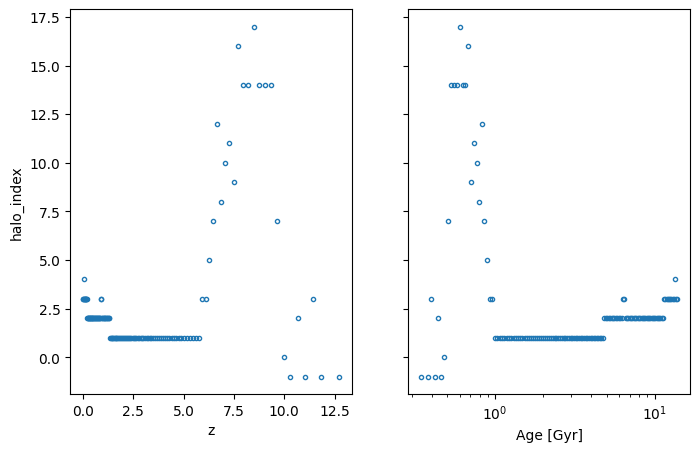

central_index


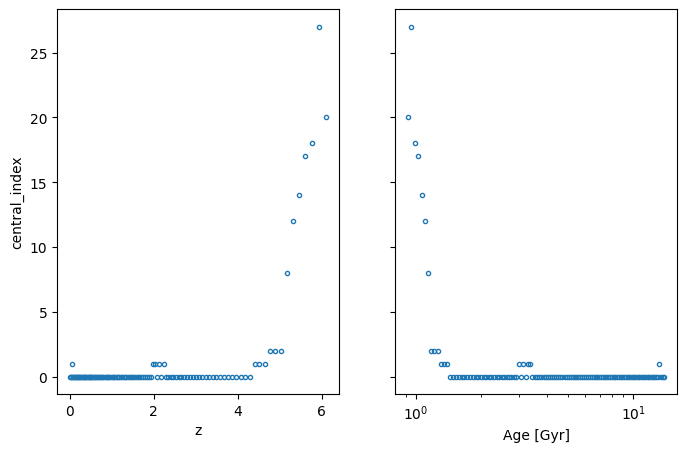

central_index_tracked


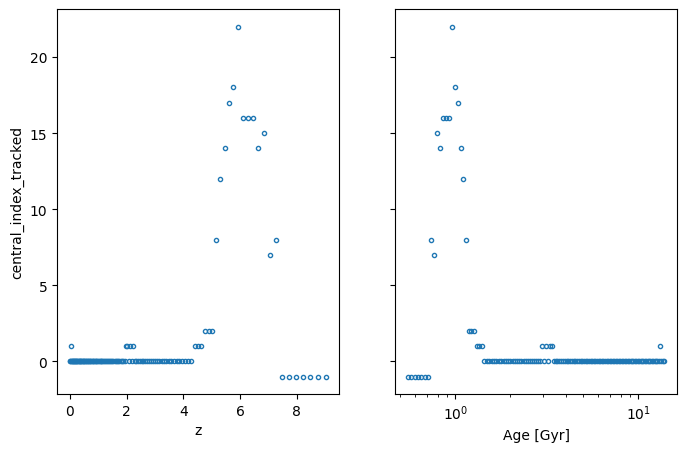

contamination_halo


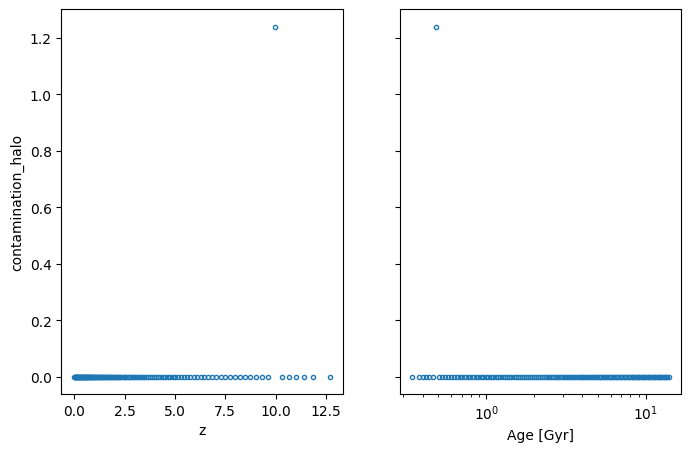

minpotpos_halo


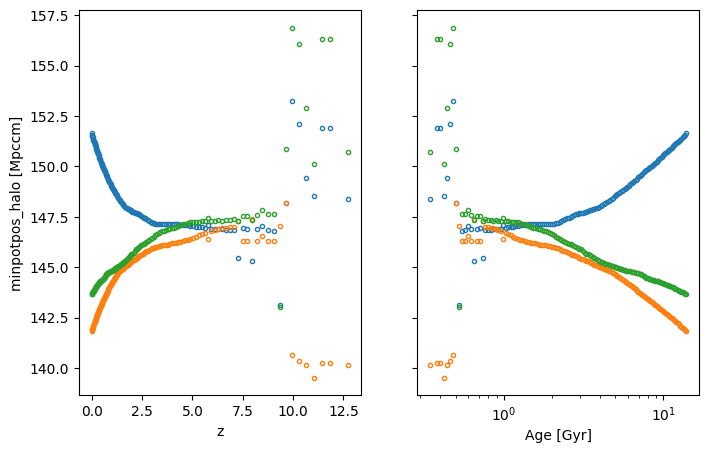

minpotpos_central


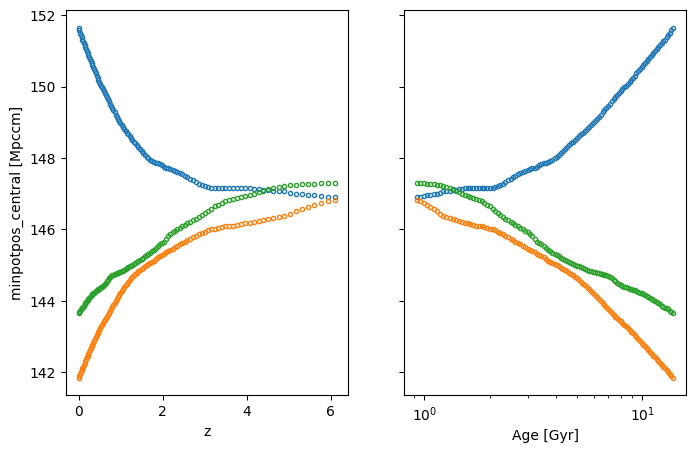

minpotpos_central_tracked


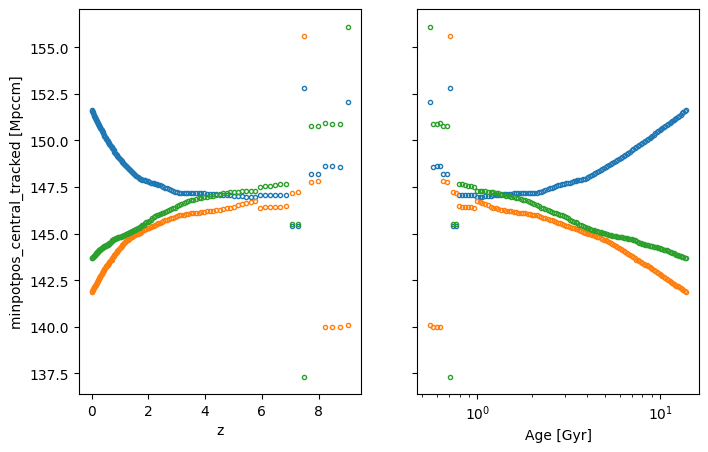

num_major_mergers_halo


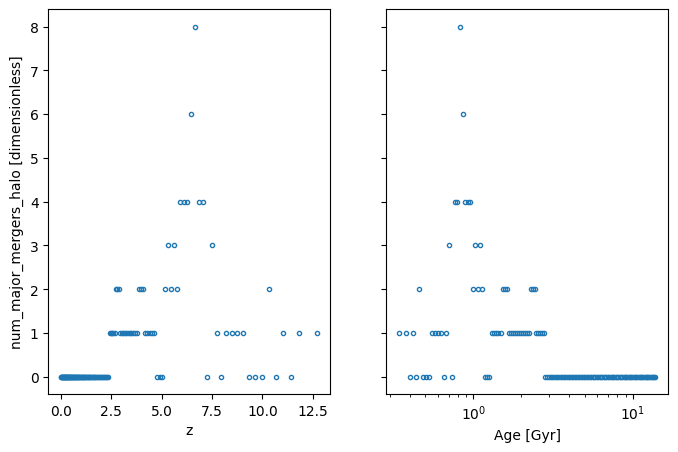

bh_mdot_central
[ 42  46  49  55  64  66  67  68  69  70  71  72  87  89 101 102 103 106]
-5.924297879666513
[1.19042522e-07 1.19042522e-07 1.19042522e-07 1.19042522e-07
 1.19042522e-07 1.19042522e-07 1.19042522e-07 1.19042522e-07
 1.19042522e-07 1.19042522e-07 1.19042522e-07 1.19042522e-07
 1.19042522e-07 1.19042522e-07 1.19042522e-07 1.19042522e-07
 1.19042522e-07 1.19042522e-07]


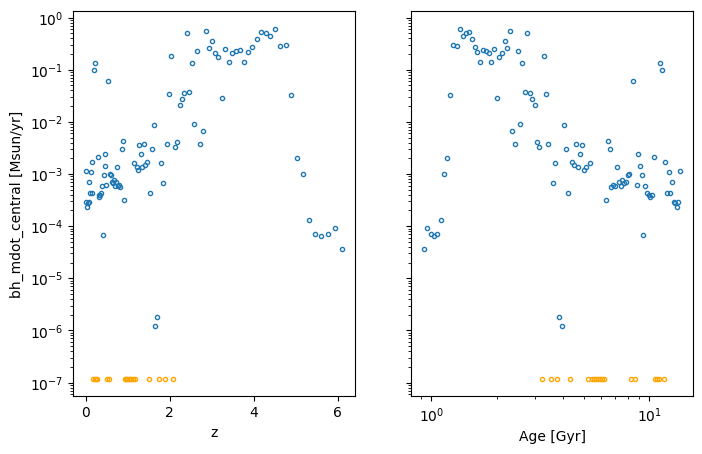

bh_fedd_central
[ 42  46  49  55  64  66  67  68  69  70  71  72  87  89 101 102 103 106]
-6.899070477377561
[1.26162278e-08 1.26162278e-08 1.26162278e-08 1.26162278e-08
 1.26162278e-08 1.26162278e-08 1.26162278e-08 1.26162278e-08
 1.26162278e-08 1.26162278e-08 1.26162278e-08 1.26162278e-08
 1.26162278e-08 1.26162278e-08 1.26162278e-08 1.26162278e-08
 1.26162278e-08 1.26162278e-08]


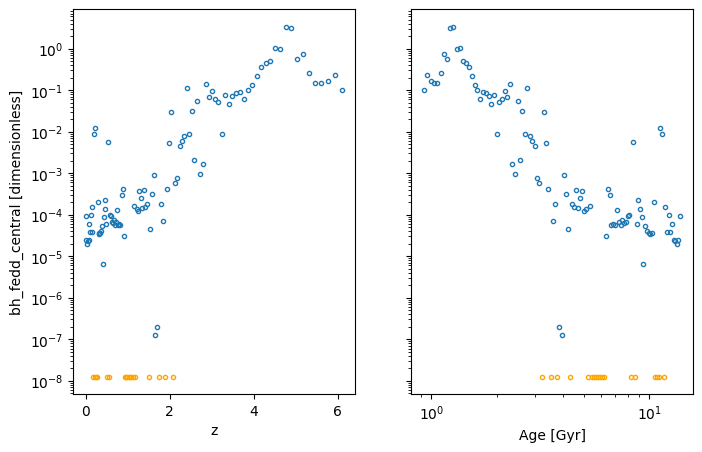

m2500c_halo
[]
9.033814663295841
[]


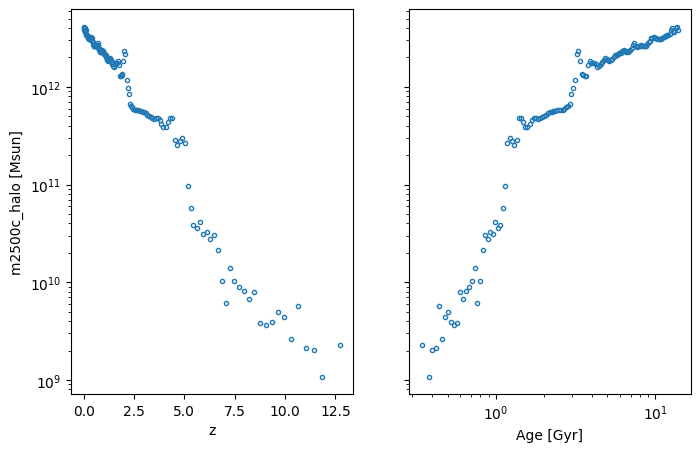

r2500c_halo
[]
1.1360480484908835
[]


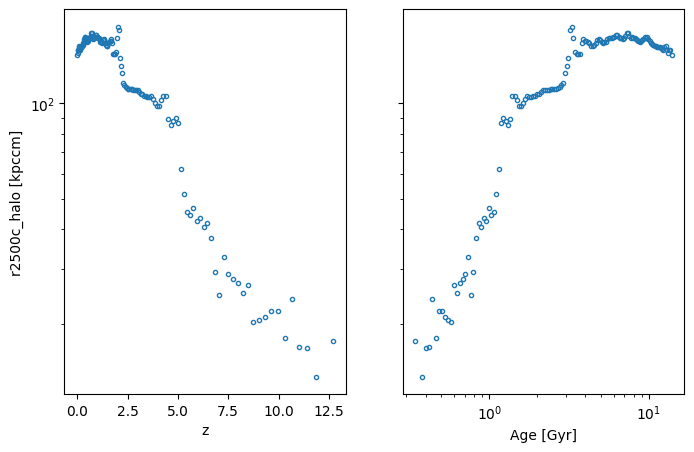

m500c_halo
[]
9.385793568186084
[]


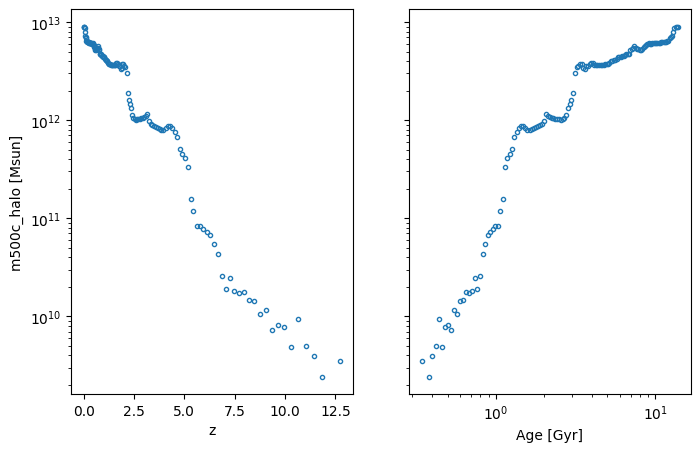

r500c_halo
[]
1.486156855775162
[]


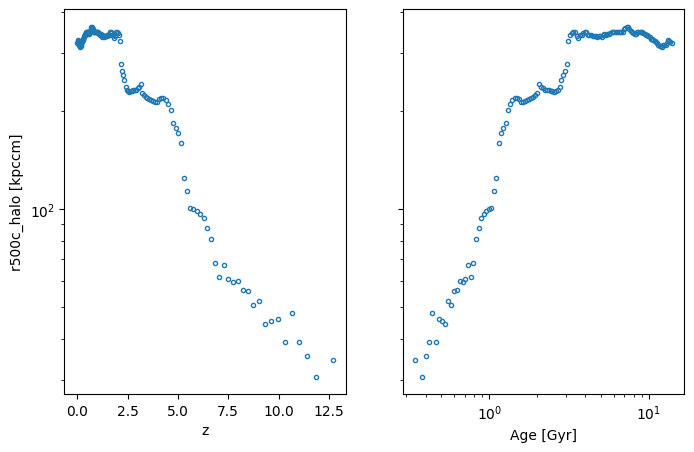

m200c_halo
[]
9.564322377931163
[]


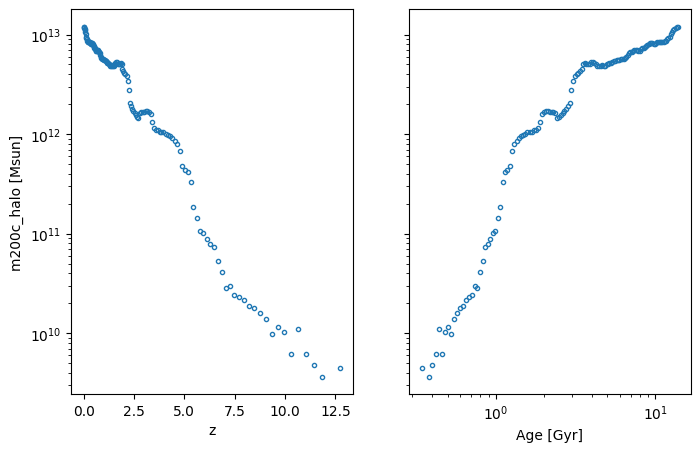

r200c_halo
[]
1.6788115614577757
[]


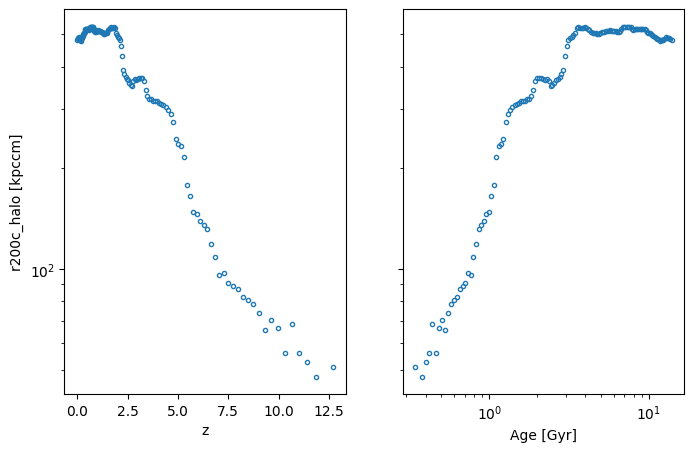

circular_velocity_halo


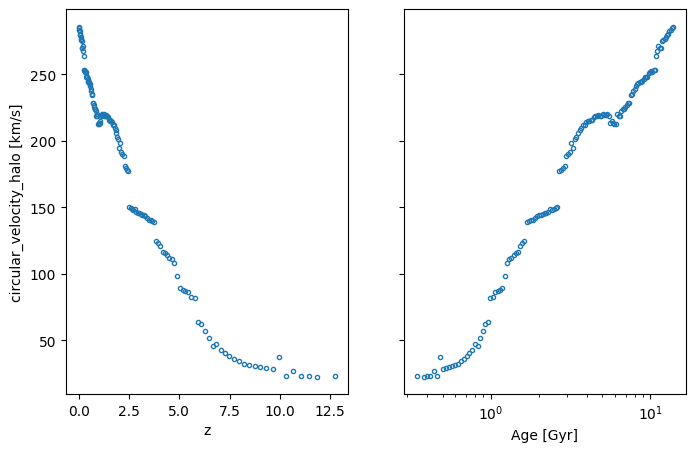

spin_param_halo


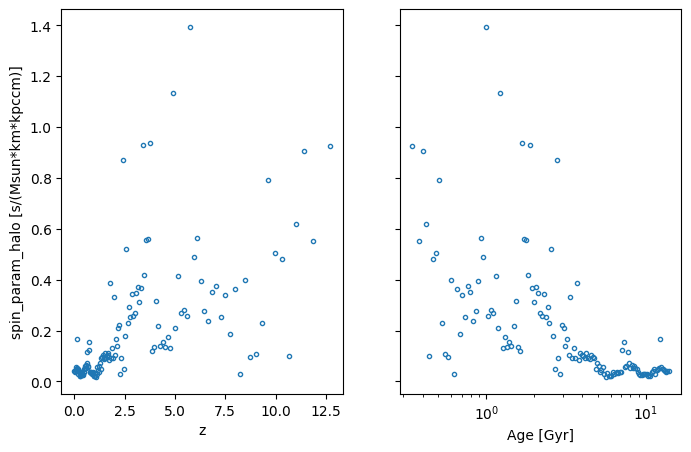

temperature_halo
[]
4.268168327532885
[]


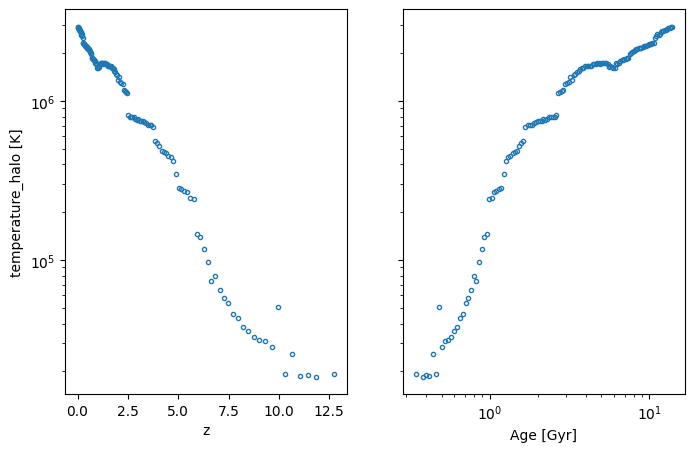

sfr_halo
[]
-2.5194111612191965
[]


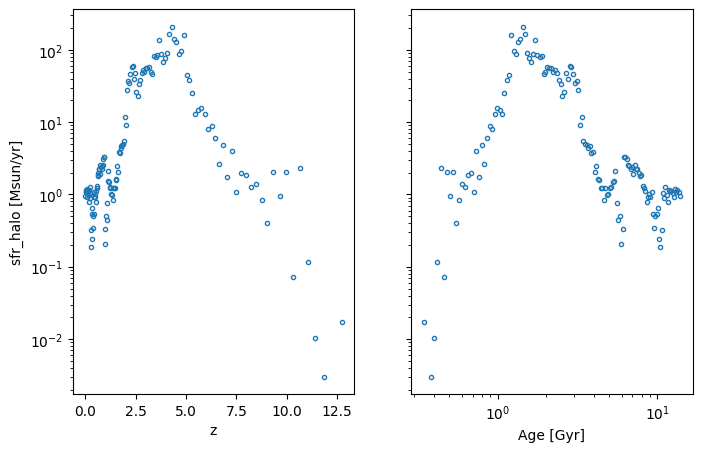

sfr_central
[ 52  53  54  55  56  57  58  59  60  61  62  63  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116]
-1.6353347067485524
[0.00231561 0.00231561 0.00231561 0.00231561 0.00231561 0.00231561
 0.00231561 0.00231561 0.00231561 0.00231561 0.00231561 0.00231561
 0.00231561 0.00231561 0.00231561 0.00231561 0.00231561 0.00231561
 0.00231561 0.00231561 0.00231561 0.00231561 0.00231561 0.00231561
 0.00231561 0.00231561 0.00231561 0.00231561 0.00231561 0.00231561
 0.00231561 0.00231561 0.00231561 0.00231561 0.00231561 0.00231561
 0.00231561 0.00231561 0.00231561 0.00231561 0.00231561 0.00231561
 0.00231561 0.00231561 0.00231561 0.00231561 0.00231561 0.00231561
 0.00231561 0.00231561 0.00231561 0.00231561 0.00231561 0.00231561
 0.00231561 0.00231561 0.00231561 0.00231561 0.00231561 0.00231561
 0.00231561 0.00231561 0.00231561]


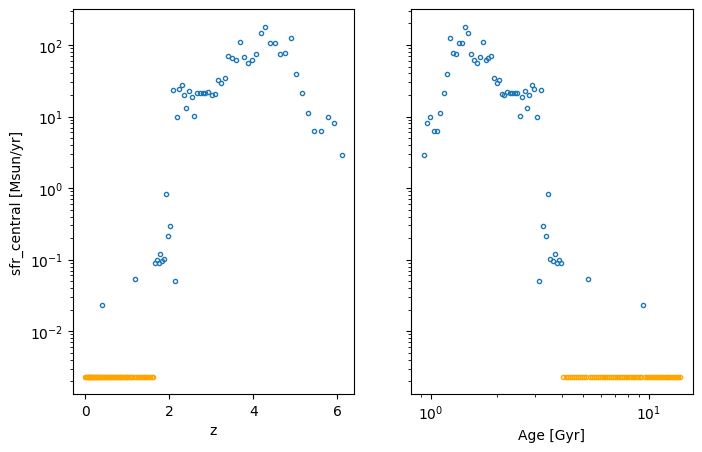

sfr_100_halo
[  1   2   3   5  92 129 130]
-0.7388736996224368
[0.01824426 0.01824426 0.01824426 0.01824426 0.01824426 0.01824426
 0.01824426]


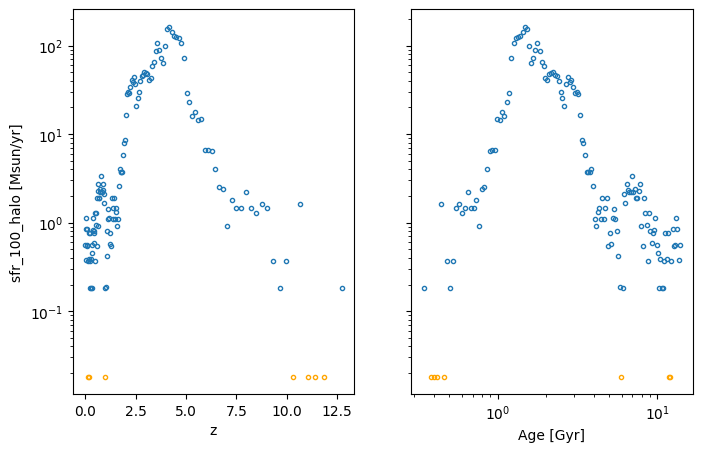

sfr_100_central
[ 47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]
-0.4378436087406969
[0.03648853 0.03648853 0.03648853 0.03648853 0.03648853 0.03648853
 0.03648853 0.03648853 0.03648853 0.03648853 0.03648853 0.03648853
 0.03648853 0.03648853 0.03648853 0.03648853 0.03648853 0.03648853
 0.03648853 0.03648853 0.03648853 0.03648853 0.03648853 0.03648853
 0.03648853 0.03648853 0.03648853 0.03648853 0.03648853 0.03648853
 0.03648853 0.03648853 0.03648853 0.03648853 0.03648853 0.03648853
 0.03648853 0.03648853 0.03648853 0.03648853 0.03648853 0.03648853
 0.03648853 0.03648853 0.03648853 0.03648853 0.03648853 0.03648853
 0.03648853 0.03648853 0.03648853 0.03648853 0.03648853 0.03648853
 0.03648853 0.03648853 0.03648853 0.03648853 0.03648853 0.03648853
 0.036488

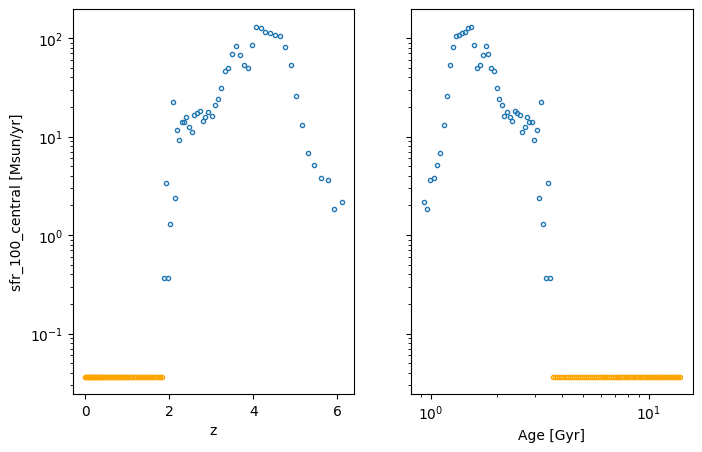

gas_mass_halo
[]
9.039277763414173
[]


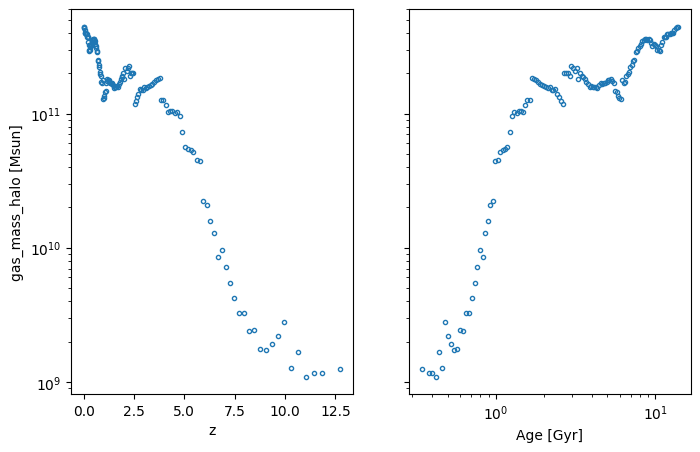

stellar_mass_halo
[1 2 3 5]
7.261126300377563
[1824426.2 1824426.2 1824426.2 1824426.2]


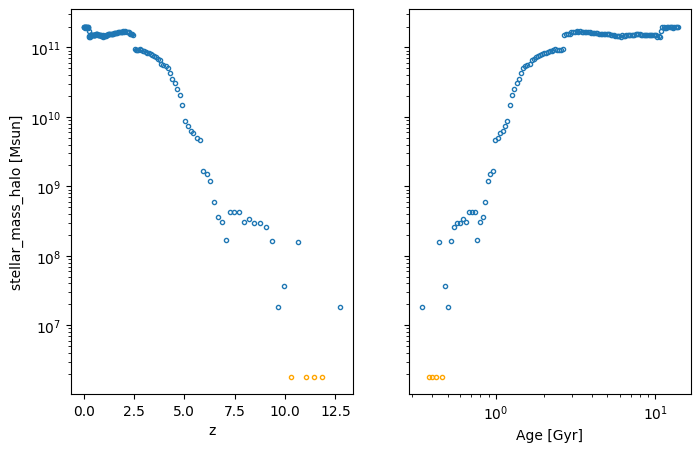

dm_mass_halo
[]
9.787465652581362
[]


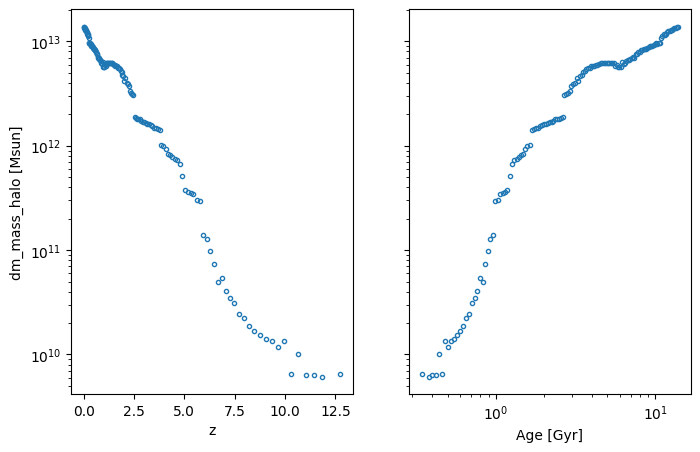

dust_mass_halo
[]
1.5786138297762056
[]


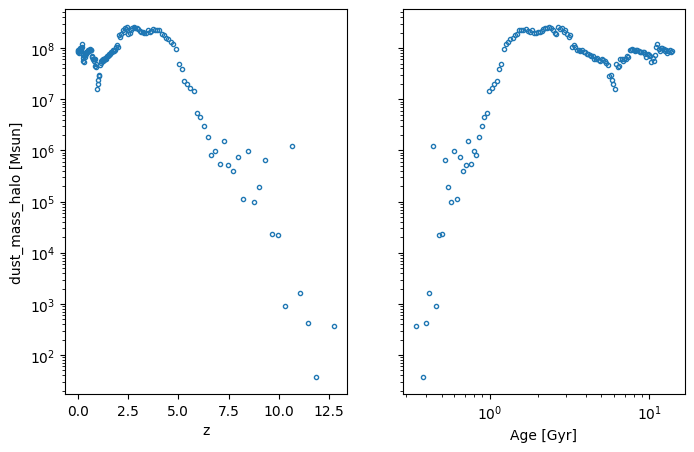

H2_mass_halo
[]
6.635807688068386
[]


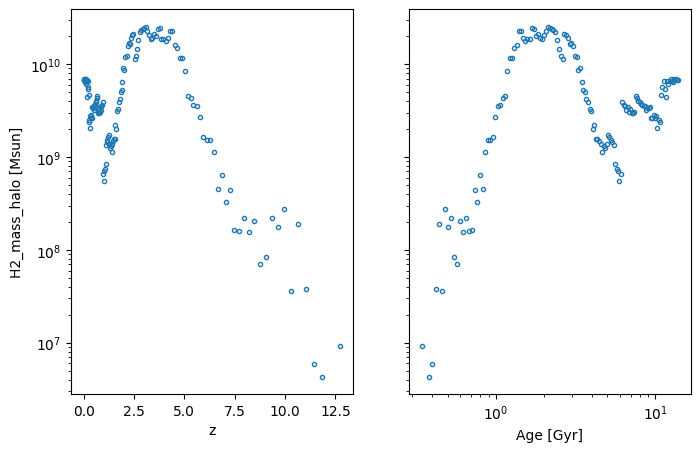

gas_mass_central
[ 52  53  54  55  56  57  58  59  60  61  62  63  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  95  96  97  98  99 100 101 102 103 104 105 106 108
 109 110 111 112 113 114 115 116]
8.14954799234892
[14110681.59999998 14110681.59999998 14110681.59999998 14110681.59999998
 14110681.59999998 14110681.59999998 14110681.59999998 14110681.59999998
 14110681.59999998 14110681.59999998 14110681.59999998 14110681.59999998
 14110681.59999998 14110681.59999998 14110681.59999998 14110681.59999998
 14110681.59999998 14110681.59999998 14110681.59999998 14110681.59999998
 14110681.59999998 14110681.59999998 14110681.59999998 14110681.59999998
 14110681.59999998 14110681.59999998 14110681.59999998 14110681.59999998
 14110681.59999998 14110681.59999998 14110681.59999998 14110681.59999998
 14110681.59999998 14110681.59999998 14110681.59999998 14110681.59999998
 14110681.59999998 14110681.59999998 14110681.59999998 1

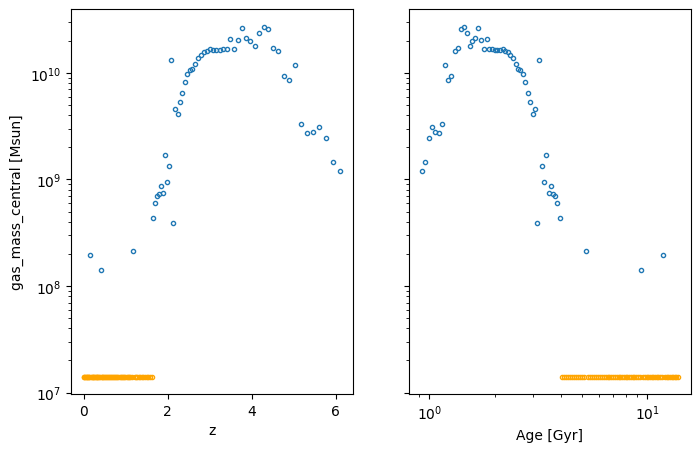

gas_30kpc_mass_central
[]
8.224440620814656
[]


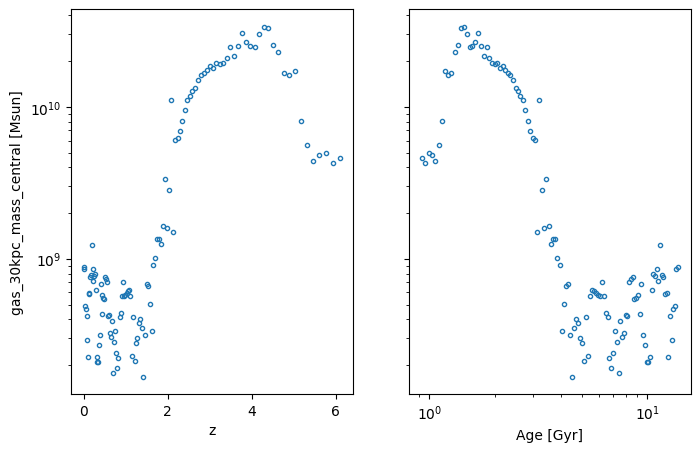

stellar_mass_central
[]
8.617879218559057
[]


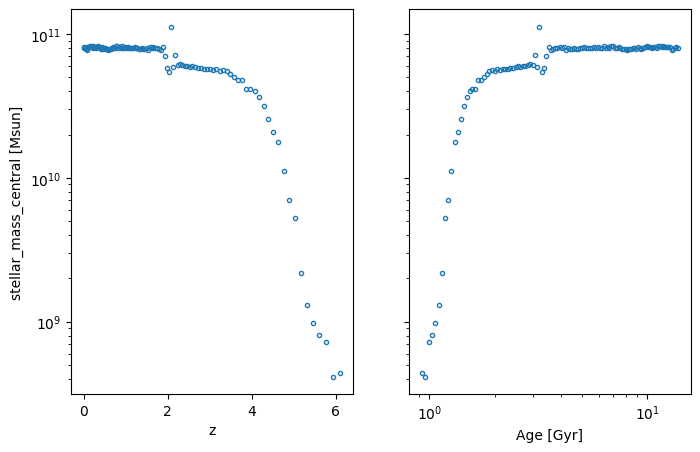

dm_mass_central
[]
7.165636290689181
[]


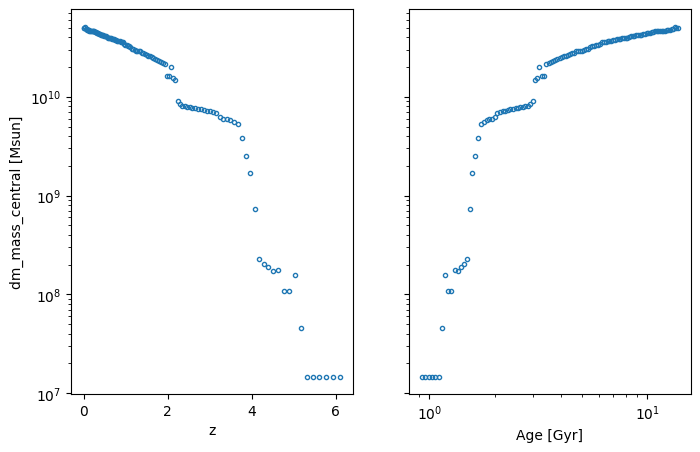

dm_30kpc_mass_central
[]
10.221834890606644
[]


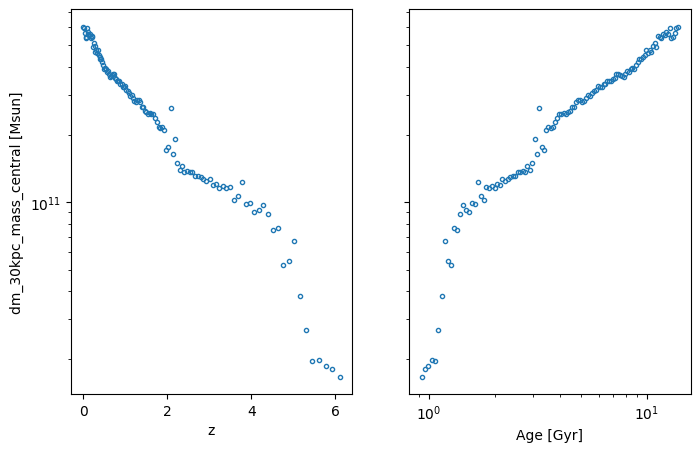

bh_mass_central
[]
4.208818330323946
[]


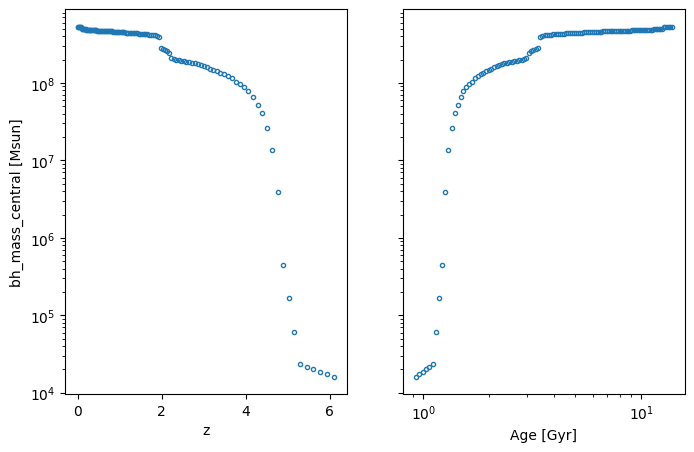

bh_30kpc_mass_central
[]
7.165642963782561
[]


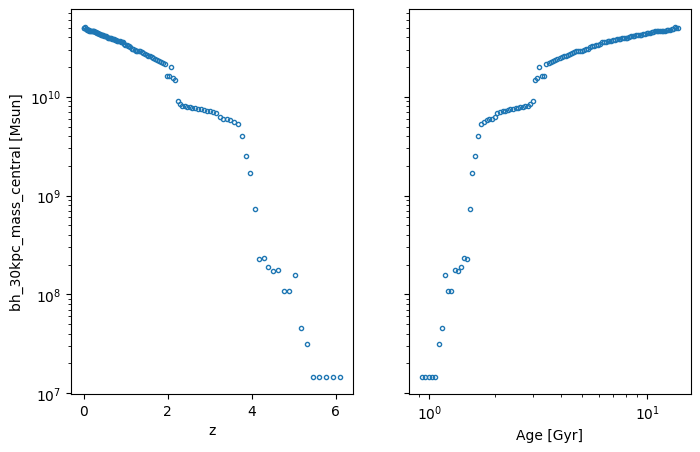

dust_mass_central
[ 52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116]
5.2322184941893655
[17069.409375 17069.409375 17069.409375 17069.409375 17069.409375
 17069.409375 17069.409375 17069.409375 17069.409375 17069.409375
 17069.409375 17069.409375 17069.409375 17069.409375 17069.409375
 17069.409375 17069.409375 17069.409375 17069.409375 17069.409375
 17069.409375 17069.409375 17069.409375 17069.409375 17069.409375
 17069.409375 17069.409375 17069.409375 17069.409375 17069.409375
 17069.409375 17069.409375 17069.409375 17069.409375 17069.409375
 17069.409375 17069.409375 17069.409375 17069.409375 17069.409375
 17069.409375 17069.409375 17069.409375 17069.409375 17069.409375
 17069.409375 17069.409375 17069.409375 17069.409375 17069.409375
 17069.409375 17069.409375 17069.40937

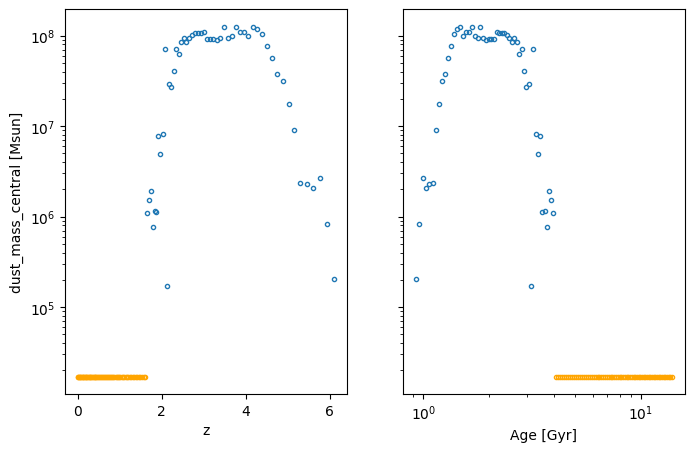

HI_mass_central
[]
6.825381151340075
[]


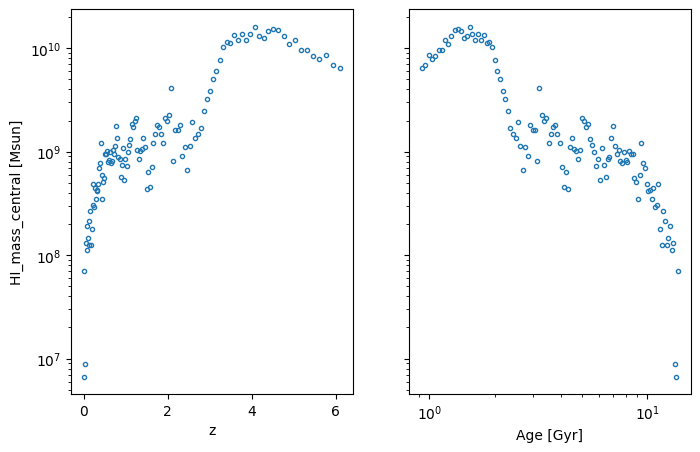

HI_30kpc_mass_central
[]
0.5855820498442655
[]


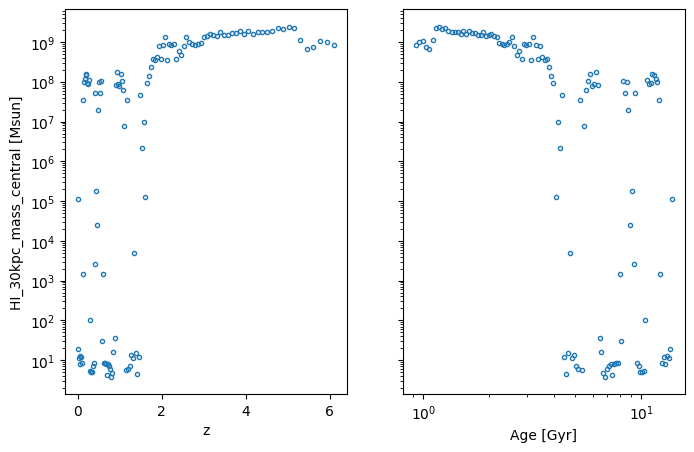

H2_mass_central
[ 92 105 106 108 113 114 115 116]
6.7442803844874
[554983.9 554983.9 554983.9 554983.9 554983.9 554983.9 554983.9 554983.9]


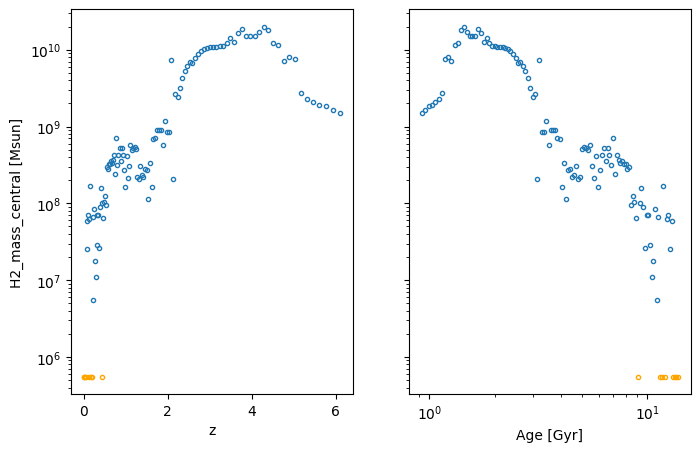

H2_30kpc_mass_central
[ 52  53  54  55  56  57  58  59  60  61  62  63  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116]
7.8099798410854175
[6456242.6 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6
 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6
 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6
 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6
 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6
 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6
 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6
 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6
 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6 6456242.6]


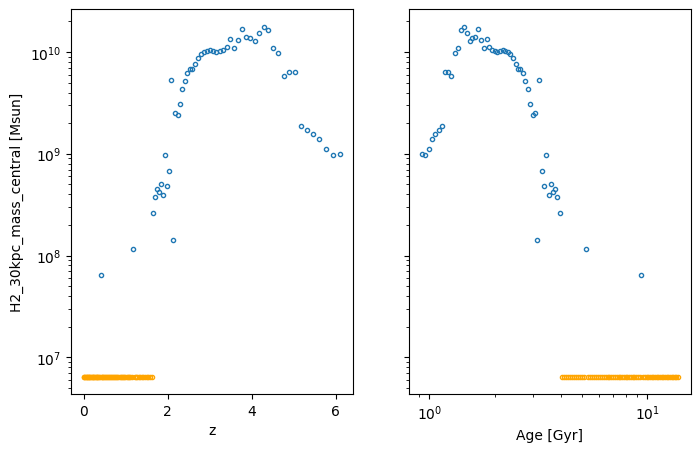

gas_half_mass_radius_halo
[]
1.2333871097609777
[]


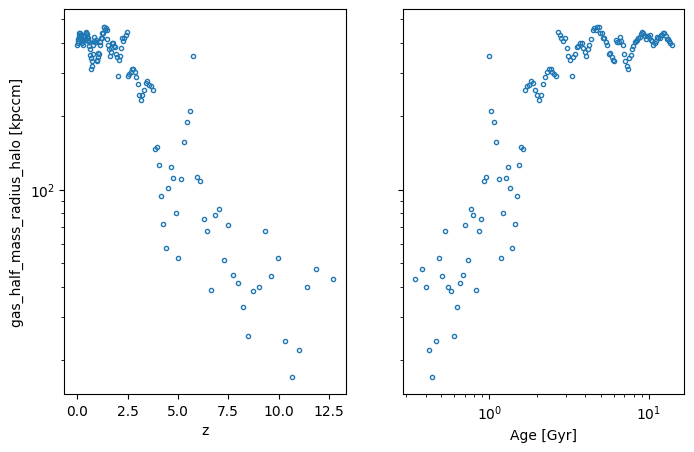

gas_r20_radius_halo
[]
0.6117128431146436
[]


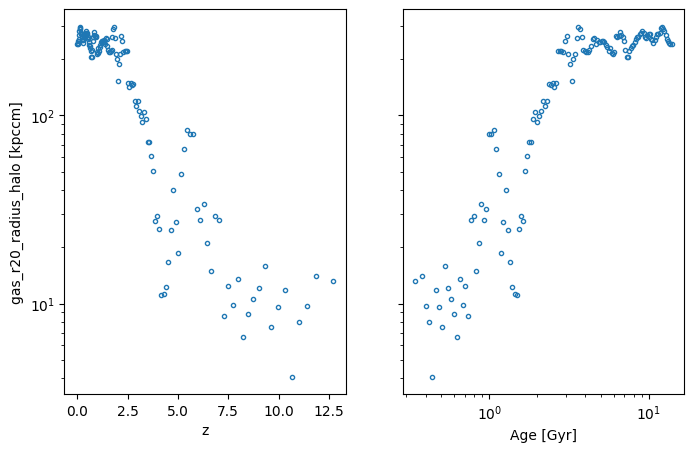

gas_r80_radius_halo
[]
1.6763021376749956
[]


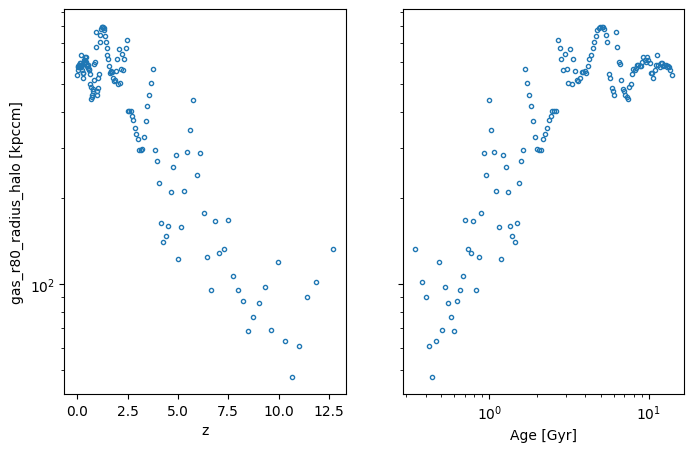

stellar_half_mass_radius_halo
[1 2 3 5]
-0.12797581511464523
[0.07447734 0.07447734 0.07447734 0.07447734]


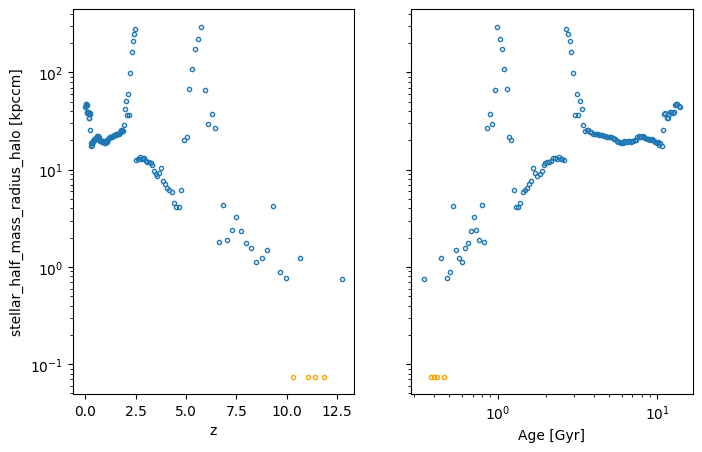

stellar_r20_radius_halo
[1 2 3 5]
-0.412804256665082
[0.03865412 0.03865412 0.03865412 0.03865412]


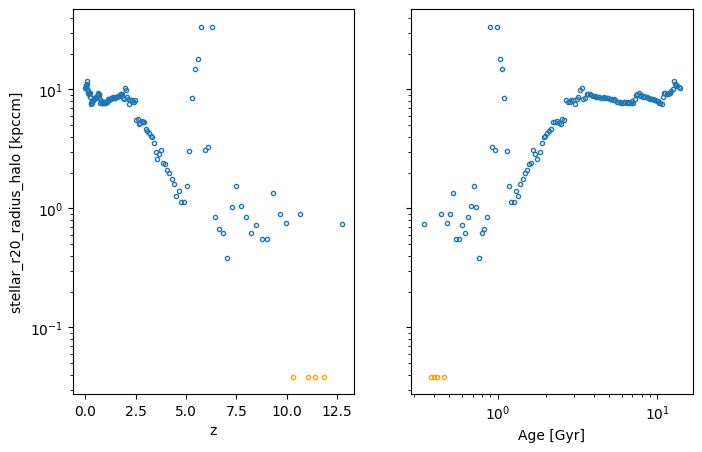

stellar_r80_radius_halo
[1 2 3 5]
-0.12797581511464523
[0.07447734 0.07447734 0.07447734 0.07447734]


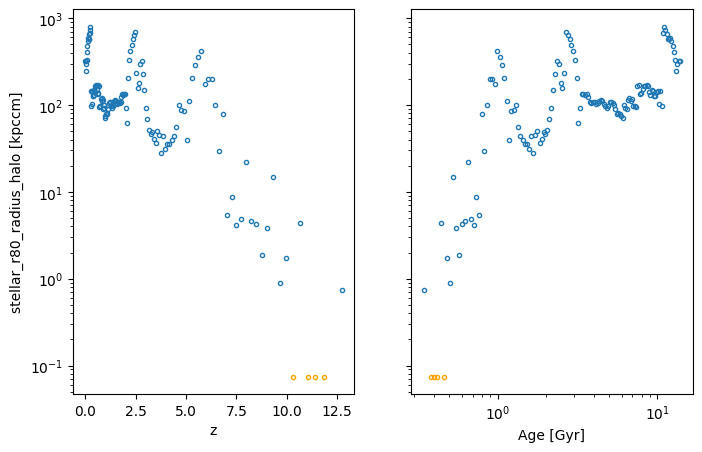

dm_half_mass_radius_halo
[]
1.4063373332570648
[]


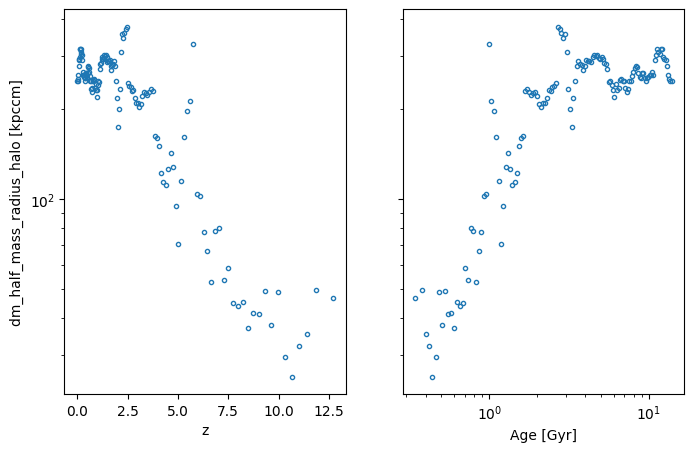

dm_r20_radius_halo
[]
0.9486074224076015
[]


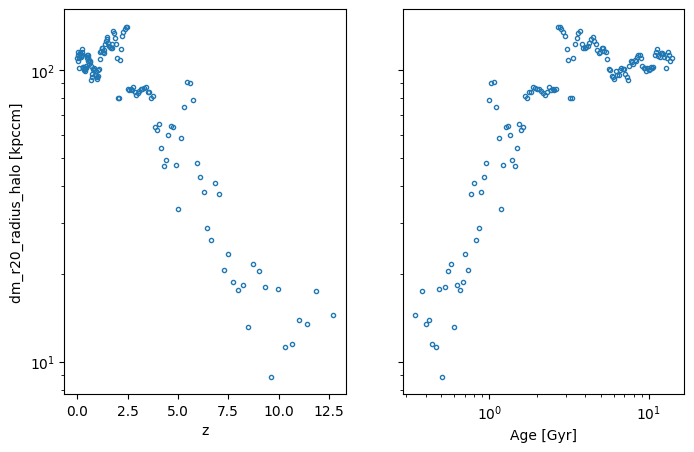

dm_r80_radius_halo
[]
1.7015819103514411
[]


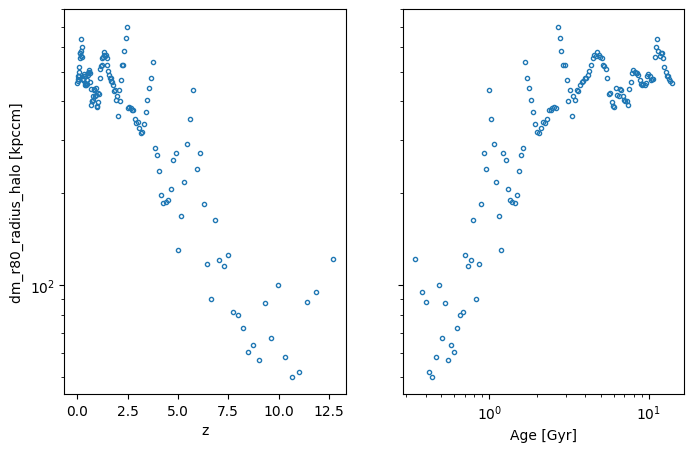

baryon_half_mass_radius_halo
[]
1.1764173412269852
[]


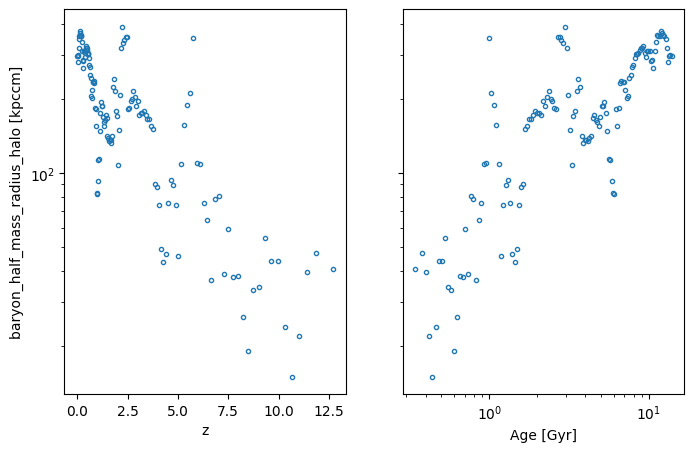

baryon_r20_radius_halo
[]
0.2929010329440155
[]


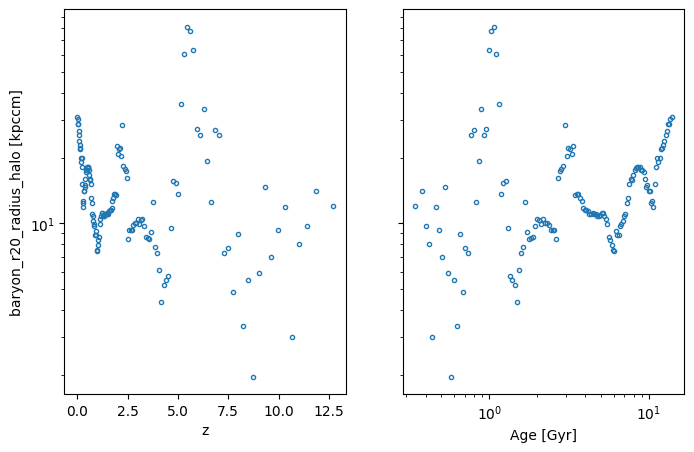

baryon_r80_radius_halo
[]
1.657751562639683
[]


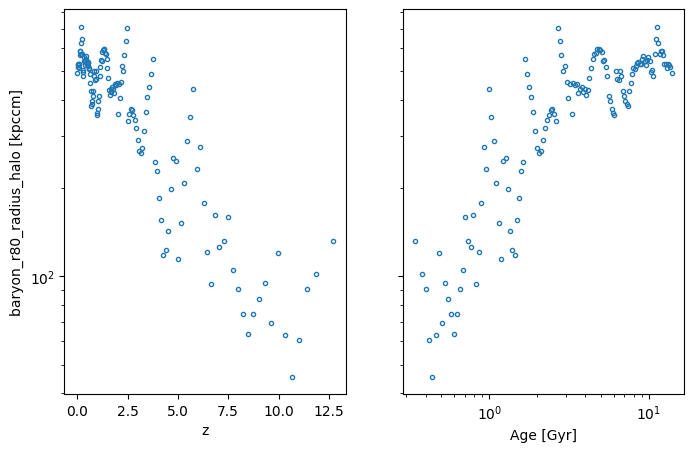

total_half_mass_radius_halo
[]
1.395841371936667
[]


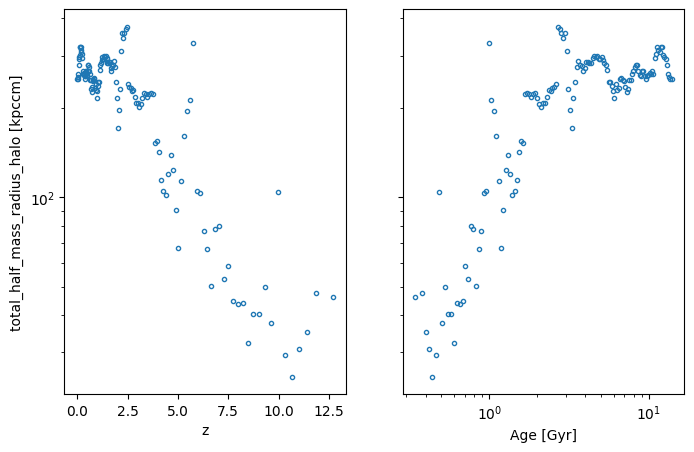

total_r20_radius_halo
[]
0.9398130654694556
[]


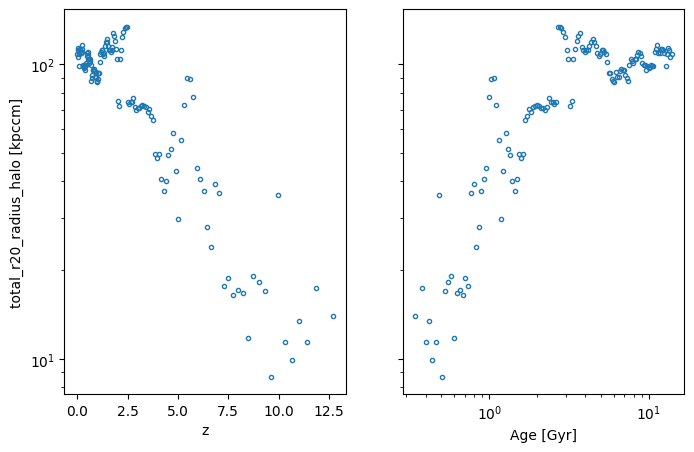

total_r80_radius_halo
[]
1.7015819103514411
[]


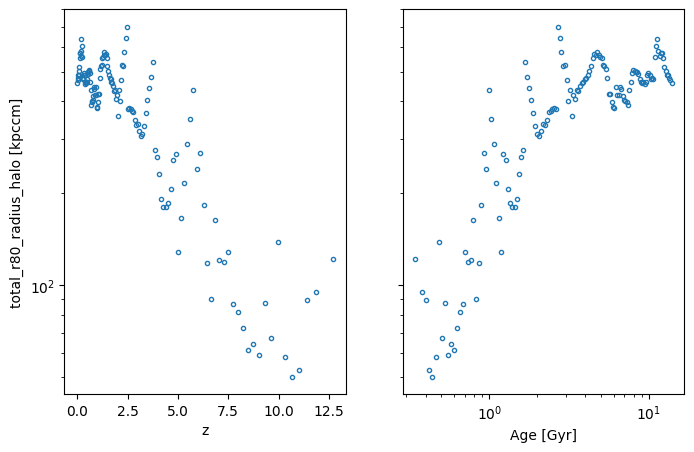

gas_half_mass_radius_central
[ 52  53  54  55  56  57  58  59  60  61  62  63  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  95  96  97  98  99 100 101 102 103 104 105 106 108
 109 110 111 112 113 114 115 116]
-0.1336892676742921
[0.07350396 0.07350396 0.07350396 0.07350396 0.07350396 0.07350396
 0.07350396 0.07350396 0.07350396 0.07350396 0.07350396 0.07350396
 0.07350396 0.07350396 0.07350396 0.07350396 0.07350396 0.07350396
 0.07350396 0.07350396 0.07350396 0.07350396 0.07350396 0.07350396
 0.07350396 0.07350396 0.07350396 0.07350396 0.07350396 0.07350396
 0.07350396 0.07350396 0.07350396 0.07350396 0.07350396 0.07350396
 0.07350396 0.07350396 0.07350396 0.07350396 0.07350396 0.07350396
 0.07350396 0.07350396 0.07350396 0.07350396 0.07350396 0.07350396
 0.07350396 0.07350396 0.07350396 0.07350396 0.07350396 0.07350396
 0.07350396 0.07350396 0.07350396 0.07350396 0.07350396 0.07350396
 0.07350396 0.07350396]


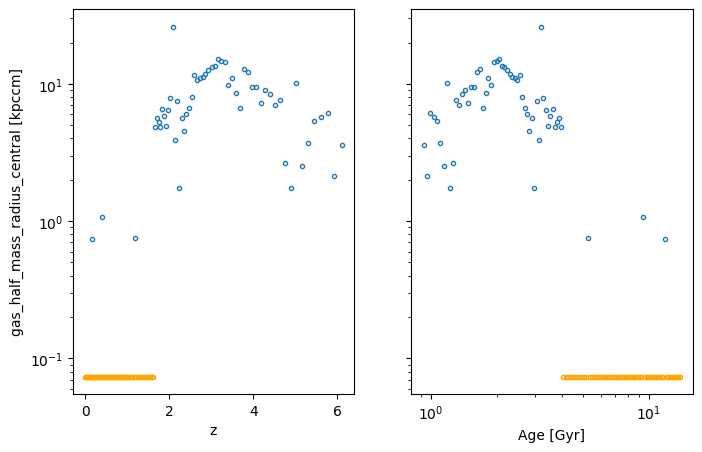

gas_r20_radius_central
[ 52  53  54  55  56  57  58  59  60  61  62  63  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  95  96  97  98  99 100 101 102 103 104 105 106 108
 109 110 111 112 113 114 115 116]
-0.3228744784865625
[0.04754726 0.04754726 0.04754726 0.04754726 0.04754726 0.04754726
 0.04754726 0.04754726 0.04754726 0.04754726 0.04754726 0.04754726
 0.04754726 0.04754726 0.04754726 0.04754726 0.04754726 0.04754726
 0.04754726 0.04754726 0.04754726 0.04754726 0.04754726 0.04754726
 0.04754726 0.04754726 0.04754726 0.04754726 0.04754726 0.04754726
 0.04754726 0.04754726 0.04754726 0.04754726 0.04754726 0.04754726
 0.04754726 0.04754726 0.04754726 0.04754726 0.04754726 0.04754726
 0.04754726 0.04754726 0.04754726 0.04754726 0.04754726 0.04754726
 0.04754726 0.04754726 0.04754726 0.04754726 0.04754726 0.04754726
 0.04754726 0.04754726 0.04754726 0.04754726 0.04754726 0.04754726
 0.04754726 0.04754726]


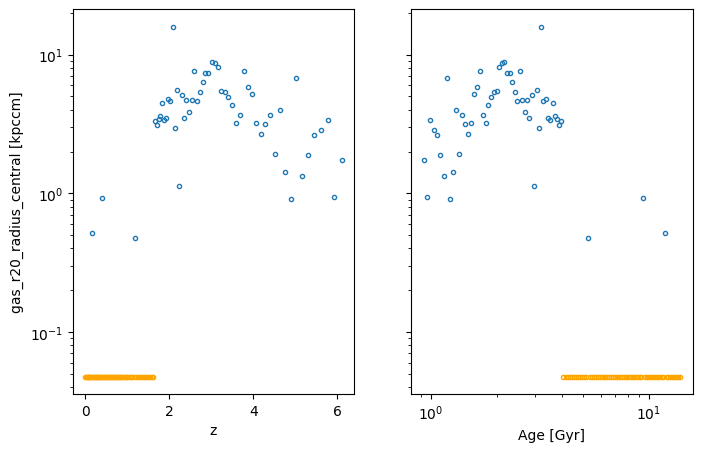

gas_r80_radius_central
[ 52  53  54  55  56  57  58  59  60  61  62  63  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  95  96  97  98  99 100 101 102 103 104 105 106 108
 109 110 111 112 113 114 115 116]
-0.1073837593184317
[0.07809374 0.07809374 0.07809374 0.07809374 0.07809374 0.07809374
 0.07809374 0.07809374 0.07809374 0.07809374 0.07809374 0.07809374
 0.07809374 0.07809374 0.07809374 0.07809374 0.07809374 0.07809374
 0.07809374 0.07809374 0.07809374 0.07809374 0.07809374 0.07809374
 0.07809374 0.07809374 0.07809374 0.07809374 0.07809374 0.07809374
 0.07809374 0.07809374 0.07809374 0.07809374 0.07809374 0.07809374
 0.07809374 0.07809374 0.07809374 0.07809374 0.07809374 0.07809374
 0.07809374 0.07809374 0.07809374 0.07809374 0.07809374 0.07809374
 0.07809374 0.07809374 0.07809374 0.07809374 0.07809374 0.07809374
 0.07809374 0.07809374 0.07809374 0.07809374 0.07809374 0.07809374
 0.07809374 0.07809374]


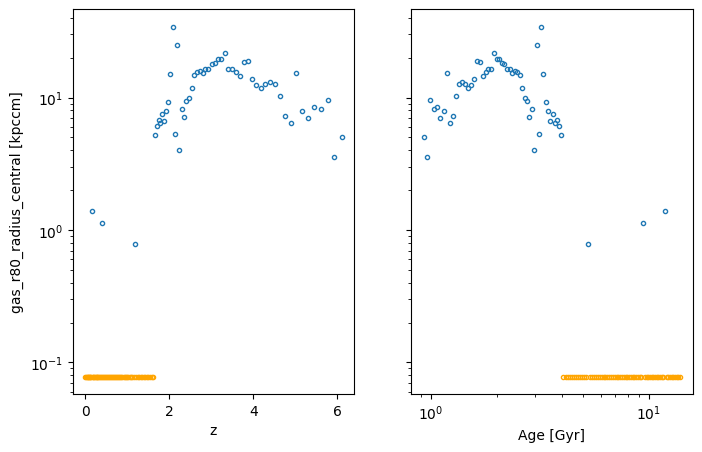

stellar_half_mass_radius_central
[]
0.10714892139040727
[]


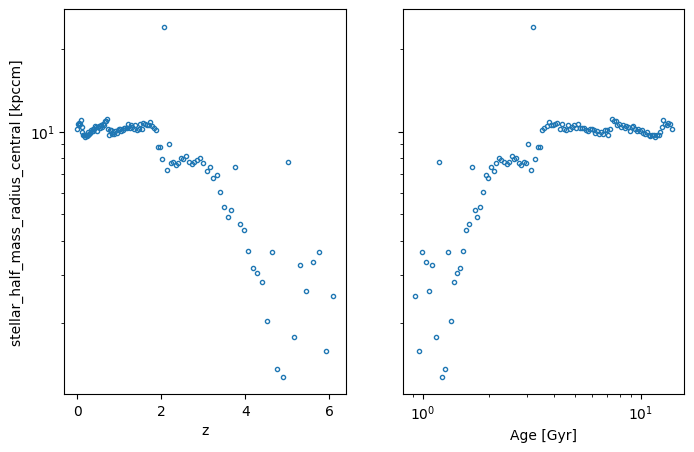

stellar_r20_radius_central
[]
-0.09752717804308522
[]


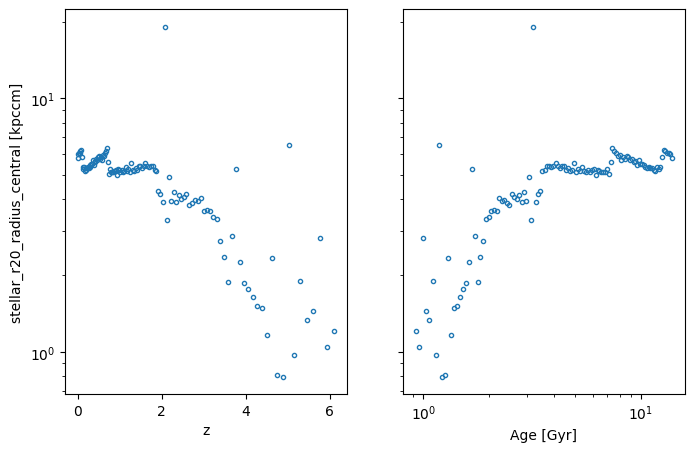

stellar_r80_radius_central
[]
0.41684772654495855
[]


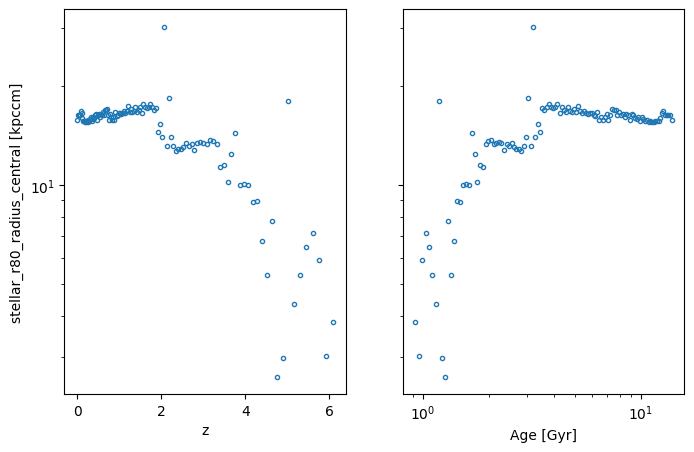

dm_half_mass_radius_central
[]
-0.9566949719268537
[]


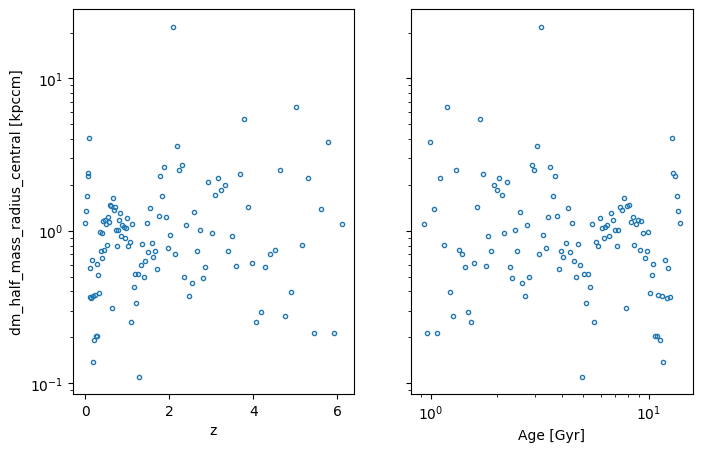

dm_r20_radius_central
[]
-0.9566949719268537
[]


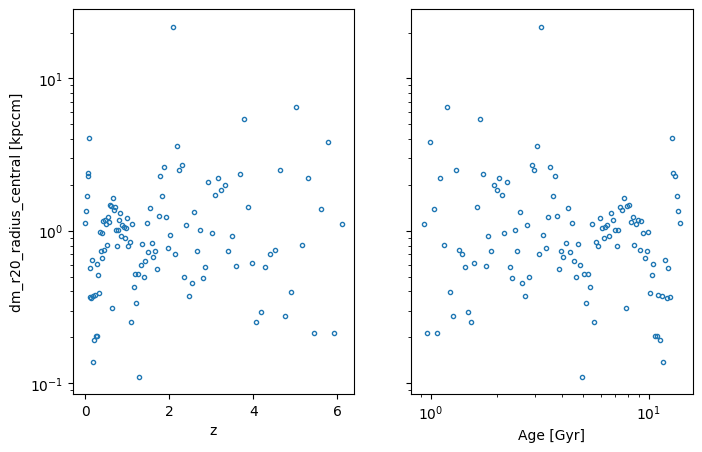

dm_r80_radius_central
[]
-0.9566949719268537
[]


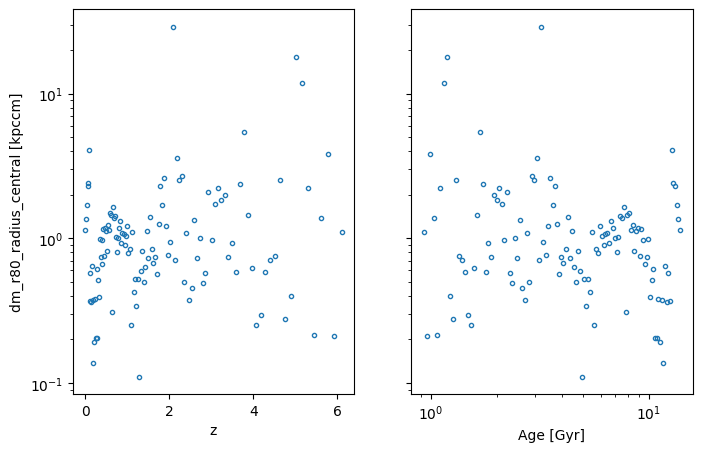

baryon_half_mass_radius_central
[]
0.15632128522242167
[]


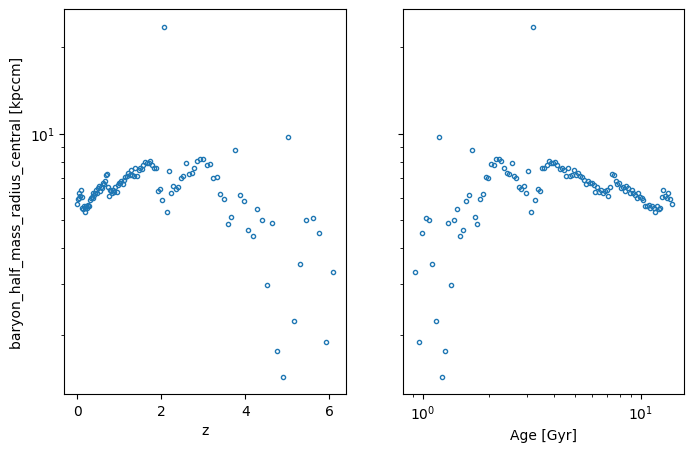

baryon_r20_radius_central
[]
-0.9566949719268537
[]


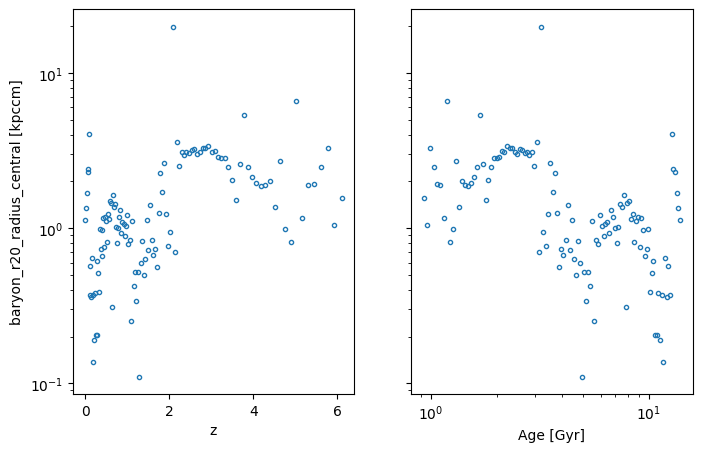

baryon_r80_radius_central
[]
0.5330792018483573
[]


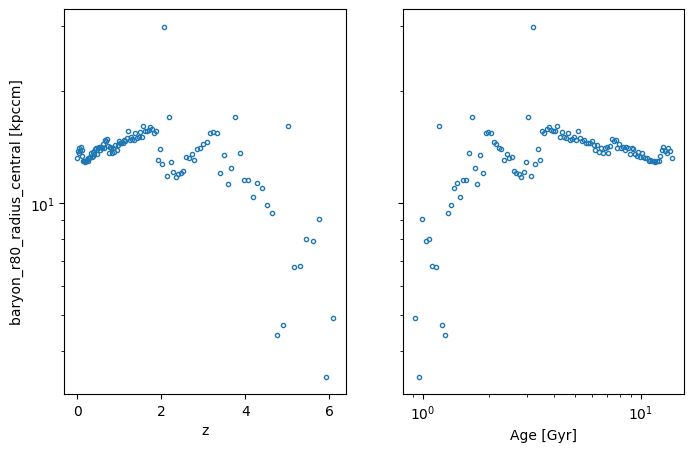

total_half_mass_radius_central
[]
0.15632128522242167
[]


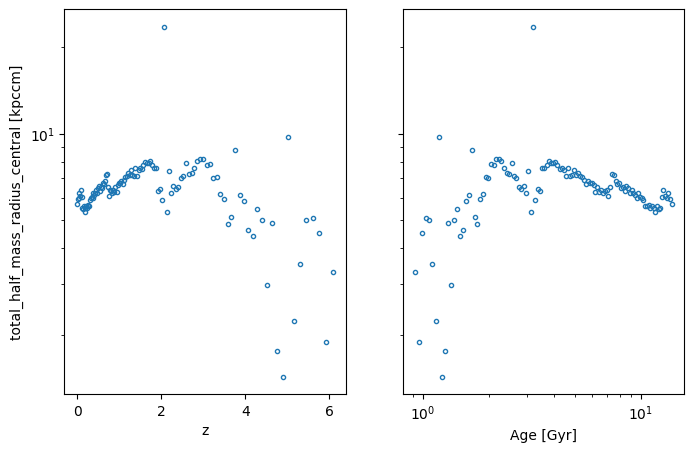

total_r20_radius_central
[]
-0.9566949719268537
[]


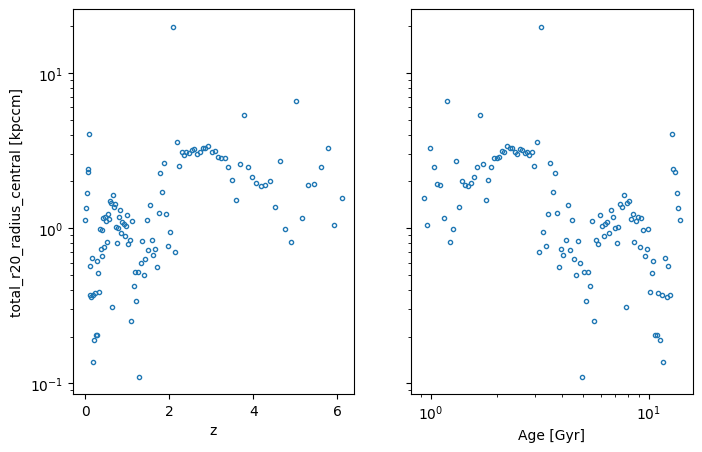

total_r80_radius_central
[]
0.5330792018483573
[]


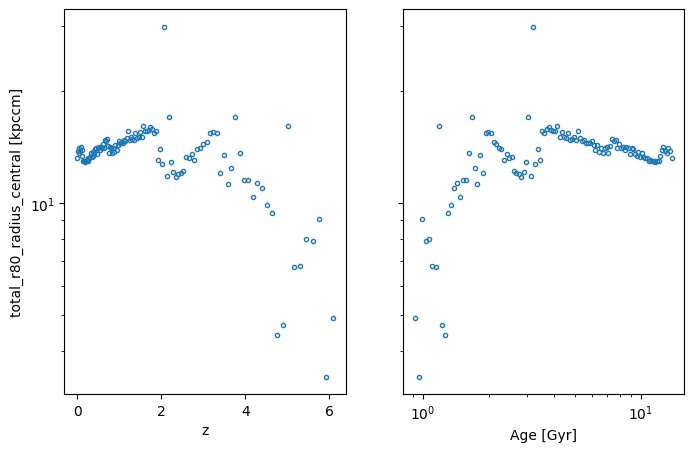

mass_weighted_metallicity_halo


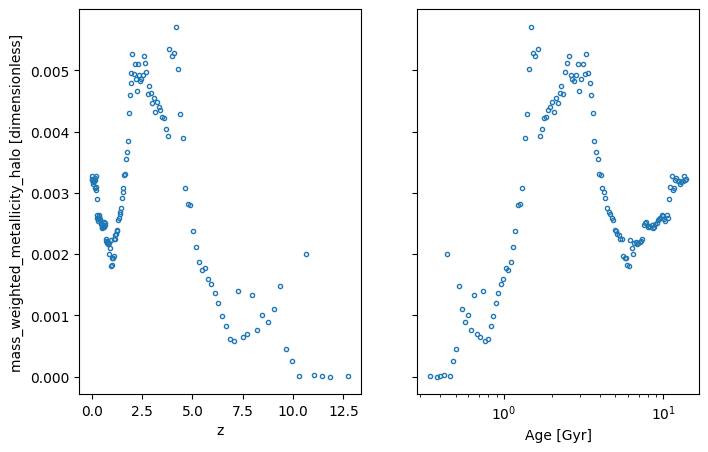

sfr_weighted_metallicity_halo


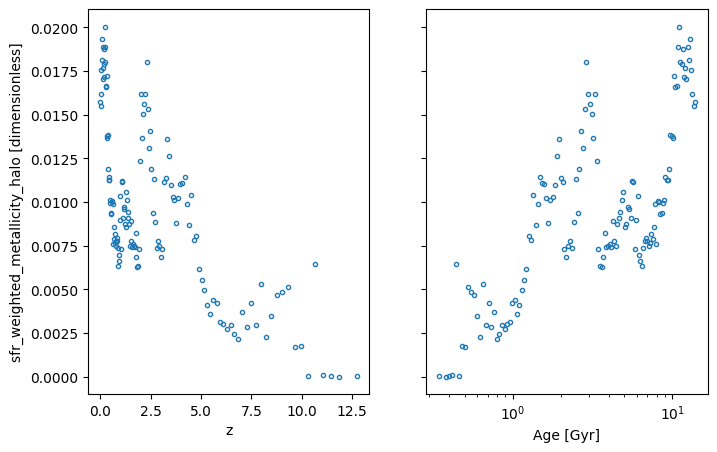

stellar_metallicity_halo


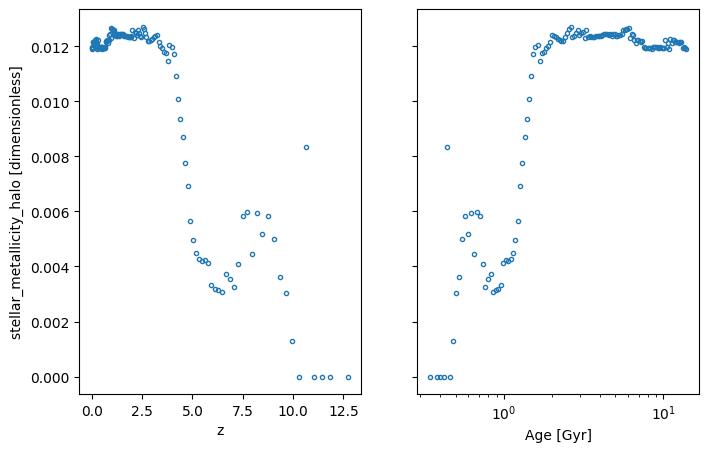

mass_weighted_cgm_metallicity_halo


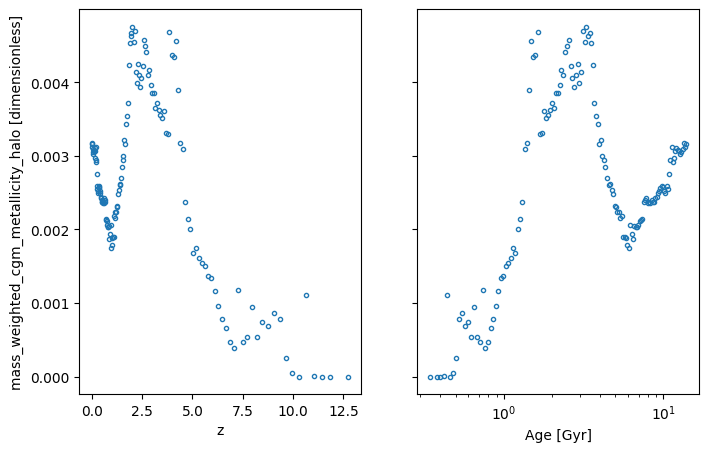

temp_weighted_cgm_metallicity_halo
[0]
2.1178217810633306
[13.1166153]


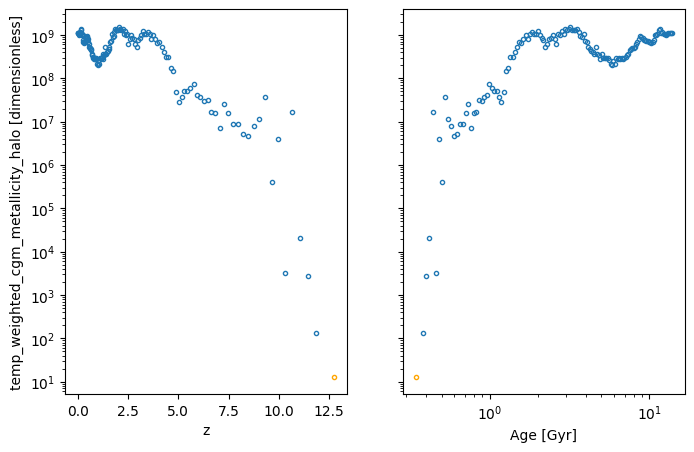

mass_weighted_metallicity_central


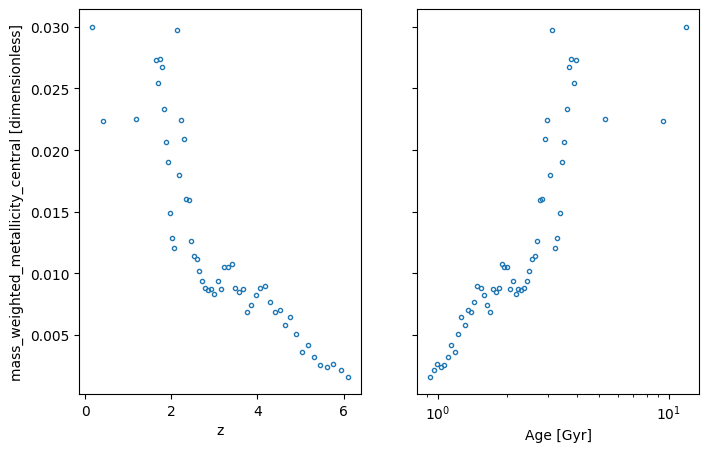

sfr_weighted_metallicity_central


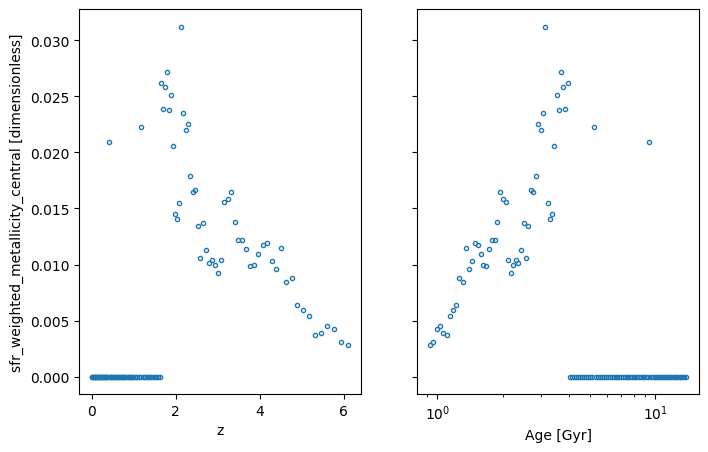

stellar_metallicity_central


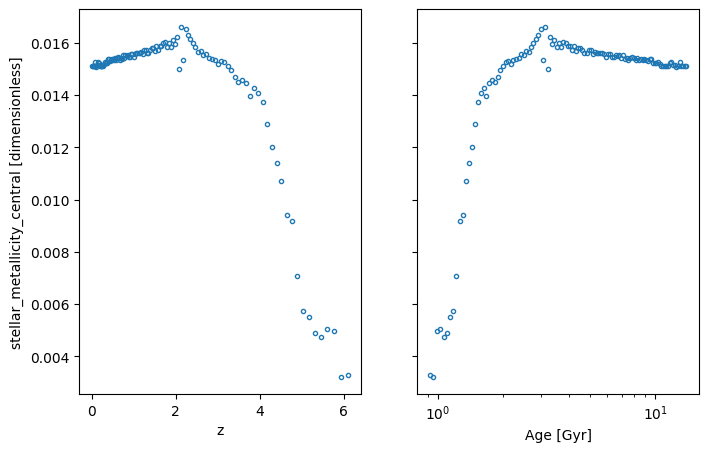

gas_velocity_dispersion_halo


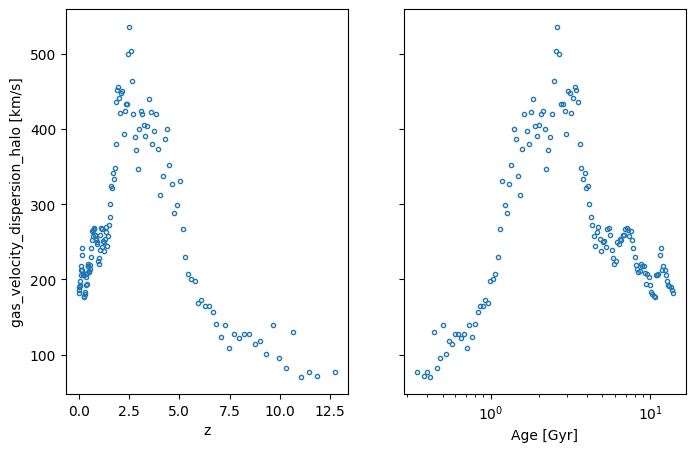

stellar_velocity_dispersion_halo


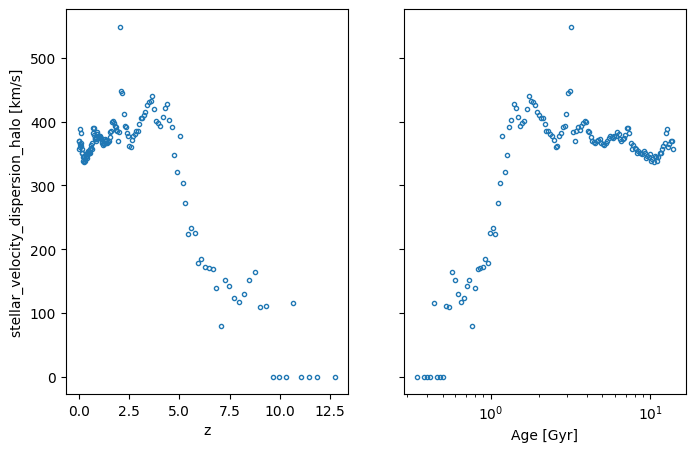

dm_velocity_dispersion_halo


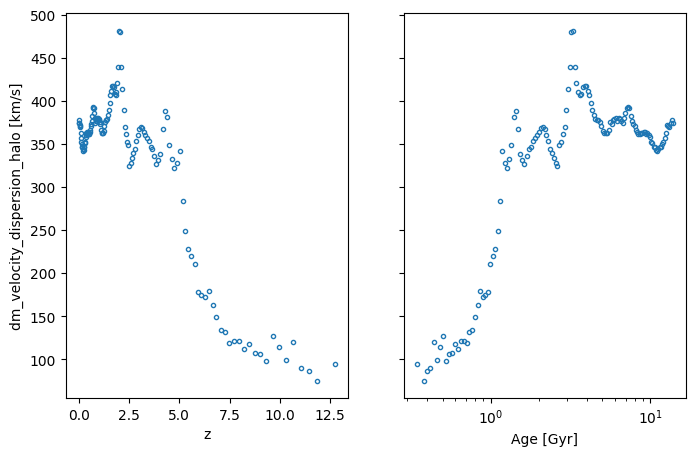

baryon_velocity_dispersion_halo


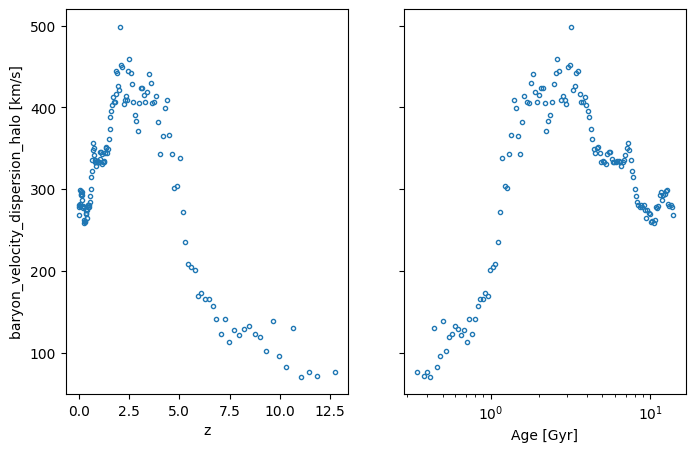

total_velocity_dispersion_halo


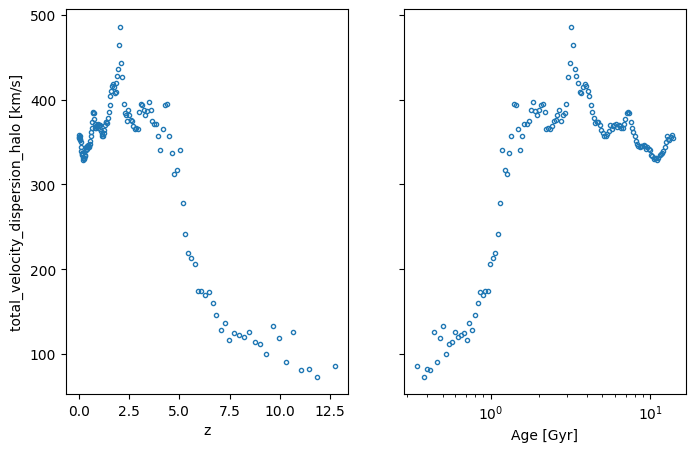

gas_velocity_dispersion_central


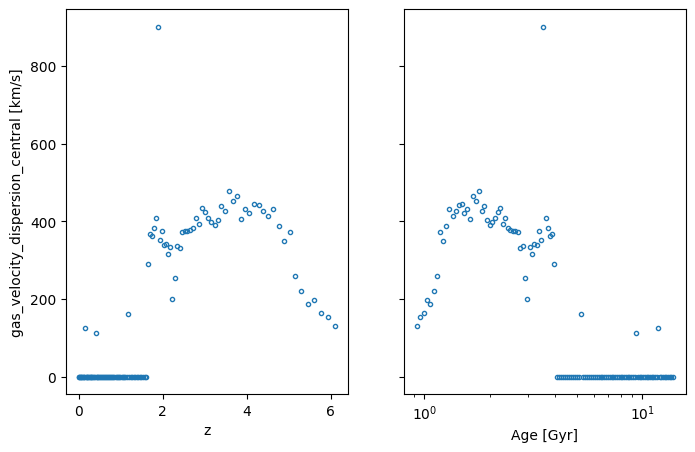

stellar_velocity_dispersion_central


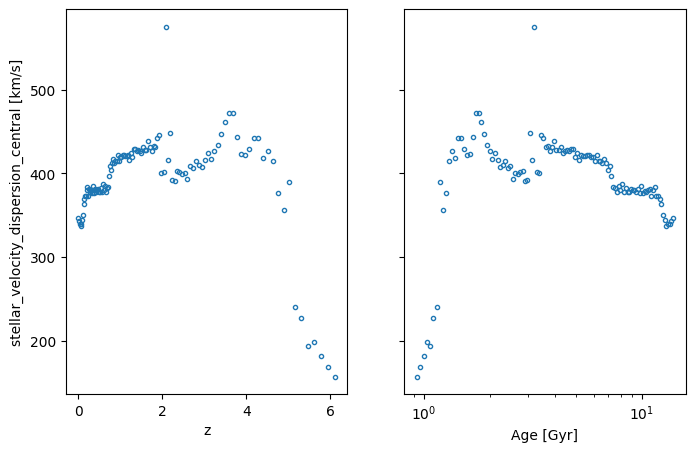

dm_velocity_dispersion_central


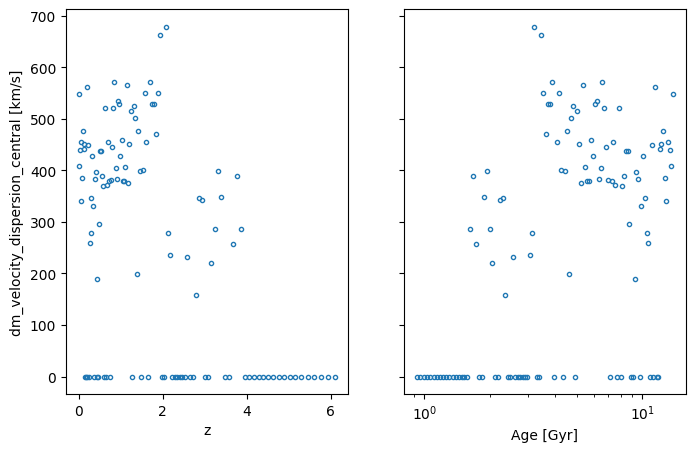

baryon_velocity_dispersion_central


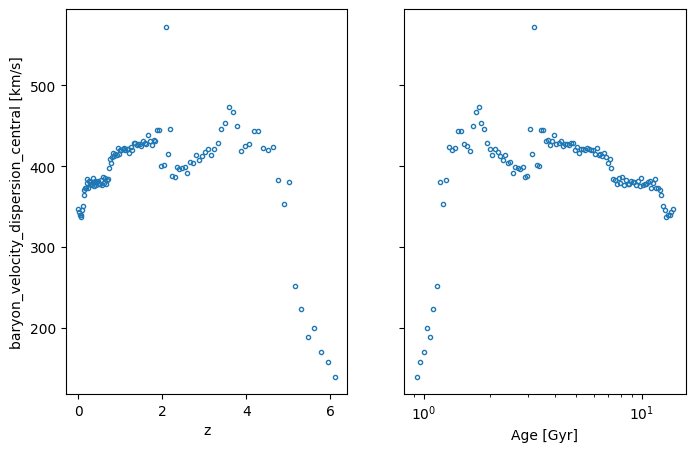

total_velocity_dispersion_central


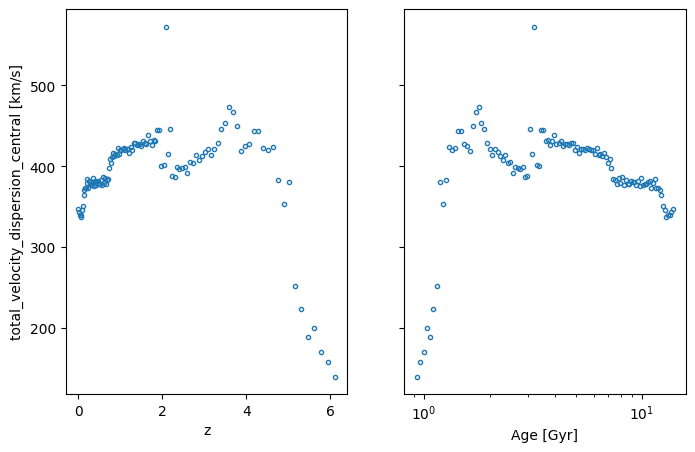

gas_L_rotation_halo
[0 1 2 3 5 6 7]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1]


/tmp/ipykernel_2157247/1901326793.py:66: RuntimeWarning: divide by zero encountered in log10
  print(min(np.log10(np.array(prop)[nonzero_value_indexes])))
/tmp/ipykernel_2157247/1901326793.py:66: RuntimeWarning: invalid value encountered in log10
  print(min(np.log10(np.array(prop)[nonzero_value_indexes])))


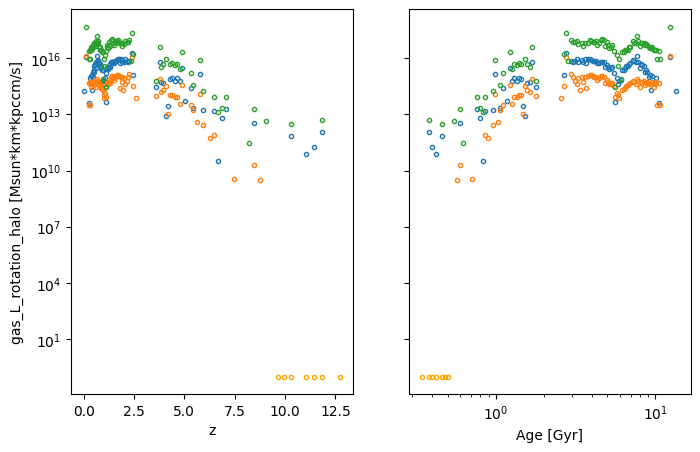

gas_ALPHA_rotation_halo


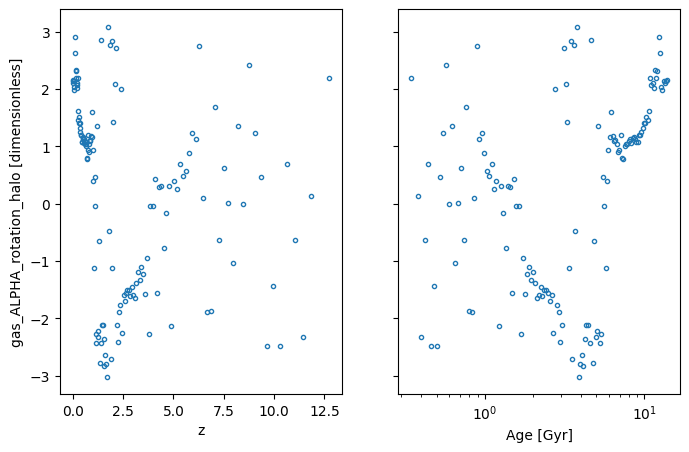

gas_BETA_rotation_halo


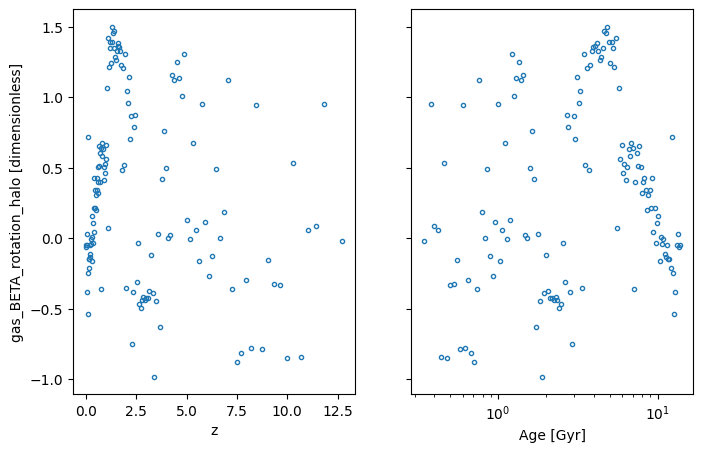

gas_BoverT_rotation_halo


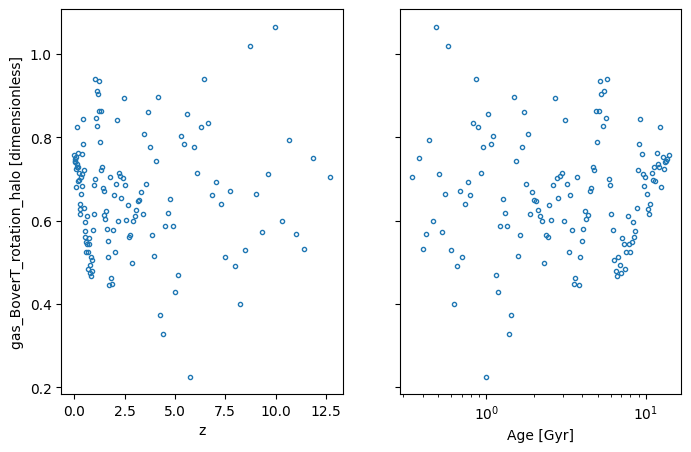

gas_kappa_rot_rotation_halo


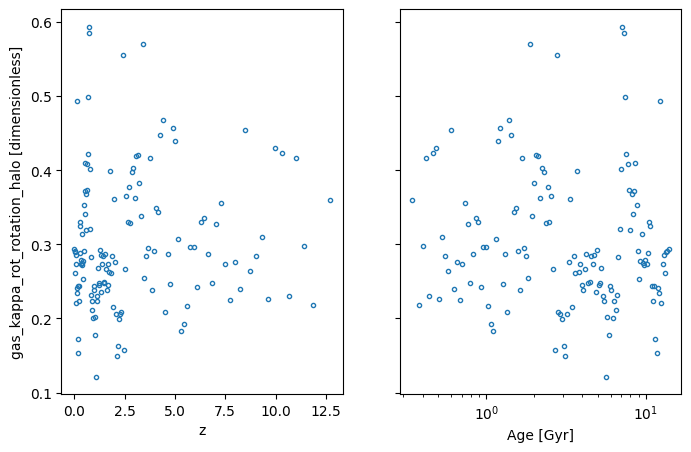

stellar_L_rotation_halo
[0 1 2 3 5 6 7]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1]


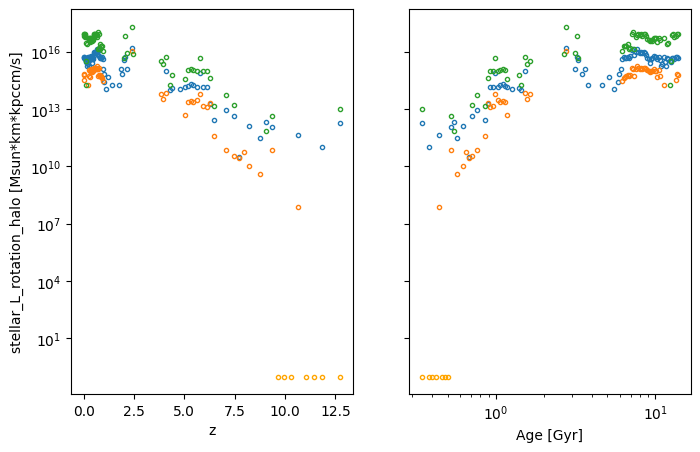

stellar_ALPHA_rotation_halo


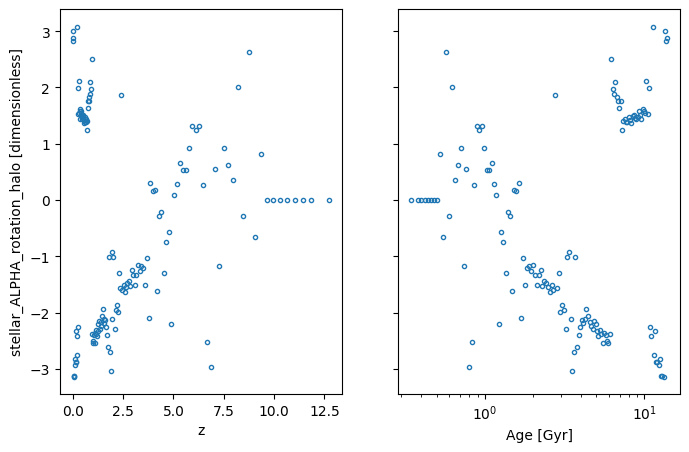

stellar_BETA_rotation_halo


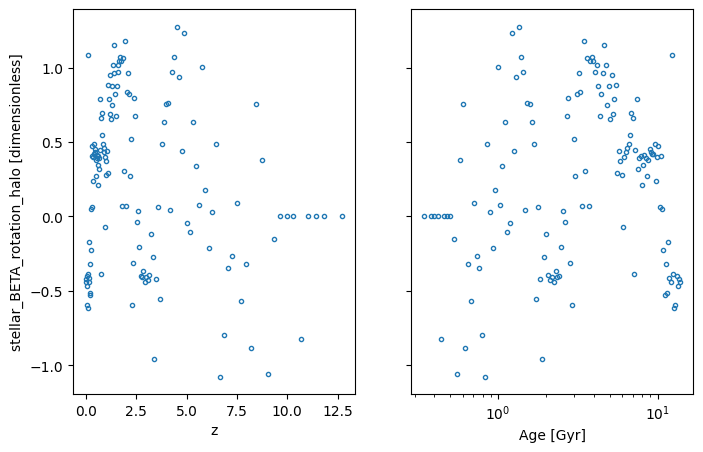

stellar_BoverT_rotation_halo


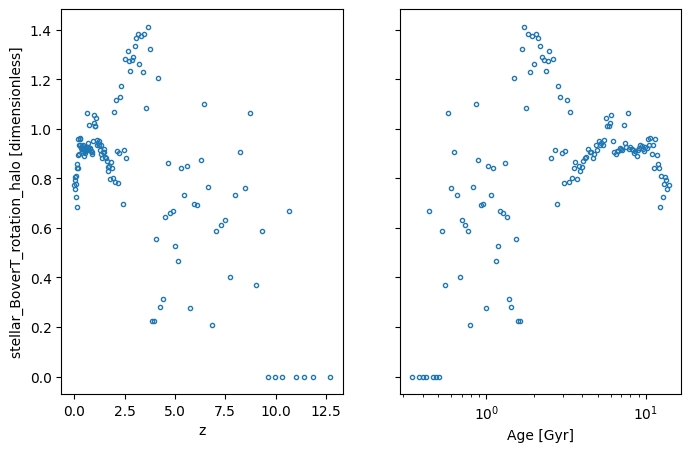

stellar_kappa_rot_rotation_halo


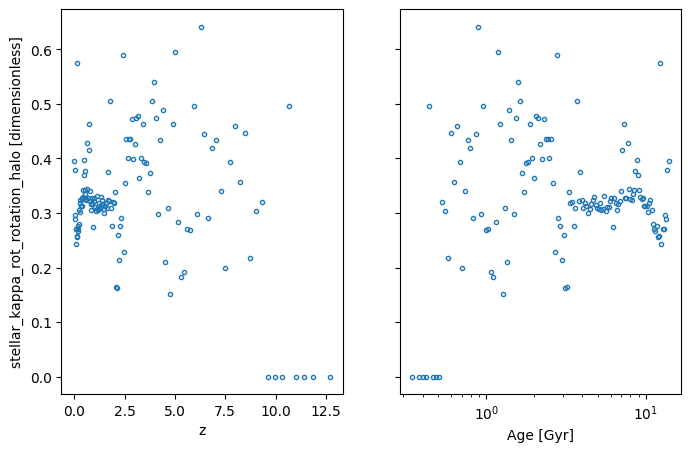

dm_L_rotation_halo
[0 1 2 3 5 6 7]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1]


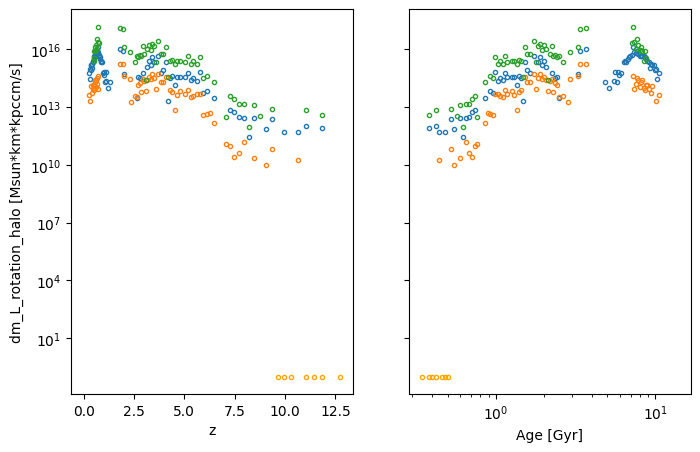

dm_ALPHA_rotation_halo


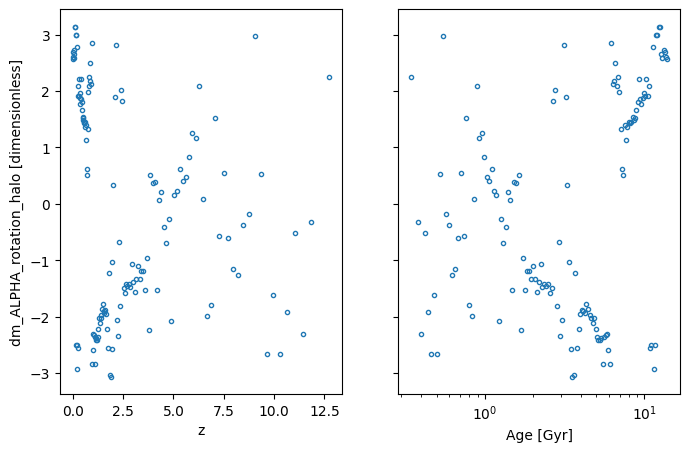

dm_BETA_rotation_halo


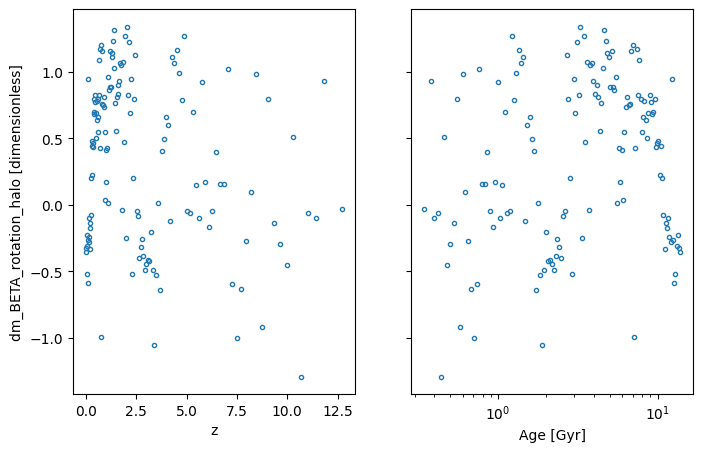

dm_BoverT_rotation_halo


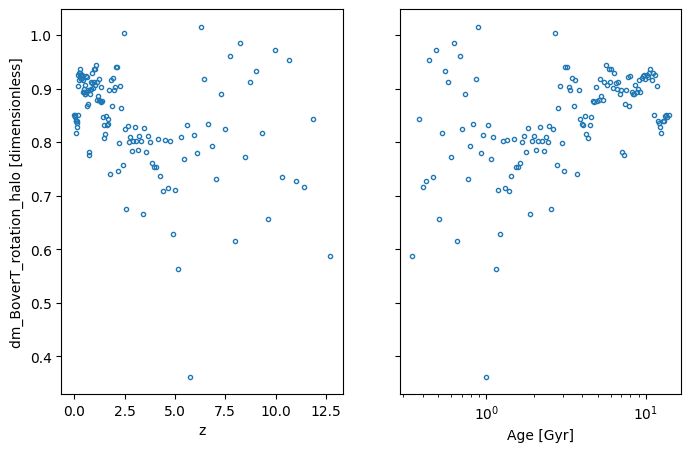

dm_kappa_rot_rotation_halo


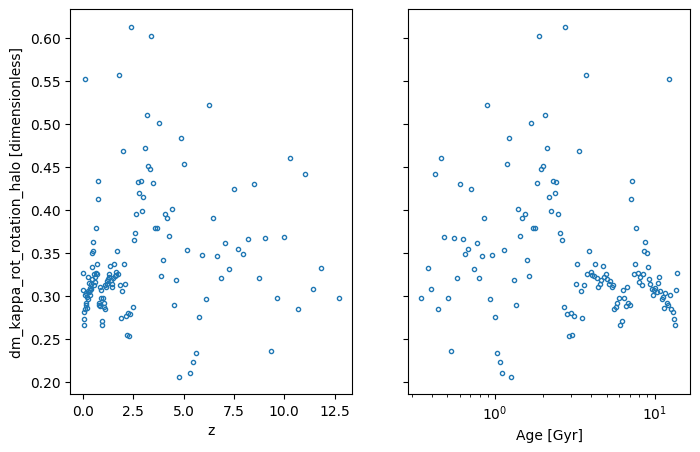

baryon_L_rotation_halo
[]
[]


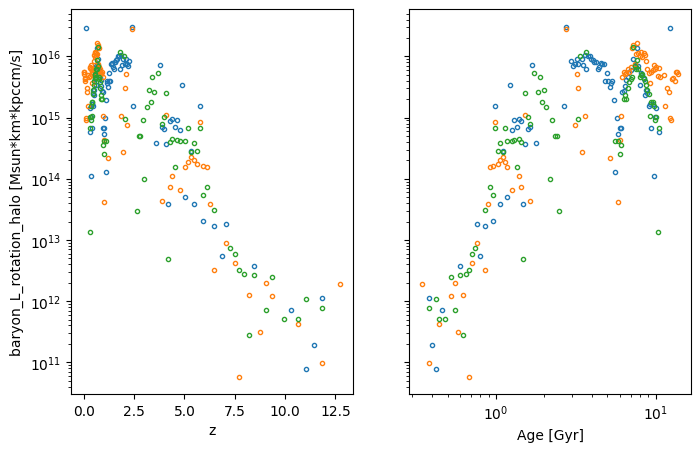

baryon_ALPHA_rotation_halo


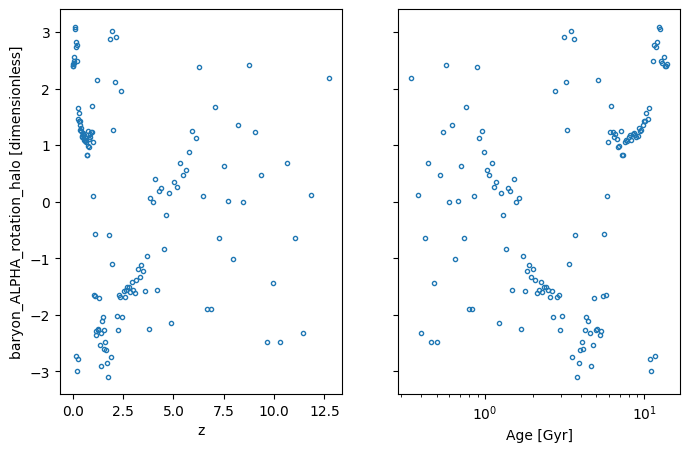

baryon_BETA_rotation_halo


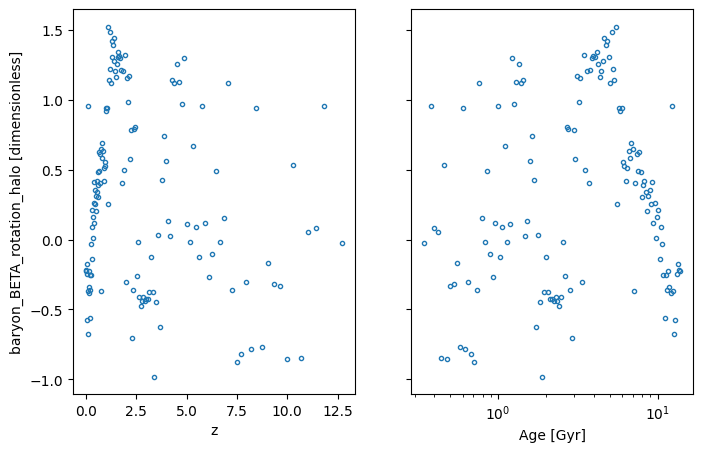

baryon_BoverT_rotation_halo


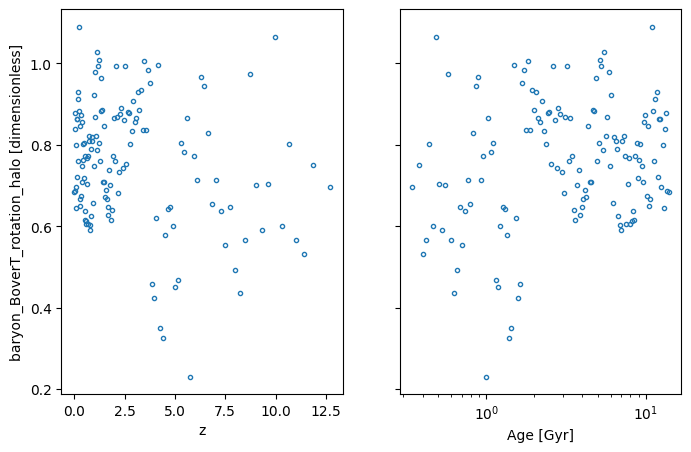

baryon_kappa_rot_rotation_halo


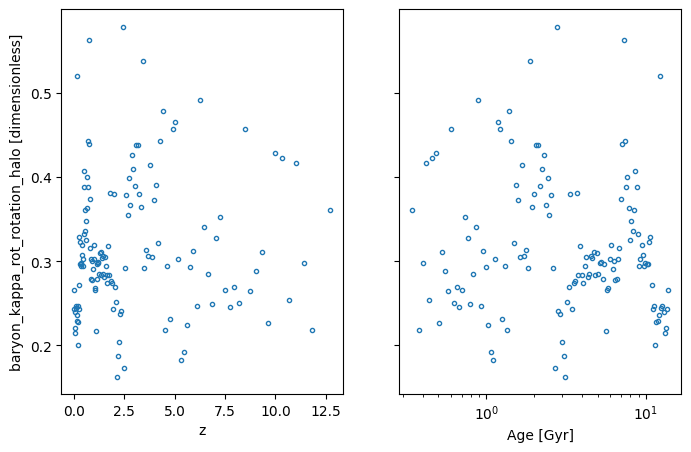

total_L_rotation_halo
[]
[]


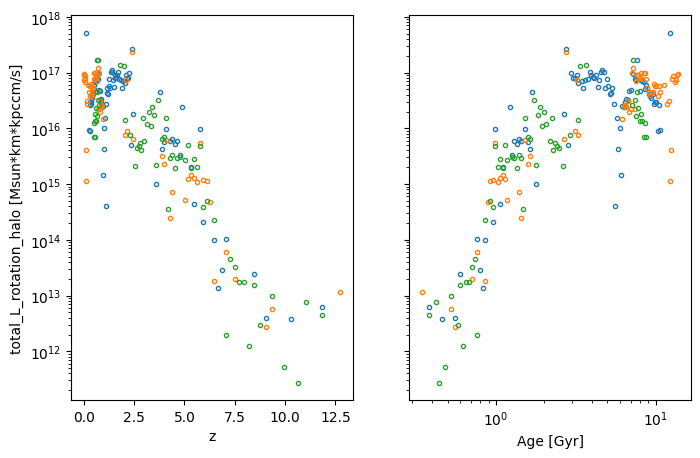

total_ALPHA_rotation_halo


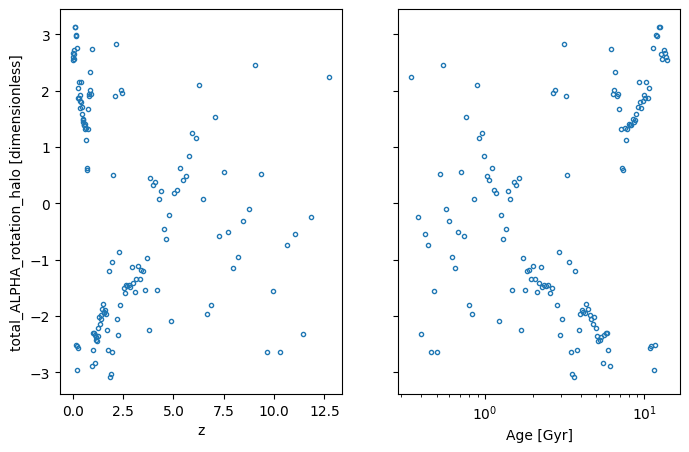

total_BETA_rotation_halo


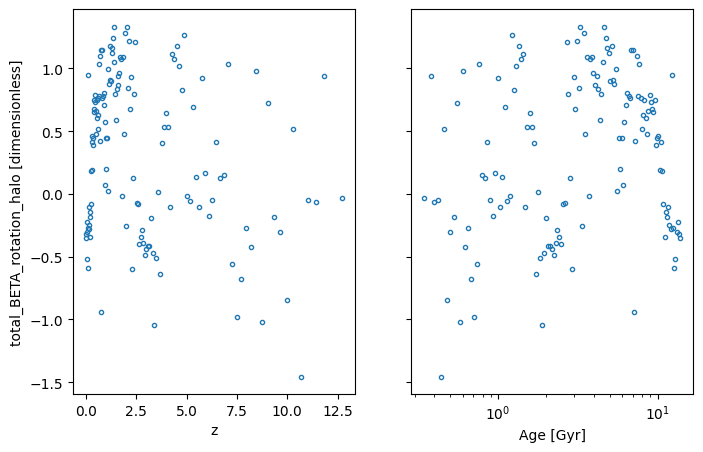

total_BoverT_rotation_halo


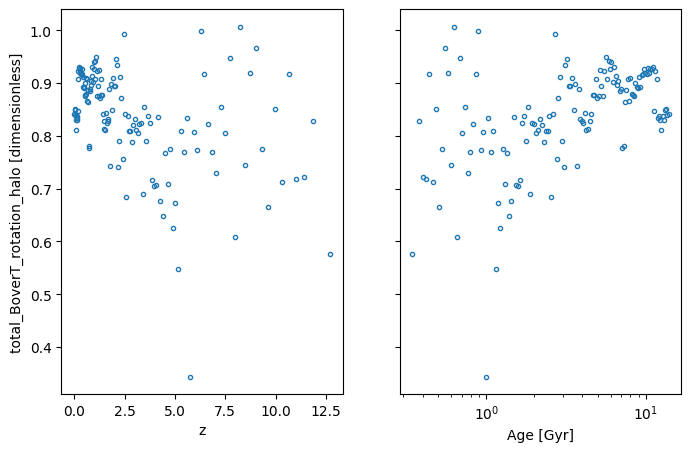

total_kappa_rot_rotation_halo


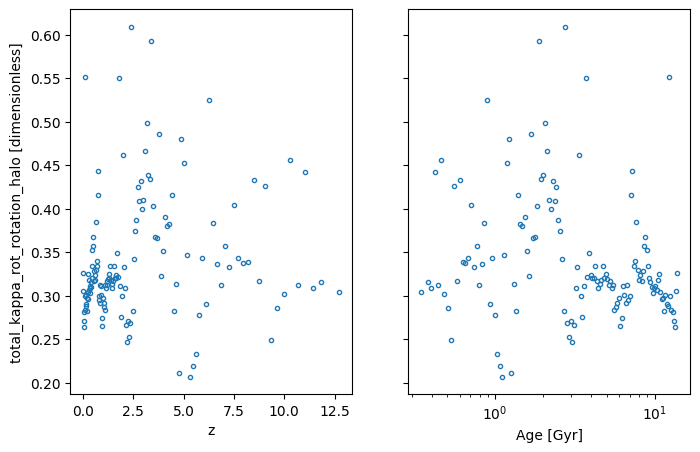

gas_L_rotation_central
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  20
  21  26  27  31  32  34  35  36  37  38  39  43  44  51  52  53  54  55
  55  56  57  58  59  60  61  61  62  63  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  79  80  81  82  83  83  84  85  85  86  87
  88  89  90  91  91  92  92  93  95  96  96  97  98  99 100 101 102 102
 103 104 104 105 106 106 107 108 109 110 111 112 113 114 115 116]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


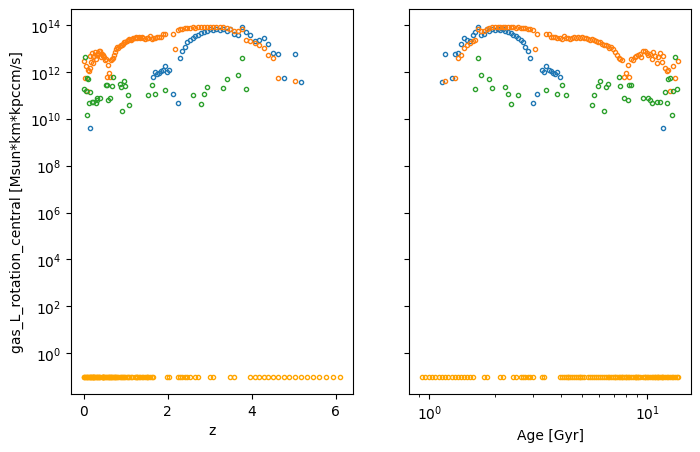

gas_ALPHA_rotation_central


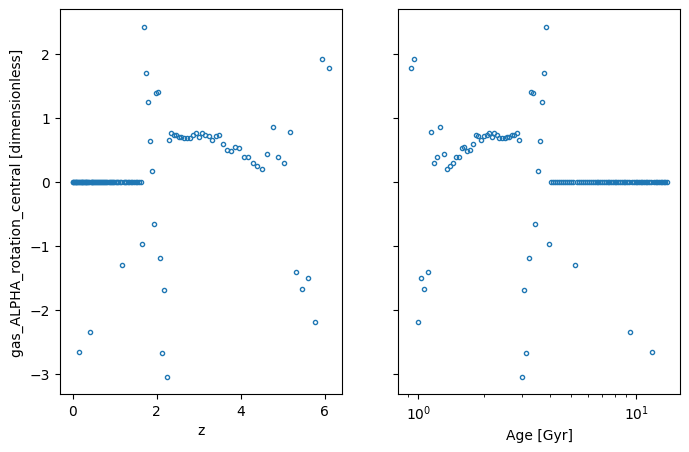

gas_BETA_rotation_central


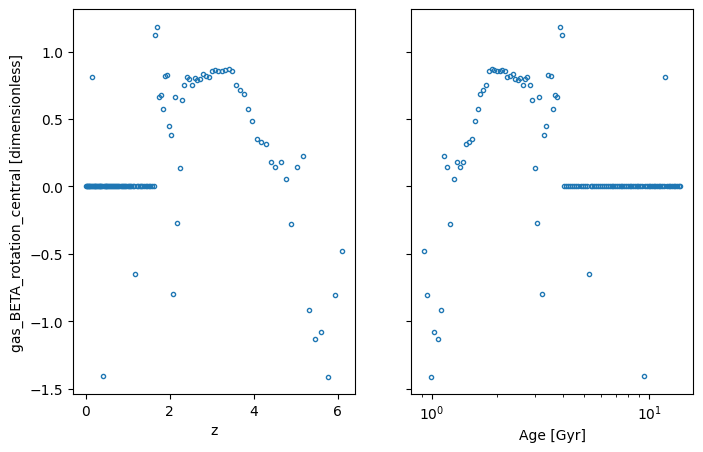

gas_BoverT_rotation_central


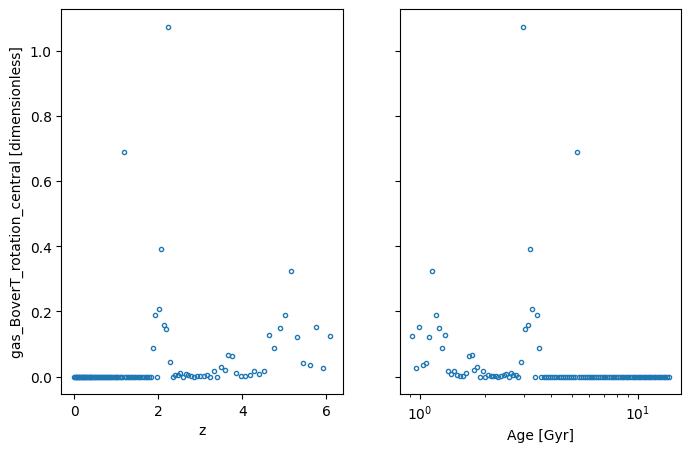

gas_kappa_rot_rotation_central


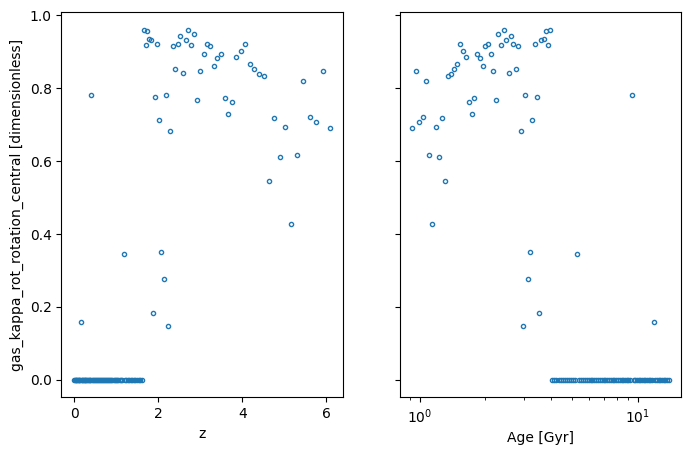

stellar_L_rotation_central
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  20
  21  26  27  31  32  34  35  36  37  38  39  43  44  51  52  53  54  55
  55  56  57  58  59  60  61  61  62  63  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  79  80  81  82  83  83  84  85  85  86  87
  88  89  90  91  91  92  92  93  95  96  96  97  98  99 100 101 102 102
 103 104 104 105 106 106 107 108 109 110 111 112 113 114 115 116]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


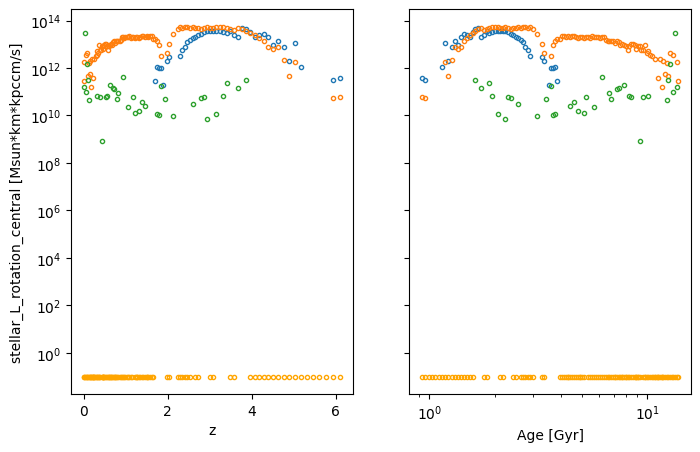

stellar_ALPHA_rotation_central


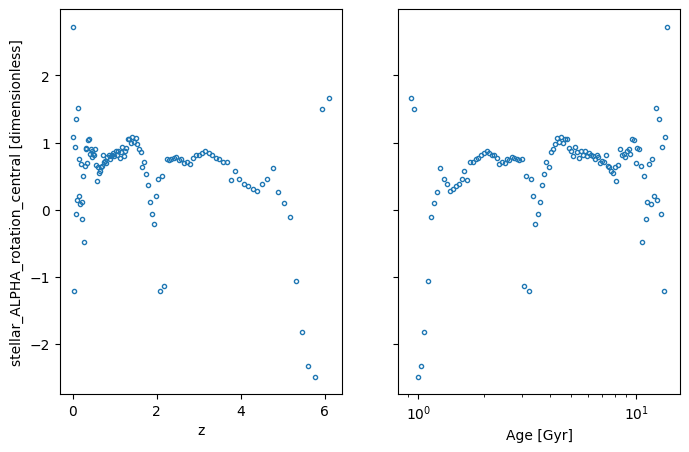

stellar_BETA_rotation_central


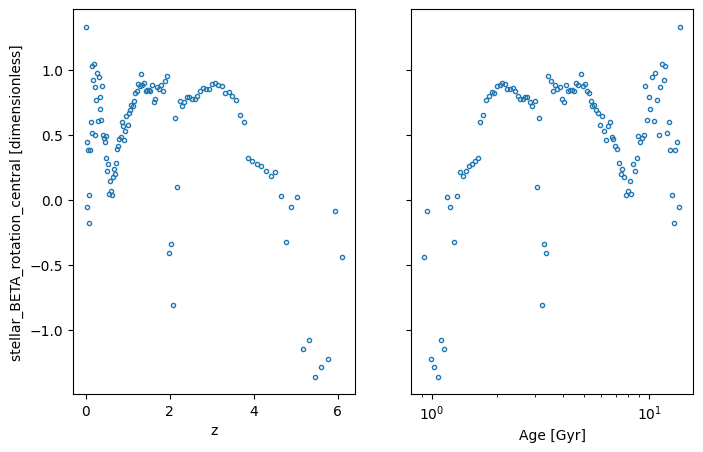

stellar_BoverT_rotation_central


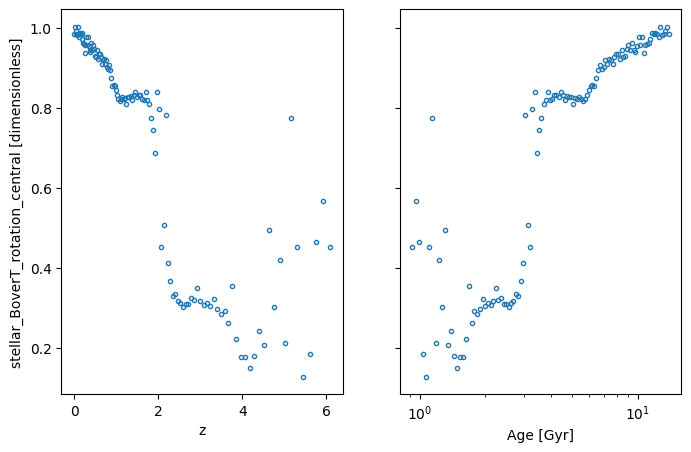

stellar_kappa_rot_rotation_central


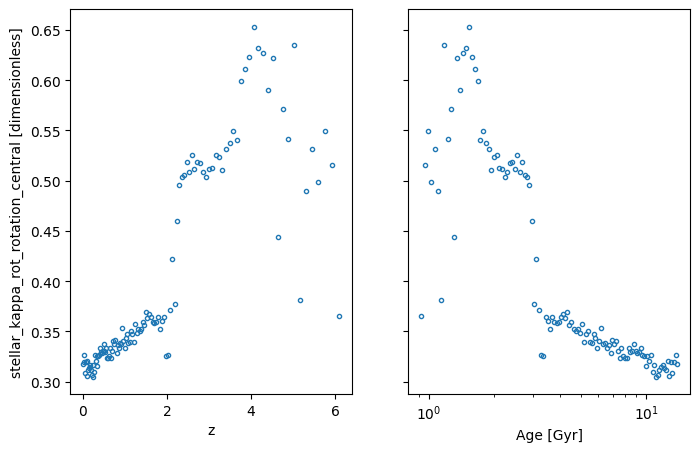

dm_L_rotation_central
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  20
  21  26  27  31  32  34  35  36  37  38  39  43  44  51  52  53  54  55
  55  56  57  58  59  60  61  61  62  63  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  79  80  81  82  83  83  84  85  85  86  87
  88  89  90  91  91  92  92  93  95  96  96  97  98  99 100 101 102 102
 103 104 104 105 106 106 107 108 109 110 111 112 113 114 115 116]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


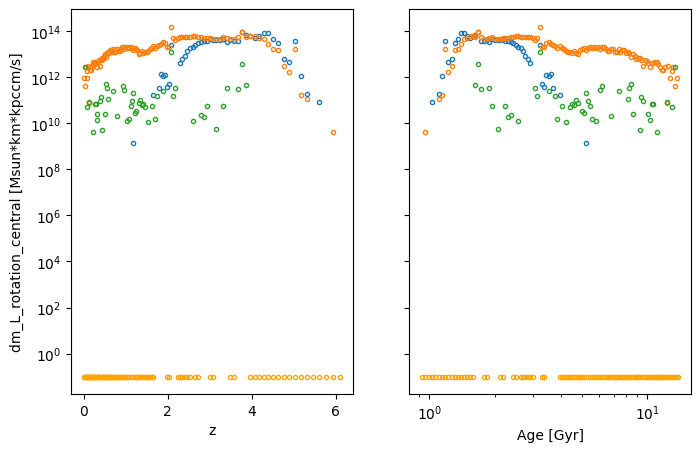

dm_ALPHA_rotation_central


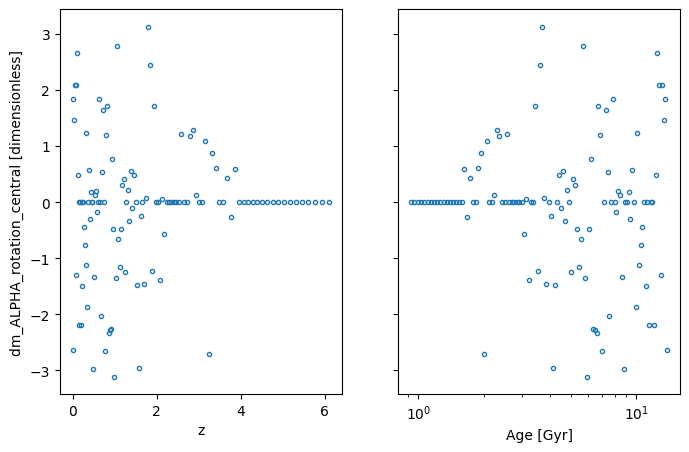

dm_BETA_rotation_central


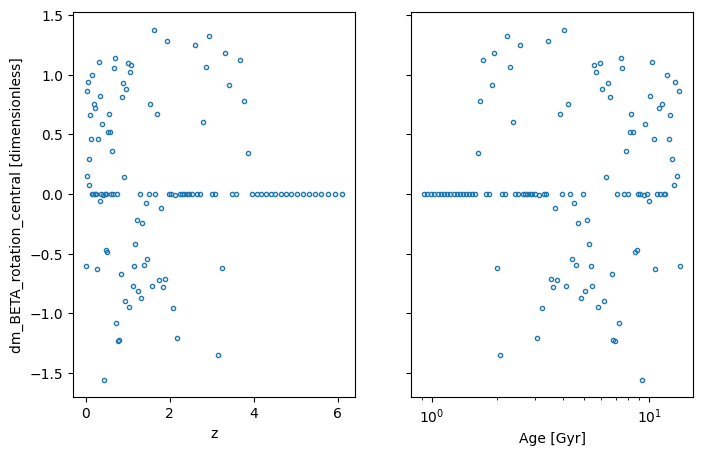

dm_BoverT_rotation_central


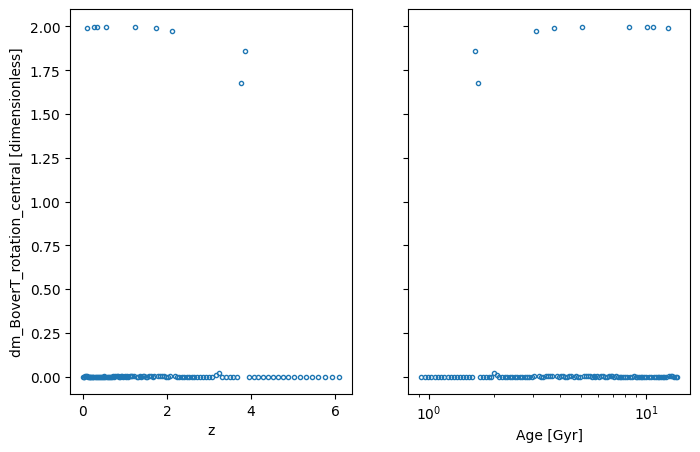

dm_kappa_rot_rotation_central


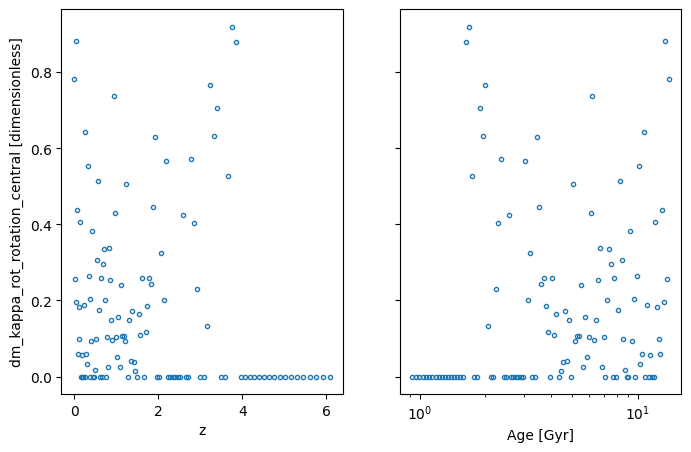

baryon_L_rotation_central
[]
[]


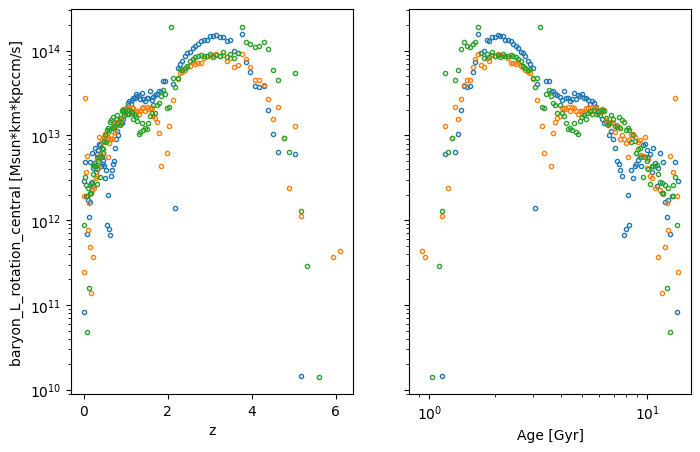

baryon_ALPHA_rotation_central


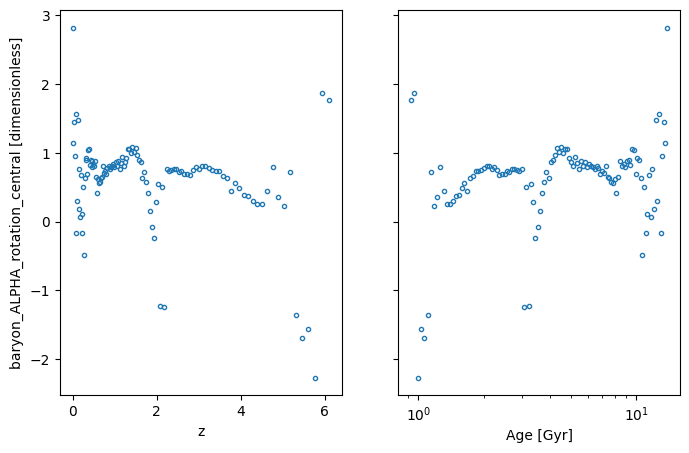

baryon_BETA_rotation_central


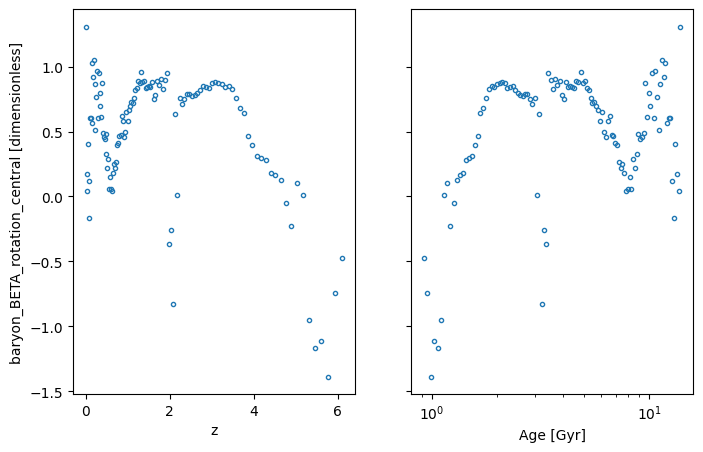

baryon_BoverT_rotation_central


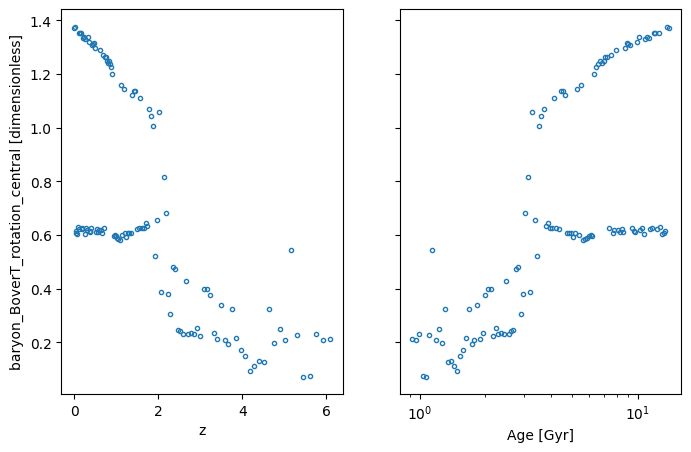

baryon_kappa_rot_rotation_central


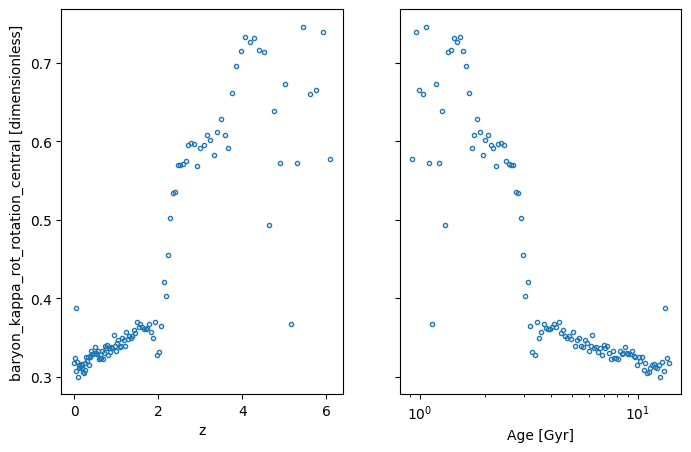

total_L_rotation_central
[]
[]


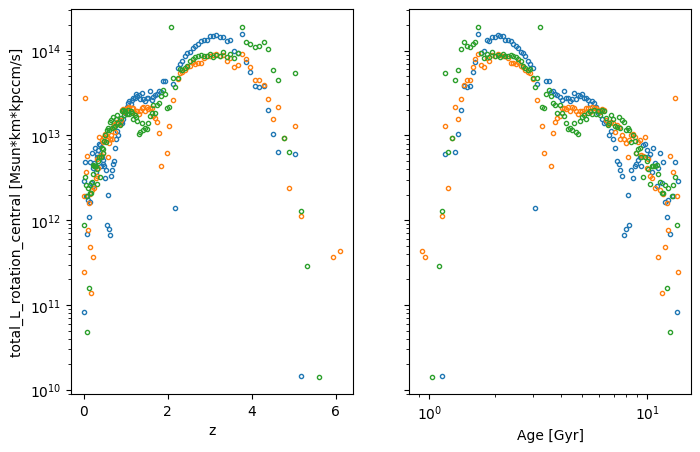

total_ALPHA_rotation_central


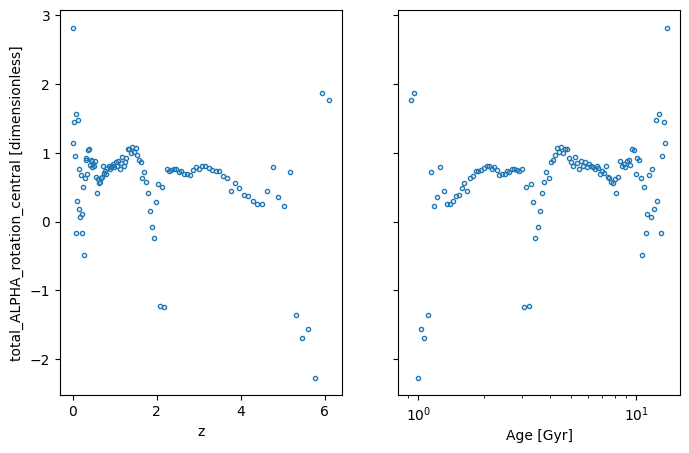

total_BETA_rotation_central


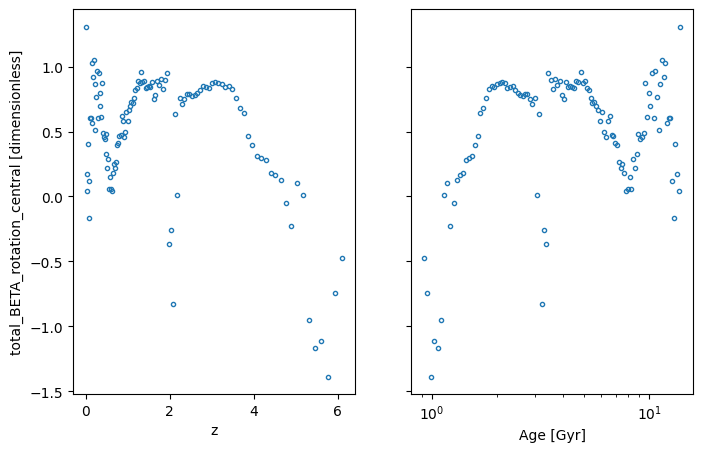

total_BoverT_rotation_central


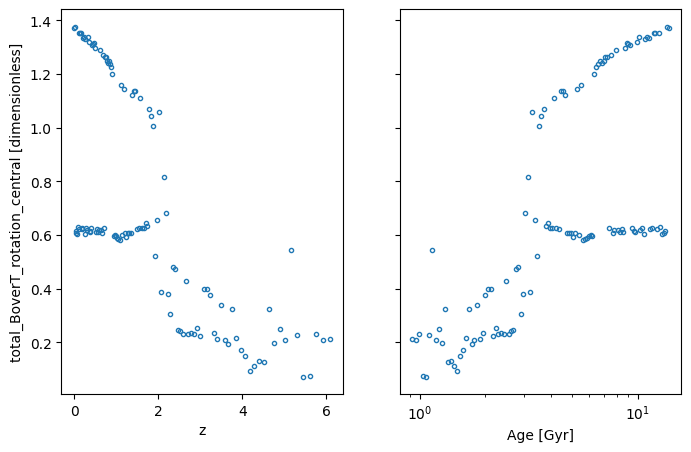

total_kappa_rot_rotation_central


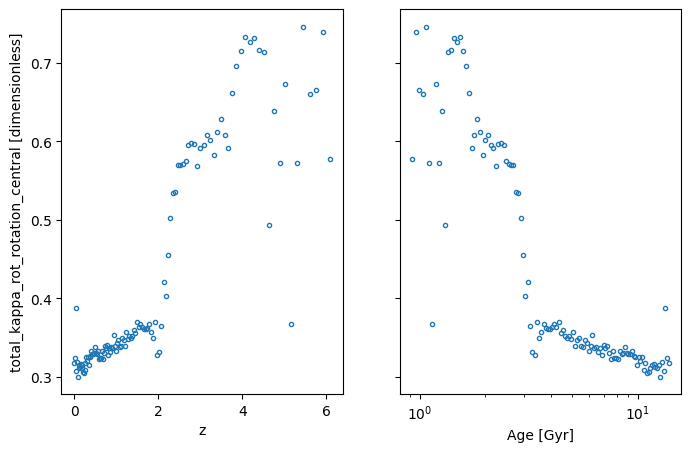

mass_weighted_stellar_age_halo
[1 2 3 5]
-3.6200284881202744
[2.39867557e-05 2.39867557e-05 2.39867557e-05 2.39867557e-05]


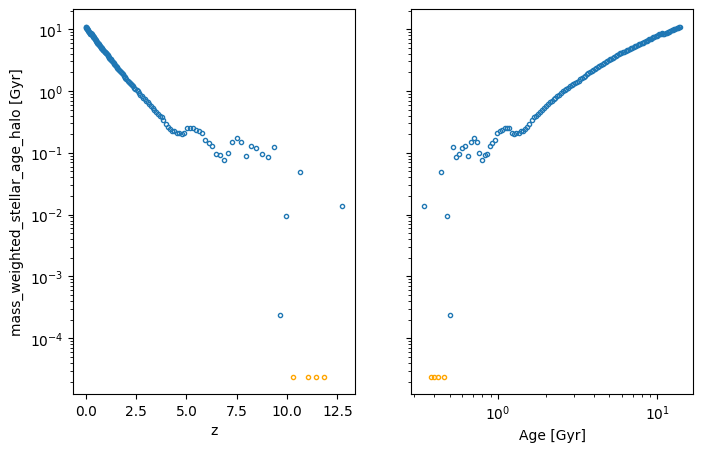

metal_weighted_stellar_age_halo
[1 2 3 5]
3.641097811121257
[437.6206543 437.6206543 437.6206543 437.6206543]


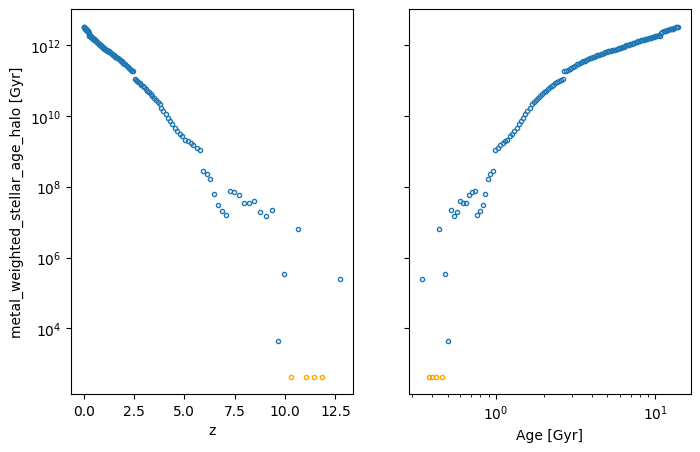

mass_weighted_stellar_age_central
[]
-0.9975964467579793
[]


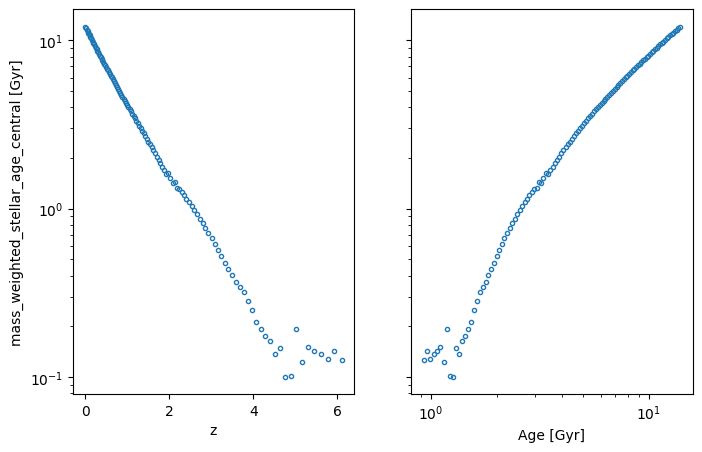

metal_weighted_stellar_age_central
[]
7.792503695011109
[]


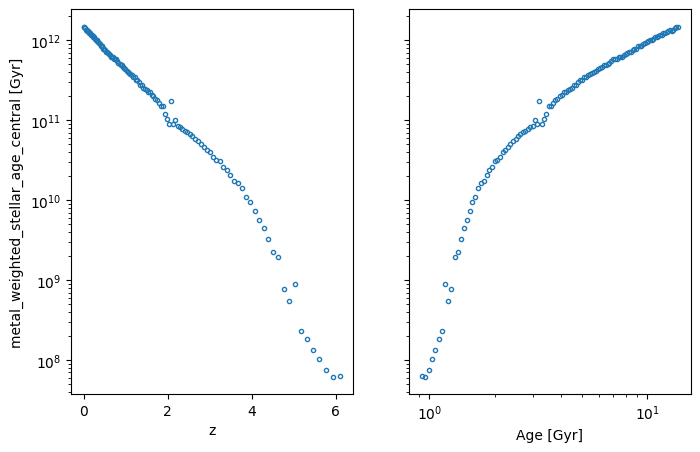

mass_weighted_temperature_halo
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.

/tmp/ipykernel_2157247/1901326793.py:57: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[0].set_yscale('log')


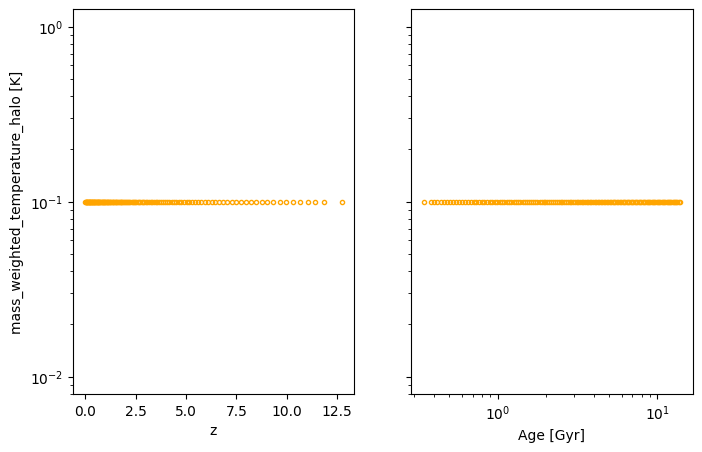

mass_weighted_cgm_temperature_halo
[]
4.104874910631163
[]


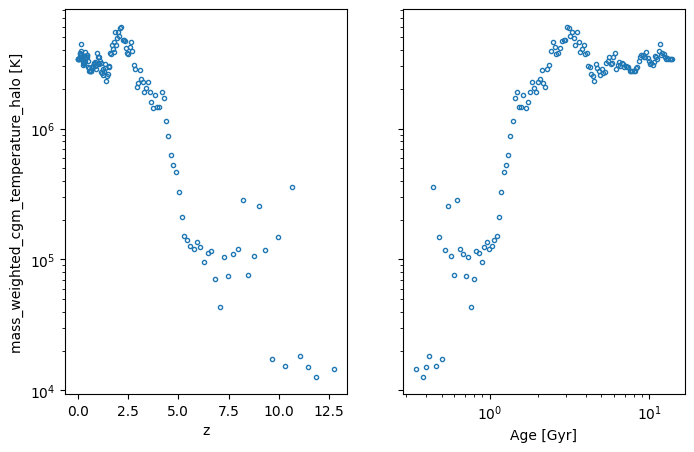

mass_weighted_temperature_central
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


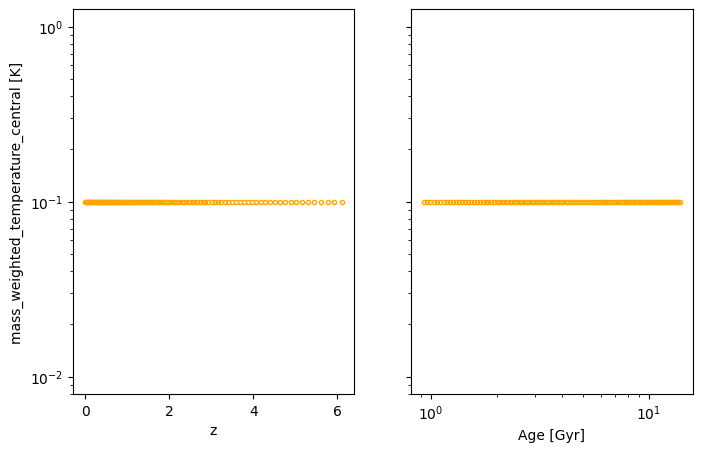

mass_weighted_cgm_temperature_central
[ 52  53  54  55  56  57  58  59  60  61  62  63  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  95  96  97  98  99 100 101 102 103 104 105 106 108
 109 110 111 112 113 114 115 116]
3.9510405362831653
[893.38886719 893.38886719 893.38886719 893.38886719 893.38886719
 893.38886719 893.38886719 893.38886719 893.38886719 893.38886719
 893.38886719 893.38886719 893.38886719 893.38886719 893.38886719
 893.38886719 893.38886719 893.38886719 893.38886719 893.38886719
 893.38886719 893.38886719 893.38886719 893.38886719 893.38886719
 893.38886719 893.38886719 893.38886719 893.38886719 893.38886719
 893.38886719 893.38886719 893.38886719 893.38886719 893.38886719
 893.38886719 893.38886719 893.38886719 893.38886719 893.38886719
 893.38886719 893.38886719 893.38886719 893.38886719 893.38886719
 893.38886719 893.38886719 893.38886719 893.38886719 893.38886719
 893.38886719 893.38886719 893

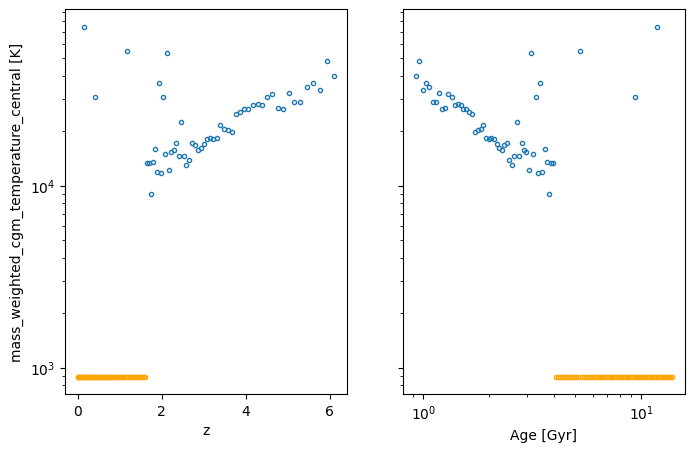

local_mass_density_300kpccm_halo
[]
1.809733988705248
[]


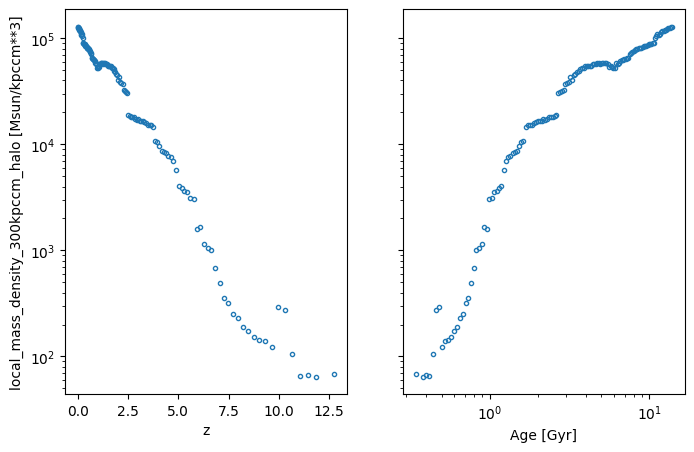

local_number_density_300kpccm_halo
[]
-8.053452373461422
[]


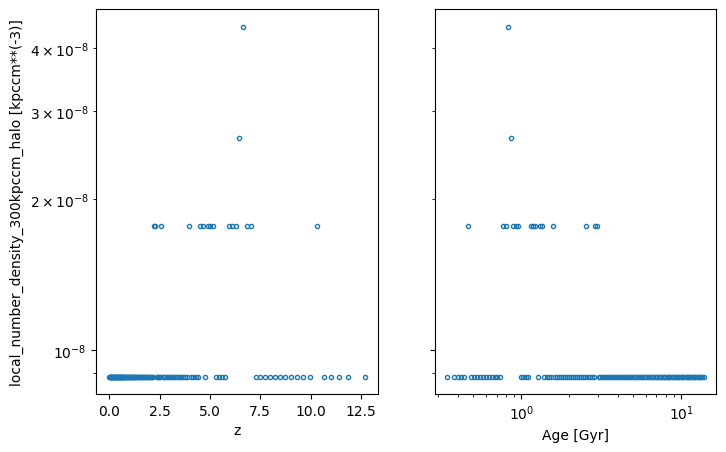

local_mass_density_1000kpccm_halo
[]
0.24109775286423532
[]


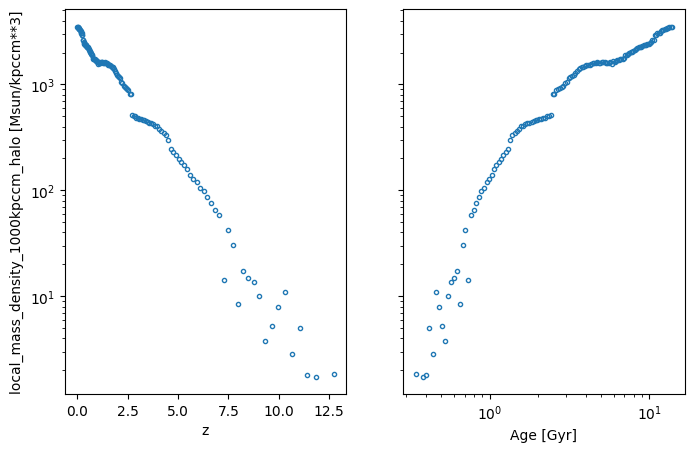

local_number_density_1000kpccm_halo
[]
-9.622088609302434
[]


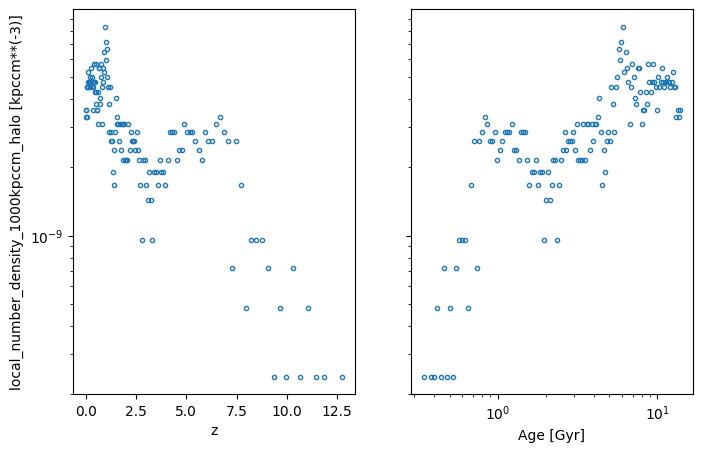

local_mass_density_3000kpccm_halo
[]
-1.1629163915037835
[]


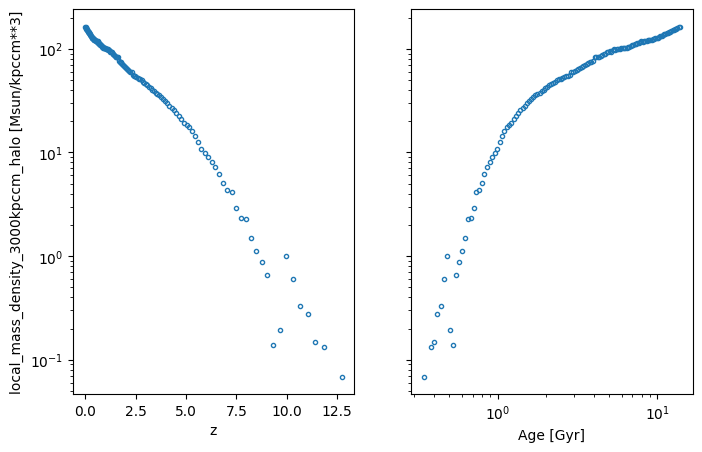

local_number_density_3000kpccm_halo
[]
-11.053452373461422
[]


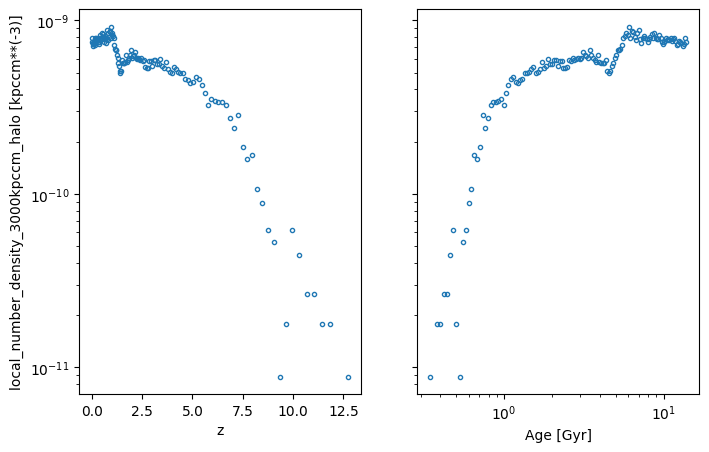

In [70]:
for prop_name, prop in prop_dict.items():
    print(prop_name)
    # print(prop)
    if prop_name in ['z_halo', 'z_central', 'z_central_tracked', 'age_halo', 'age_central', 'age_central_tracked', 'snap_num']: continue
    if len(prop) == 0:
        print(f'{prop_name} is empty')
        continue

    fig, ax = plt.subplots(num=1, figsize=(8,5),
                           nrows=1, ncols=2, sharey='row')

    # plot_z_central = False
    # plot_z_central_tracked = False

    x1 = None
    x2 = None
    if 'halo' in prop_name:
        x1 = prop_dict['z_halo']
        x2 = prop_dict['age_halo']
    if 'central' in prop_name:
        x1 = prop_dict['z_central']
        x2 = prop_dict['age_central']
    if 'central' in prop_name and 'tracked' in prop_name:
        x1 = prop_dict['z_central_tracked']
        x2 = prop_dict['age_central_tracked']

    ax[0].plot(x1, prop, marker='o', ms=3, mfc='none', ls='')
    ax[1].plot(x2, prop, marker='o', ms=3, mfc='none', ls='')
    
    # try:
    #     ax[0].plot(prop_dict['z'], prop, marker='o', ms=3, mfc='none', ls='')
    #     ax[1].plot(prop_dict['age'], prop, marker='o', ms=3, mfc='none', ls='')
    # except:
    #     plot_z_central = True
    #     ax[0].plot(prop_dict['z_central'], prop, marker='o', ms=3, mfc='none', ls='')
    #     ax[1].plot(prop_dict['age_central'], prop, marker='o', ms=3, mfc='none', ls='')
    
    # top_ax = ax.secondary_xaxis('top', functions=(forward, inverse))
    # top_ax_xticks = np.array([0, 1, 2, 3, 4, 6, 10])
    # top_ax.set_xticks(top_ax_xticks, labels=top_ax_xticks)

    # top_ax = ax.secondary_xaxis('top', functions=(inverse, forward))
    
    ax[0].set_xlabel('z')
    ax[1].set_xlabel('Age [Gyr]')
    # top_ax.set_xlabel('Age [Gyr]')
    # top_ax.set_xlabel('z')

    ax[1].set_xscale('log')
    
    try:
        ax[0].set_ylabel(f'{prop_name} [{prop[0].units}]')
    except:
        ax[0].set_ylabel(prop_name)
    # ax.set_xscale('log')
    if prop_name in log_props:
        ax[0].set_yscale('log')
        ax[1].set_yscale('log')

        ## Plot all 0 values as 1 dex below minimum nonzero value
        ## NOT WORKING!
        zero_value_indexes = np.where(np.array(prop)==0)[0]
        nonzero_value_indexes = np.where(np.array(prop)!=0)[0]
        print(zero_value_indexes)
        try:
            print(min(np.log10(np.array(prop)[nonzero_value_indexes])))
            zero_value_for_plotting = np.array([10**(min(np.log10(np.array(prop)[nonzero_value_indexes]))-1)] * len(zero_value_indexes))
        except:
            zero_value_for_plotting = np.array([10**(-1)] * len(zero_value_indexes))
        print(zero_value_for_plotting)

        ax[0].plot(np.array(x1)[zero_value_indexes], zero_value_for_plotting, 
                   marker='o', ms=3, mfc='none', mec='orange', ls='')
        ax[1].plot(np.array(x2)[zero_value_indexes], zero_value_for_plotting, 
                   marker='o', ms=3, mfc='none', mec='orange', ls='')
        
        # if not plot_z_central:
        #     ax[0].plot(np.array(prop_dict['z'])[zero_value_indexes], zero_value_for_plotting, 
        #                marker='o', ms=3, mfc='none', mec='orange', ls='')
        #     ax[1].plot(np.array(prop_dict['age'])[zero_value_indexes], zero_value_for_plotting, 
        #                marker='o', ms=3, mfc='none', mec='orange', ls='')
        # else:
        #     ax[0].plot(np.array(prop_dict['z_central'])[zero_value_indexes],
        #                zero_value_for_plotting, 
        #                marker='o', ms=3, mfc='none', mec='orange', ls='')
        #     ax[1].plot(np.array(prop_dict['age_central'])[zero_value_indexes],
        #                zero_value_for_plotting, 
        #                marker='o', ms=3, mfc='none', mec='orange', ls='')
    plt.show()

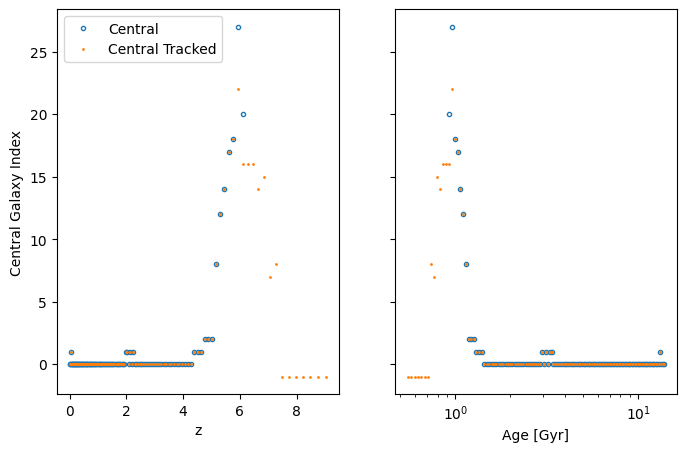

In [71]:
fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=2, sharey='row')

ax[0].plot(prop_dict['z_central'], prop_dict['central_index'],
           marker='o', ms=3, mfc='none', mec='C0', ls='', label='Central')
ax[1].plot(prop_dict['age_central'], prop_dict['central_index'],
           marker='o', ms=3, mfc='none', mec='C0', ls='')

ax[0].plot(prop_dict['z_central_tracked'], prop_dict['central_index_tracked'],
           marker='o', ms=1, mfc='none', mec='C1', ls='', label='Central Tracked')
ax[1].plot(prop_dict['age_central_tracked'], prop_dict['central_index_tracked'],
           marker='o', ms=1, mfc='none', mec='C1', ls='')

ax[1].set_xscale('log')

ax[0].set_xlabel('z')
ax[1].set_xlabel('Age [Gyr]')
ax[0].set_ylabel('Central Galaxy Index')
ax[0].legend()
plt.show()

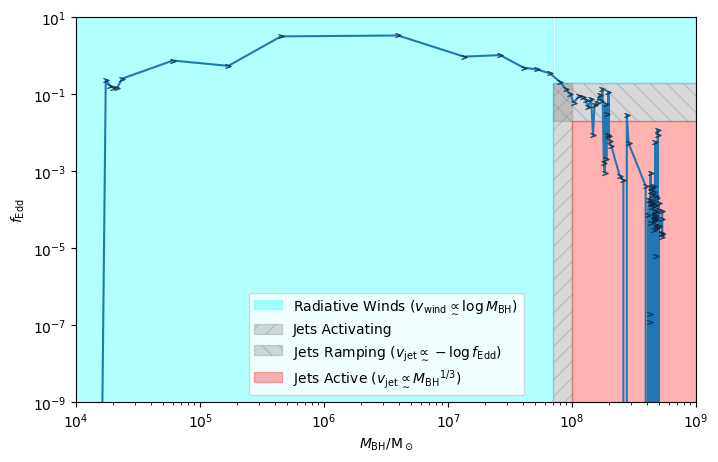

In [148]:
fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')

fedd_to_plot = copy.deepcopy(prop_dict['bh_fedd_central'])
fedd_to_plot[fedd_to_plot==0] = 1e-10
# fedd_to_plot[fedd_to_plot==-np.inf] = 1e-8

ax.plot(prop_dict['bh_mass_central'], fedd_to_plot, marker='$>$', ms=4, mew=0.25, mec='black')#, ls='')

# ax.axhline(y=0.2, color='grey', ls='-')
# ax.axhline(y=0.02, color='grey', ls='--')

ax.fill_betweenx(y=[0,1e1], x1=1e4, x2=7e7, color='cyan', alpha=0.3,
                 label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')
ax.fill_betweenx(y=[2e-1,1e1], x1=7.2125e7, x2=1e9, color='cyan', alpha=0.3)

ax.fill_betweenx(y=[0,2e-1], x1=7e7, x2=1e8, color='grey', alpha=0.3, hatch='//', label='Jets Activating')
ax.fill_betweenx(y=[2e-2,2e-1], x1=7e7, x2=1e9, color='grey', alpha=0.3, hatch='\\\\',
                 label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=1e9, color='red', alpha=0.3,
                 label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

# ax.text(x=1e8, y=1e-3, s='Jets Active')

ax.set_xlabel(r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$')
ax.set_ylabel(r'$f_{\mathrm{Edd}}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(1e-9,1e1)
ax.set_xlim(1e4, 1e9)
# ax.set_xlim(-0.05e9, 1e9)

ax.legend()

plt.show()